## 1. INTRODUCTION

This case study demonstrates the application of Exploratory Data Analysis (EDA) in a banking and financial services context. By analyzing loan data, we gain insights into borrower characteristics associated with defaults. This understanding of risk factors empowers institutions to make more informed loan approval decisions, minimizing financial losses.

The case study delves into:

**EDA Techniques:** We explore borrower demographics, financial profiles, employment and education backgrounds, and loan characteristics to identify patterns related to defaults.

**Risk Analytics Fundamentals:** We gain a foundational understanding of how data analysis minimizes risk in loan approvals for banking institutions.
Through this analysis, we aim to showcase the power of data in mitigating risk and optimizing lending decisions for financial service providers.



### 1.1 BUSINESS UNDERSTANDING

This case study explores the application of Exploratory Data Analysis (EDA) to assess credit risk for a consumer finance company specializing in loans to urban customers.

**Challenge:**

Traditionally, a lack of credit history makes it difficult to assess loan eligibility. This creates a risk:

* Approving a loan to a potentially unreliable borrower can lead to defaults and financial loss.
* Denying a loan to a good borrower can mean lost business opportunities.

**Solution:**
We will leverage EDA to analyze loan application data and identify patterns associated with loan repayment. This will help us:

* **Reduce Default Risk:** By identifying characteristics of high-risk borrowers, we can make informed decisions about loan approvals.
* **Increase Loan Approvals for Qualified Borrowers:** We can ensure creditworthy borrowers are not denied loans due to limited credit history.
Data Analysis:

The provided data includes information about loan applications, categorized as:

* Client with Payment Difficulties: Borrowers who experienced late payments on initial installments.
* Clients with On-Time Payments: Borrowers with a good repayment history.
Additionally, the data captures four types of loan application outcomes:

* Approved: Loan application accepted.
* Cancelled: Application withdrawn by the client, potentially due to loan terms or risk assessment.
* Refused: Loan application rejected by the company.
Unused Offer: Loan offer cancelled by the client during the approval process.

Through EDA, we will investigate:

* How borrower demographics (age, income, etc.) and loan characteristics (type, purpose, etc.) influence the likelihood of default.
* Patterns in loan application outcomes (approved, cancelled, refused, unused offer) based on borrower and loan attributes.

Benefits:

By understanding these patterns, we can develop a more robust loan approval process that minimizes risk while ensuring access to credit for reliable borrowers. This can lead to:

* Increased profitability through reduced defaults.
Growth in loan applications and business opportunities.
* Improved customer experience by providing fair and data-driven loan decisions.

### 1.2 BUSINESS OBJECTIVES

This case study outlines the application of Exploratory Data Analysis (EDA) to achieve key business objectives for a consumer finance company targeting urban loan applicants.

Primary Objective:

* Mitigate Credit Risk: Identify patterns in borrower and loan attributes that predict a higher likelihood of loan default. This allows the company to:
 * Reduce Defaults: By strategically denying loans to high-risk applicants, the company can minimize financial losses.
 * Optimize Loan Approvals: Ensure creditworthy borrowers with limited credit history are not overlooked, leading to increased loan approvals and business growth.

Secondary Objectives:

* Refine Loan Terms: Based on risk profiles, the company can:
 * Adjust Interest Rates: Implement higher interest rates for loans with a higher risk of default.
 * Tailor Loan Amounts: Reduce loan amounts for riskier borrowers to mitigate potential losses.


In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### 1.3 DATA UNDERSTANDING

Our dataset has 3 files as explained below:

1.	'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
2.	'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3.	'columns_description.csv' is data dictionary which describes the meaning of the variables.


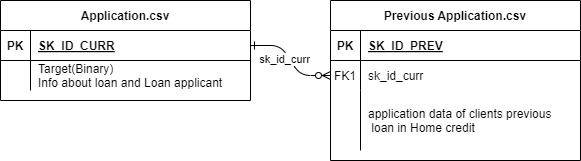

### 1.4 ASSUMPTIONS

1. In case of outliers and missing values we are NOT supposed to perform any sort of imputation or data conversion. We can only suggest.
2. For columns whose data type needs to be changed, if they have any missing values, then we can only mention our suggestion to be in agreement with the point 1 above.
3. Minor cosmetic changes like replacing the negative values with absolute values is permissible. But we should NOT make any changes to the value itself.

## 2. LOAN APPLICATION DATA

### 2.1 Read the data file

We will first read the application csv file which contains the loan applications of customers at the time of application. After performing certaing analysis on this current data we will look into the previous application details for further study at a later point of time.

In [467]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [468]:
# Filter out the warnings

import warnings
warnings.filterwarnings('ignore')

In [469]:
# Setting maximum rows and columns display size to 200 for better visibility of data

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [470]:
# Read the application data file

application_df = pd.read_csv('application_data.csv')
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### 2.2 Inspect the data frame

In this section we will perform the below activities -

1.	Inspect the application dataframe to understand the size of this dataset
2.	Look at the column info such as data type
3.	Summarise the numeric columns


In [471]:
# Check the number of rows and columns in the dataframe
application_df.shape

(307511, 122)

In [472]:
# Check the column-wise info of the dataframe
application_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [473]:
# Check the summary for the numeric columns
application_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### 2.3 Data Cleaning & Imputation - Suggestions

In this section we will perform data quality check by identifying missing values, incorrect data types etc. and by suggesting the best possible way to treat such data.

1. Check for any missing values and best possible metric to handle those missing values
2. Verify whether any column(s) has incorrect data type
3. For numerical columns, we will check for outliers
4. We will also perform binning of continuous variables


In [474]:
# Check for missing values in percentage

round(100 * application_df.isnull().mean(),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [475]:
# Extract the column names with more than 47% data missing(in and around 50%)
# and their respective missing value percentage

missing47 = list(filter(lambda x: x[1] > 47 , round(100 * application_df.isnull().sum() / len(application_df.index),2).items()))

# Extract the column names from the above list

cols_to_drop = [i[0] for i in missing47]
cols_to_drop


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [476]:
len(cols_to_drop)

49

- Since the above columns have more than 50% data missing, it would be wise to drop these columns because if we keep them, they would impact our overal analysis.

In [477]:
# Remove the columns with more than 50% missing values

application_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape

application_df.shape

(307511, 73)

In [478]:

# Check for % missing values for remaining columns

null_percentages =round(100 * application_df.isnull().sum() / len(application_df.index),2).sort_values(ascending=False)

null_percentages[null_percentages > 0].sort_values(ascending=False)


OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

1. There is this column OCCUPATION_TYPE  with 31.35% data missing.

> Suggestion - As OCCUPATION_TYPE is a categorical variable and is of object type and since the missing value percentage is high (31.35%) we could NOT take its mode value to fill the missing ones because that will simply make the data biased. So, it would be safe to rather create a new type 'Unknown' to fill the missing values.





In [479]:
class Unknown:
    def __repr__(self):
        return "Unknown"
application_df['OCCUPATION_TYPE'].fillna(Unknown(), inplace=True)

2. There is this column EXT_SOURCE_3  with 19% data missing.

> Suggestion - As EXT_SOURCE_3 is a categorical variable and is of object type and since the missing value percentage is high we could NOT take its mode value to fill the missing ones because that will simply make the data biased.  Replace with median

In [480]:
median_ext_source_3 = application_df['EXT_SOURCE_3'].median(skipna=True)

application_df['EXT_SOURCE_3'].fillna(median_ext_source_3, inplace=True)

3. Columns with around 13% missing values. Now we are going to consider the columns with approximately 13% missing values and suggest the possible imputation strategies for each of them. From the above list the below columns are found to have around 13% values missing. Let's inspect them. Columns to be considered -


1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

In [481]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

- Suggestion - Here we can replace the missing values with the respective median value for all these columns. The reason for choosing median over mean is that these columns represent 'Number of enquiries...' which can't be a floating value. It must be a whole number and that's why we are going to use median to fill missing values.

There are certain columns in the data set which have incorrect data types. We can change them to appropriate data type.

Note: We cannot perform the data type change for some columns until we actually impute the missing data. In that case only suggestion is provided.

#### Data Type Correction -

1. The below columns represent the number of enquires to Credit Bureau about the client. However, the data present are in float which is not correct. Here we need to change the data type to int.

- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR


In [482]:
columns_to_modify = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for column in columns_to_modify:
  application_df[column].fillna(application_df[column].median(),inplace = True)
  application_df[column] = application_df[column].astype(int)


2. Similarly for DAYS_REGISTRATION column, we need to change it into int as it shows the number of days.

In [483]:
# Changing DAYS_REGISTRATION column data type to int

#application_df['DAYS_REGISTRATION'] = application_df['DAYS_REGISTRATION'].astype(int)
columns_to_modify = ['DAYS_REGISTRATION']

for column in columns_to_modify:
  application_df[column].fillna(application_df[column].median(),inplace = True)
  application_df[column] = application_df[column].astype(int)


In [484]:
# Check if any missing value in CNT_FAM_MEMBERS column



columns_to_modify = ['CNT_FAM_MEMBERS']

for column in columns_to_modify:
  application_df[column].fillna(application_df[column].median(),inplace = True)
  application_df[column] = application_df[column].astype(int)


3. For CNT_FAM_MEMBERS column, which displays the number of family members of the client, we need to change it into int type as well since number of family member cannot be a float type. Before changing the data type, we must get rid of the missing values. Please note that there are only 2 rows of missing values, so we can replace it by the median value(since it must be a whole number)

4. We can change the columns which represent Yes or No values as 0 and 1 into Category data type for better plotting and thus reading.

In [485]:
# We can convert these DAYS columns into int data type as it is anyway going to be a whole number.

col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

col_list

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

5. We can convert these DAYS columns into int data type as it is anyway going to be a whole number.

In [486]:
col_list=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']
for i in col_list:
   application_df[i] = application_df[i].astype(int)

# We have NOT converted the data type of DAYS_LAST_PHONE_CHANGE
# as it has some missing values which need to be treated (replace by median) first.

In [487]:
# Verify the changes
application_df[
    ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_REGISTRATION']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   DAYS_BIRTH         307511 non-null  int64
 1   DAYS_EMPLOYED      307511 non-null  int64
 2   DAYS_REGISTRATION  307511 non-null  int64
 3   DAYS_ID_PUBLISH    307511 non-null  int64
 4   CNT_FAM_MEMBERS    307511 non-null  int64
 5   DAYS_REGISTRATION  307511 non-null  int64
dtypes: int64(6)
memory usage: 14.1 MB


#### Data standardization -

1. There are some columns which represent number of days but have some negative values. We need to fix that by replacing those values with their respective absolute values. The columns are -

- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- DAYS_LAST_PHONE_CHANGE

In [488]:
# Inspect the negative values in the DAYS columns

application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120327     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [489]:
# Make a list of all DAYS columns
col_list = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# Replace the values with their respective absolute values
for i in col_list:
    application_df[i] = abs(application_df[i])

# Verify the changes
application_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120327      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean               962.858788  
std                826.808487  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

Note: We can create a new column based on DAYS_BIRTH to show the age of the applicant for better readability and then we can drop the DAYS_BIRTH column. Similarly we can convert the other DAYS columns to represent the value in years.


In [490]:
application_df['AGE'] = application_df['DAYS_BIRTH'] // 365
application_df['YEAR_IN_SERVICE'] = application_df['DAYS_EMPLOYED'] // 365
application_df['BANK_MEMBERSHIP_DURATION'] = application_df['DAYS_REGISTRATION'] // 365

2. We can also verify some of the categorical variables.

- CODE_GENDER

In [491]:
application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [492]:
# Get rid of improper value XNA by replacing it with NaN - not using mode as that would be imputation

application_df['CODE_GENDER'] = application_df['CODE_GENDER'].replace('XNA',np.nan)

In [493]:
# Verify again

application_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

*italicized text*#### Outlier Analysis -

As we know, there are possibilities of having exceptionally low or high values in our data termed as outliers. It is of very much importance to identify such data points and get the data treated to avoid wrong interpretation. We are going to consider the below columns for outlier analysis.

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION

In [494]:
# Defining a function to plot outliers

def outlier_plot(var,title,label):

    plt.figure(figsize = [8,5])
    plt.title(title, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(y = var)
    plt.ylabel(label, fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Grey'})
    plt.show()


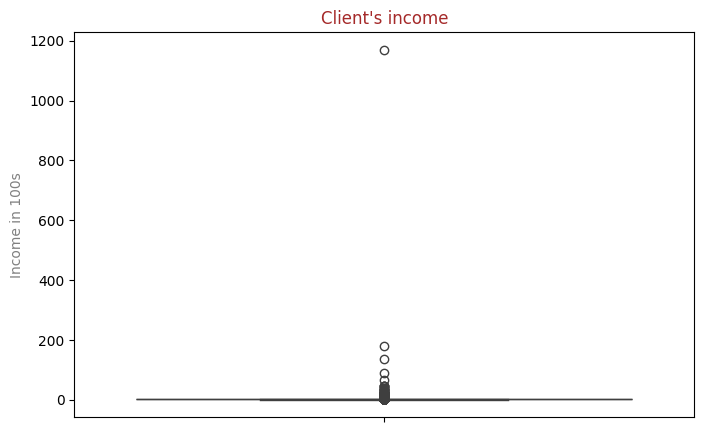

In [495]:
# Ploting boxplot on AMT_INCOME_TOTAL for outlier analysis

var = application_df['AMT_INCOME_TOTAL']/100000
title = "Client's income"
label = 'Income in 100s'

outlier_plot(var,title,label)

- AMT_INCOME_TOTAL(Income of the client) shows that some of the applicants have very high income as compared to others.

In [496]:
# Describe to check the summary

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

- There is definitely a huge difference between 75% and the maximum value. Let's print the quantile to check the difference between 0.95 or 0.99 quantile and the maximum value.

In [497]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL

(application_df['AMT_INCOME_TOTAL']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64

- AMT_INCOME_TOTAL - As we see there is a huge difference in 0.99 quantile and the maximum values. So, there are definitely outliers. As we know the income may vary from person to person, it would be good to decide on a cap value here and get rid of very high incomes.

In [498]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['AMT_INCOME_TOTAL'] / 100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.99]

# Impute values above the 99th percentile with the 99th percentile value
application_df['AMT_INCOME_TOTAL'] = application_df['AMT_INCOME_TOTAL'].clip(upper=income_99th_percentile * 100000)

0.50    1.4715
0.70    1.8000
0.90    2.7000
0.95    3.3750
0.99    4.7250
Name: AMT_INCOME_TOTAL, dtype: float64


In [499]:
(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.660259
std           0.830635
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max           4.725000
Name: AMT_INCOME_TOTAL, dtype: float64

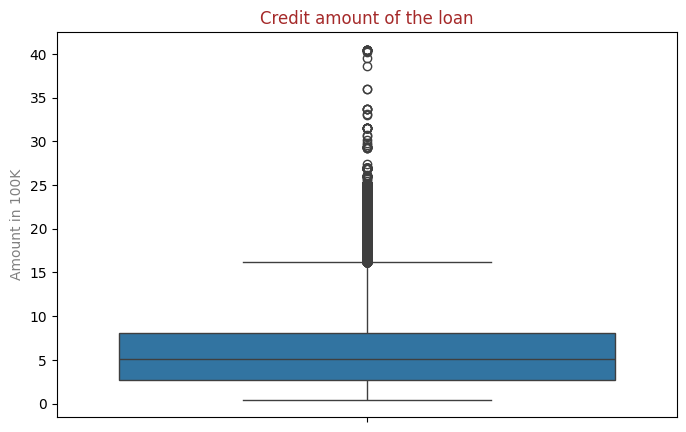

In [500]:
# Ploting boxplot on AMT_CREDIT for outlier analysis

var = application_df['AMT_CREDIT']/100000
title = "Credit amount of the loan"
label = "Amount in 100K"

outlier_plot(var,title,label)

- AMT_CREDIT(Credit amount of loan) has some outliers. Since the amount credits can vary from person to person based on the loan applied, their eligibility and other factors, it is considerable.
- Also we have more applications with credit amount in the lower range below 500K.


In [501]:
# Describe to check the summary

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

- We can see an increase in value after 75% but it is not very high. Let's check the quantiles.

In [502]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT

(application_df['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

- AMT_CREDIT - In this case we have some high value after 99% bt they are not significantly high. We can replace then with median.

In [503]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['AMT_CREDIT'] / 100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.99]

# Impute values above the 99th percentile with the 99th percentile value
application_df['AMT_CREDIT'] = application_df['AMT_CREDIT'].clip(upper=income_99th_percentile * 100000)

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64


In [504]:
(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.961537
std           3.915142
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          18.540000
Name: AMT_CREDIT, dtype: float64

In [505]:
(application_df['AMT_CREDIT']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     5.13531
0.70     7.55190
0.90    11.33748
0.95    13.50000
0.99    18.54000
Name: AMT_CREDIT, dtype: float64

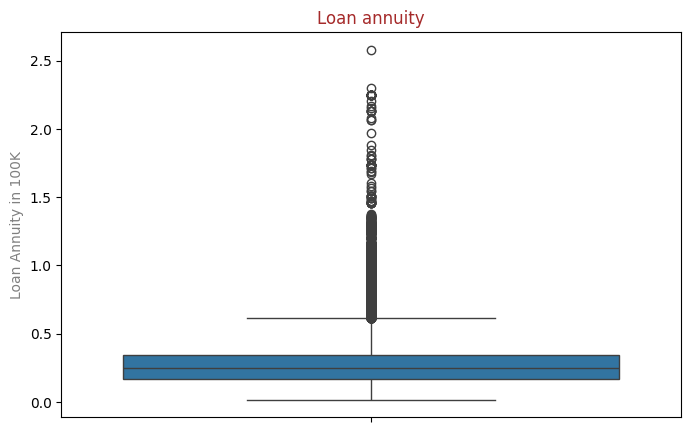

In [506]:
# Ploting boxplot on AMT_ANNUITY for outlier analysis

var = application_df['AMT_ANNUITY']/100000
title = "Loan annuity"
label = "Loan Annuity in 100K"

outlier_plot(var,title,label)

- AMT_ANNUITY(Loan annuity) also has some outliers but it is kind of continuous. There is no sudden significant rise in the value.

In [507]:
# Describe to check the summary

(application_df['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.271086
std           0.144937
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           2.580255
Name: AMT_ANNUITY, dtype: float64

- In this case as there is not a huge difference between

*   List item
*   List item

75% and the maximum value also the mean and median values are not much different , we can impute the outliers with median value.

In [508]:
(application_df['AMT_ANNUITY']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.249030
0.70    0.320040
0.90    0.459540
0.95    0.533250
0.99    0.700065
Name: AMT_ANNUITY, dtype: float64

In [509]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['AMT_ANNUITY'] / 100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.99]

# Impute values above the 99th percentile with the 99th percentile value
application_df['AMT_ANNUITY'] = application_df['AMT_ANNUITY'].clip(upper=income_99th_percentile * 100000)

0.50    0.249030
0.70    0.320040
0.90    0.459540
0.95    0.533250
0.99    0.700065
Name: AMT_ANNUITY, dtype: float64


In [510]:
(application_df['AMT_ANNUITY']/100000).describe()

count    307499.000000
mean          0.269345
std           0.136718
min           0.016155
25%           0.165240
50%           0.249030
75%           0.345960
max           0.700065
Name: AMT_ANNUITY, dtype: float64

In [511]:
(application_df['AMT_ANNUITY']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    0.249030
0.70    0.320040
0.90    0.459540
0.95    0.533250
0.99    0.700065
Name: AMT_ANNUITY, dtype: float64

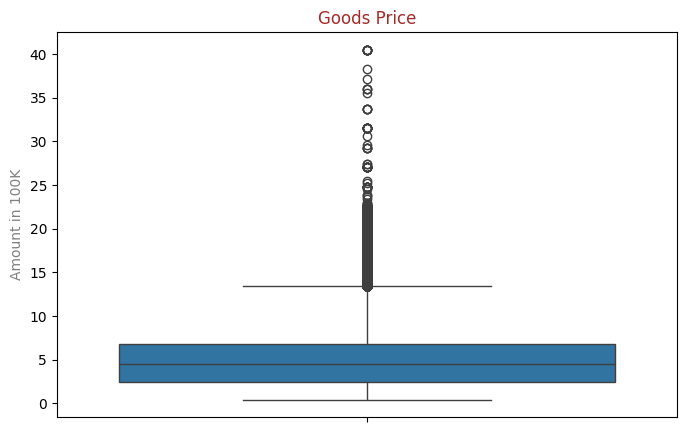

In [512]:
# Ploting boxplot on AMT_GOODS_PRICE for outlier analysis

var = application_df['AMT_GOODS_PRICE']/100000
title = "Goods Price"
label = "Amount in 100K"

outlier_plot(var,title,label)

In [513]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).describe()

count    307233.000000
mean          5.383962
std           3.694465
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          40.500000
Name: AMT_GOODS_PRICE, dtype: float64

In [514]:
# Describe to check the summary

(application_df['AMT_GOODS_PRICE']/100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
Name: AMT_GOODS_PRICE, dtype: float64

- Mean and Median are not very different. Also, form the quantiles, the 0.99 and the maximum values are not very far apart. So, we can impute with median.

In [515]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['AMT_GOODS_PRICE'] / 100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.99]

# Impute values above the 99th percentile with the 99th percentile value
application_df['AMT_GOODS_PRICE'] = application_df['AMT_GOODS_PRICE'].clip(upper=income_99th_percentile * 100000)

0.50     4.500
0.70     6.750
0.90    10.935
0.95    13.050
0.99    18.000
Name: AMT_GOODS_PRICE, dtype: float64


In [516]:
(application_df['AMT_GOODS_PRICE']/100000).describe()

count    307233.000000
mean          5.366148
std           3.619235
min           0.405000
25%           2.385000
50%           4.500000
75%           6.795000
max          18.000000
Name: AMT_GOODS_PRICE, dtype: float64

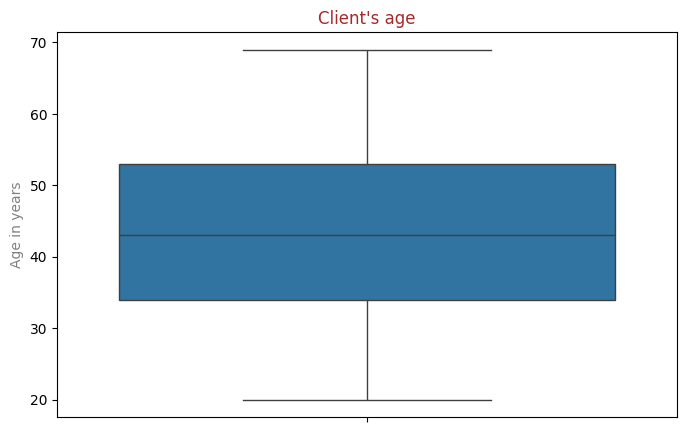

In [517]:
# Ploting boxplot on AGE for outlier analysis

var = application_df['AGE']
title = "Client's age"
label = "Age in years"

outlier_plot(var,title,label)

- AGE - Client's age seems to have no outliers at all. No imputation or treatment required.

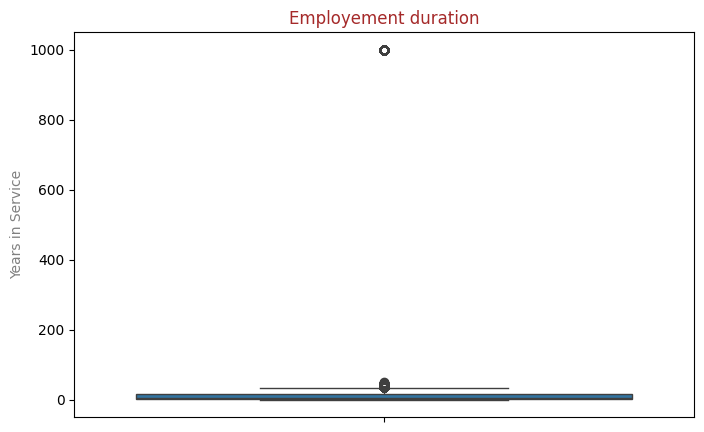

In [518]:
# Ploting boxplot on YEAR_IN_SERVICE for outlier analysis

#var = application_df['DAYS_EMPLOYED']//365
var = application_df['YEAR_IN_SERVICE']

title = "Employement duration"
label = "Years in Service"

outlier_plot(var,title,label)

- YEAR_IN_SERVICE-DAYS_EMPLOYED(Employment duration) data surely has huge outliers which is clearly visible from the boxplot.Some data points are showing close to 1000 years in service which is impossible.

In [519]:
# Describe to check the summary

(application_df['YEAR_IN_SERVICE']).describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEAR_IN_SERVICE, dtype: float64

- There is surely a huge difference in 75% and the maximum value. That explains the difference between mean and median value as well. Let's check the quantile.

In [520]:
# print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of DAYS_EMPLOYED

(application_df['YEAR_IN_SERVICE']).quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50       6.0
0.70      12.0
0.90    1000.0
0.95    1000.0
0.99    1000.0
Name: YEAR_IN_SERVICE, dtype: float64

In [521]:
(application_df['YEAR_IN_SERVICE']).quantile([0.5, 0.7, 0.8,0.85, 0.9])

0.50       6.0
0.70      12.0
0.80      25.0
0.85    1000.0
0.90    1000.0
Name: YEAR_IN_SERVICE, dtype: float64

- In case of DAYS_EMPLOYED, we can see no difference between  0.90 quantile and the maximum value. However, there is a huge difference between 0.70 and 0.90 quantiles. Here, we can say that close to 20% data is not correct and hence is not reliable. We can cap the value at 80% in this case.

In [522]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['YEAR_IN_SERVICE'] / 100000).quantile([0.5, 0.7,0.8, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.80]

# Impute values above the 99th percentile with the 99th percentile value
application_df['YEAR_IN_SERVICE'] = application_df['YEAR_IN_SERVICE'].clip(upper=income_99th_percentile * 100000)

0.50    0.00006
0.70    0.00012
0.80    0.00025
0.90    0.01000
0.95    0.01000
0.99    0.01000
Name: YEAR_IN_SERVICE, dtype: float64


In [523]:
(application_df['YEAR_IN_SERVICE']).quantile([0.5, 0.7, 0.8,0.85, 0.9])

0.50     6.0
0.70    12.0
0.80    25.0
0.85    25.0
0.90    25.0
Name: YEAR_IN_SERVICE, dtype: float64

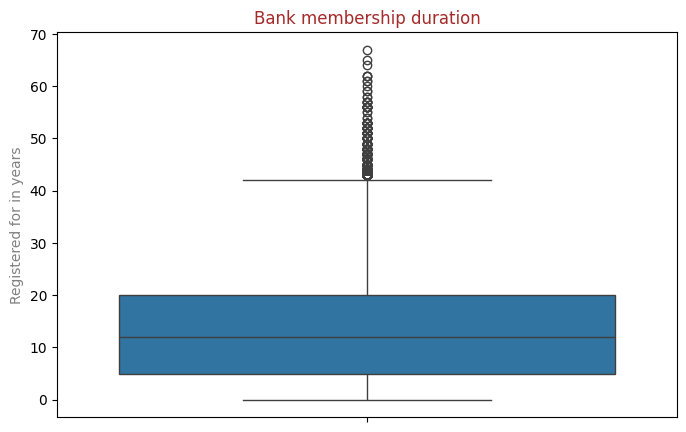

In [524]:
# Ploting boxplot on DAYS_REGISTRATION for outlier analysis

#var = application_df['DAYS_REGISTRATION']//365
var = application_df['BANK_MEMBERSHIP_DURATION']

title = "Bank membership duration"
label = "Registered for in years"

outlier_plot(var,title,label)

- In case of DAYS_REGISTRATION BANK_MEMBERSHIP_DURATION - Bank membership duration, we can see that we have some applicants with the bank for very long time , close to 70 years, which is rare but not impossible. There are people who tie up with a bank and stay loyal to the same one for life time.

In [525]:
# Describe to check the summary

(application_df['BANK_MEMBERSHIP_DURATION']).describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: BANK_MEMBERSHIP_DURATION, dtype: float64

\- We dont see much difference between mean and median. So, we can replace the outliers with median value.

In [526]:
(application_df['BANK_MEMBERSHIP_DURATION']).quantile([0.5, 0.7, 0.8,0.85,0.9, 0.99])

0.50    12.0
0.70    18.0
0.80    22.0
0.85    24.0
0.90    27.0
0.99    38.0
Name: BANK_MEMBERSHIP_DURATION, dtype: float64

In [527]:
# Calculate quantiles of income in units of 100,000
income_quantiles = (application_df['BANK_MEMBERSHIP_DURATION'] / 100000).quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(income_quantiles)

# Get the 99th percentile value
income_99th_percentile = income_quantiles.loc[0.99]

# Impute values above the 99th percentile with the 99th percentile value
application_df['BANK_MEMBERSHIP_DURATION'] = application_df['BANK_MEMBERSHIP_DURATION'].clip(upper=income_99th_percentile * 100000)

0.50    0.00012
0.70    0.00018
0.90    0.00027
0.95    0.00031
0.99    0.00038
Name: BANK_MEMBERSHIP_DURATION, dtype: float64


#### Binning

1. We may want to bin the applicants ages into certain categories to be able to draw some insights such as - whether the loan defaulters majorly fall into any certain age groups or which age groups are much likely to repay on time etc.

In [528]:
# Check the Age Summary - Since DAYS_BIRTH is in days, we have divided it by 365 to get it in years

(application_df['DAYS_BIRTH'] // 365).describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [529]:
# Binning DAYS_BIRTH based on above summary

bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
application_df['AGE_GROUP'] = pd.cut(application_df['DAYS_BIRTH'] // 365, bins = bins, labels = labels )


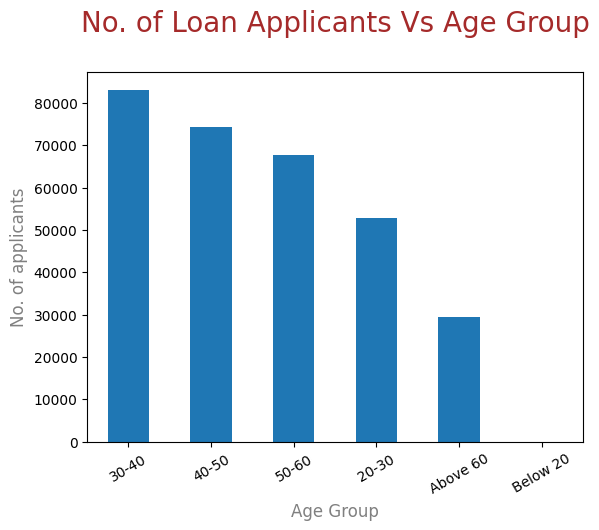

In [530]:
# Checking the values

application_df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Loan Applicants Vs Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Age Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- Maximum no. of loan applications are from age group 30-40, almost no applications below 20 age group (which is understandable as this group has very less chance of having an income).

2. Let's also bin the AMT_INCOME_TOTAL to categorize the total income of the applicants.

Note: We can make the AMT_INCOME_TOTAL data more readable by changing the unit to 100K.

In [531]:
# Check the Total income summary - we can divide it by 100,000 for better readability

(application_df['AMT_INCOME_TOTAL']/100000).describe()

count    307511.000000
mean          1.660259
std           0.830635
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max           4.725000
Name: AMT_INCOME_TOTAL, dtype: float64

In [532]:
# Binning AMT_INCOME_TOTAL based on above summary

bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']
application_df['INCOME_GROUP'] = pd.cut(application_df['AMT_INCOME_TOTAL'] / 100000, bins = bins, labels = labels )


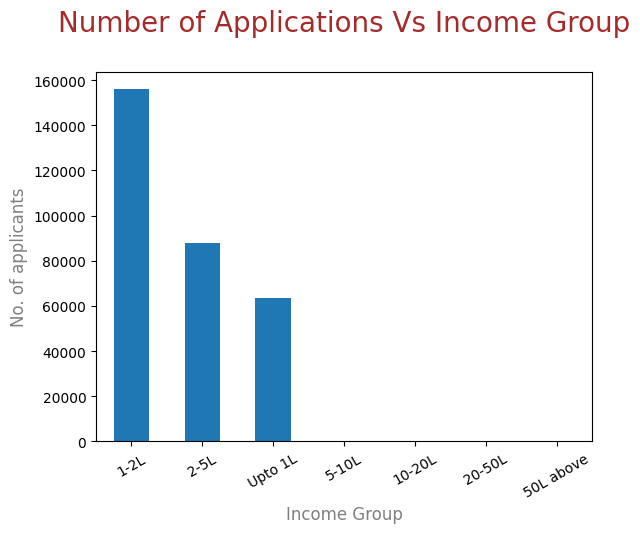

In [533]:
# Checking the values

application_df['INCOME_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Income Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Income Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- Maximum loan applicants are from lower income group i.e upto 500K. Bank should focus on this group.Also, we can cap the value at 20,00K.

3. We will also categorize the credit amount of the loan (AMT_CREDIT) column

In [534]:
# Check the credit amount of the loan - we can divide it by 100,000 for better readability

(application_df['AMT_CREDIT']/100000).describe()

count    307511.000000
mean          5.961537
std           3.915142
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          18.540000
Name: AMT_CREDIT, dtype: float64

In [535]:
# Binning AMT_ANNUITY based on above summary

bins = [0,1,5,10,20,30,40,50,100]
labels = ['Upto 1L','1-5L','5-10L','10-20L','20-30L','30-40L','40-50L','50L above']
application_df['CREDIT_GROUP'] = pd.cut(application_df['AMT_CREDIT'] / 100000, bins = bins, labels = labels )

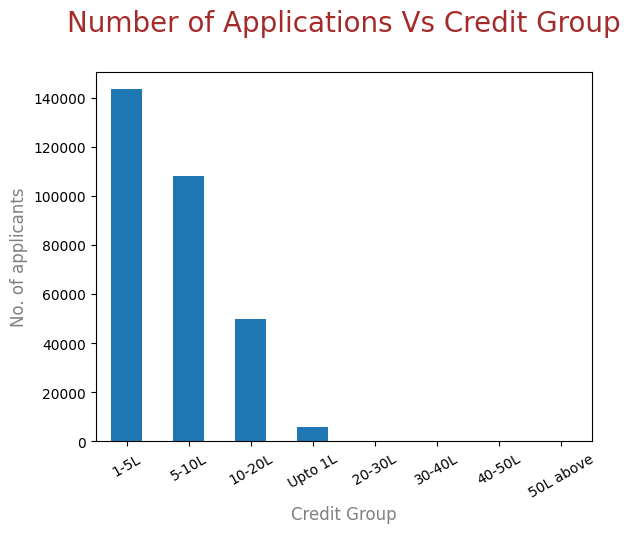

In [536]:
# Checking the values
application_df['CREDIT_GROUP'].value_counts().plot(kind='bar')
plt.title("Number of Applications Vs Credit Group\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Credit Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

- The number of applicants with credit amount range 1-20L is very high. Almost none above 30L.

### 2.4 Data Analysis

#### 2.4.1	Check the Imbalance percentage

What is Imbalance Percentage?

In our data set, there is a target variable/column named 'TARGET'. It represents whether the client is a defaulter or not.
If we segregate our dataset based on this column, and if the distribution turns out to be 50-50 i.e. 50% of the applicants are defaluters and the rest 50% are NOT, then our data set would be BALANCED. In any other case, it would be considered as IMBALANCED.

In [537]:
# Checking imbalance percentage

application_df['TARGET'].value_counts(normalize = True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

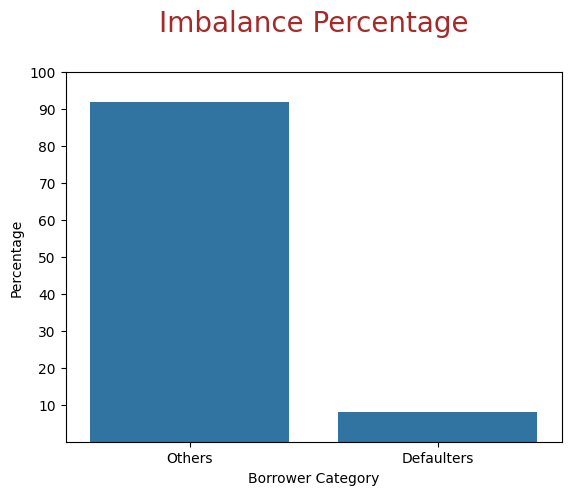

In [538]:
# Plotting imbalance percentage

#Extracting the imbalance percentage
Repayment_Status = application_df['TARGET'].value_counts(normalize=True)*100

# Defining the x values
x= ['Others','Defaulters']

# Defining the y ticks
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting barplot
data = {'Borrower Category': x, 'Percentage': Repayment_Status}
df = pd.DataFrame(data)

# Plotting barplot using the DataFrame
sns.barplot(x='Borrower Category', y='Percentage', data=df)

# Adding plot title, and x & y labels
plt.title('Imbalance Percentage\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Borrower Category")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()

- As per the above data, we can say that our data set is imbalanced with almost 8% defaulters. Rest all 92% were able to repay the loans.

#### 2.4.2	Segregate data based on TARGET column

Now, let's create 2 data sets to segregate our original data based on the TARGET column values to have defaulters in one dataframe and others in another.

In [539]:
# Creating data frame of Others

application_df0 = application_df[application_df['TARGET']==0]
application_df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188               1186   
2                    0.010032       19046            225               4260   
3                    0.008019       19005           3039               9833   
4                    0.028663       19932           3038               4311   
5                    0.035792       16941           1588               4970   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   
5                 1           1           0        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0       

In [540]:
# Creating data frame of Defaulters

application_df1 = application_df[application_df['TARGET']==1]
application_df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
26                    0.018029       18724           2628               6573   
40                    0.025164       17482           1262               1182   
42                    0.007305       13384           3597                 45   
81                    0.028663       24794         365243               5391   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers                1   
26                 1           0           0   Cooking staff                1   
40                 1           0           0        Laborers                2   
42                 1           1           0     Sales staff                2   
81                 1           0           0         Unknown                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40               

In [541]:
Categorical_cols = [col for col in application_df.columns if not (pd.api.types.is_numeric_dtype(application_df[col]))]
Categorical_cols.insert(0,'TARGET')

application_df_testchi=application_df[Categorical_cols]
application_df_testchi['TARGET'] = application_df_testchi['TARGET'].astype(bool)
#application_df_testchi = application_df_testchi.drop('AGE_GROUP', axis=1)
#application_df_testchi = application_df_testchi.drop('INCOME_GROUP', axis=1)
#application_df_testchi = application_df_testchi.drop('CREDIT_GROUP', axis=1)

CHi2 Test-To remove insignficant categorial Features

In [542]:
application_df_testchi.info()
Categorical_cols = [col for col in application_df_testchi.columns if not (pd.api.types.is_numeric_dtype(application_df_testchi[col]))]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   TARGET                      307511 non-null  bool    
 1   NAME_CONTRACT_TYPE          307511 non-null  object  
 2   CODE_GENDER                 307507 non-null  object  
 3   FLAG_OWN_CAR                307511 non-null  object  
 4   FLAG_OWN_REALTY             307511 non-null  object  
 5   NAME_TYPE_SUITE             306219 non-null  object  
 6   NAME_INCOME_TYPE            307511 non-null  object  
 7   NAME_EDUCATION_TYPE         307511 non-null  object  
 8   NAME_FAMILY_STATUS          307511 non-null  object  
 9   NAME_HOUSING_TYPE           307511 non-null  object  
 10  OCCUPATION_TYPE             307511 non-null  object  
 11  WEEKDAY_APPR_PROCESS_START  307511 non-null  object  
 12  ORGANIZATION_TYPE           307511 non-null  object  
 13 

In [543]:

from scipy.stats import chi2_contingency
import pandas as pd
chi2_results = []

# Calculate chi-square for each pair of categorical features
application_df_testchi.replace('Unknown', pd.NA, inplace=True)


def get_chi2_results(df, categorical_features):
  """
  Calculates chi-squared statistics and p-values for categorical features in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      categorical_features (list): A list of column names representing categorical features.

  Returns:
      pandas.DataFrame: A DataFrame containing chi2 values and p-values for each feature pair.
"""
  chi2_results = []
  for feature in categorical_features:
    if feature != 'TARGET':
      contingency_table = pd.crosstab(df[feature], df['TARGET'])
      chi2_stat, pval,_, _ = chi2_contingency(contingency_table)
      chi2_results.append({
            "feature1": feature,
            "feature2": 'TARGET',
            "chi2": "{:.2f}".format(chi2_stat),
            "pval": pval
        })
  return pd.DataFrame(chi2_results)


chi2_df = get_chi2_results(application_df_testchi.copy(), Categorical_cols)
chi2_df_sorted = chi2_df.sort_values('pval')

print(chi2_df_sorted)



                      feature1 feature2     chi2           pval
9              OCCUPATION_TYPE   TARGET  1975.08   0.000000e+00
12                   AGE_GROUP   TARGET  1791.04   0.000000e+00
11           ORGANIZATION_TYPE   TARGET  1609.24  5.224541e-299
5             NAME_INCOME_TYPE   TARGET  1253.47  1.928146e-266
6          NAME_EDUCATION_TYPE   TARGET  1019.21  2.447681e-219
1                  CODE_GENDER   TARGET   920.01  4.394091e-202
7           NAME_FAMILY_STATUS   TARGET   504.52  7.070080e-108
14                CREDIT_GROUP   TARGET   465.80  1.227607e-100
8            NAME_HOUSING_TYPE   TARGET   420.56   1.099089e-88
0           NAME_CONTRACT_TYPE   TARGET   293.15   1.023515e-65
13                INCOME_GROUP   TARGET   152.73   6.827968e-34
2                 FLAG_OWN_CAR   TARGET   146.66   9.330994e-34
4              NAME_TYPE_SUITE   TARGET    32.83   1.132931e-05
3              FLAG_OWN_REALTY   TARGET    11.58   6.681470e-04
10  WEEKDAY_APPR_PROCESS_START   TARGET 

Remove column-

*   WEEKDAY_APPR_PROCESS_START


```
# This is formatted as code
```



In [544]:
(application_df['FLAG_OWN_REALTY']).describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

In [545]:
 (application_df['NAME_TYPE_SUITE']).describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [546]:
application_df['FLAG_OWN_REALTY'] = application_df['FLAG_OWN_REALTY'].astype('category')
application_df['NAME_TYPE_SUITE'] = application_df['NAME_TYPE_SUITE'].astype('category')


In [547]:
application_df['TARGET'] = application_df['TARGET'].astype(bool)


In [548]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  bool    
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307507 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [549]:
application_df = application_df.drop('WEEKDAY_APPR_PROCESS_START', axis=1)


In [550]:
# Count DataFrames with specific column types
count_with_int = 0
count_with_float = 0
count_with_object = 0
count_with_category = 0

count_with_bool = 0

for column in application_df.columns:
    # Access the dtype of each column
    dtype = application_df[column].dtype

    if 'int' in str(dtype):
        count_with_int += 1
    if 'float' in str(dtype):
        count_with_float += 1
    if 'object' in str(dtype):
        count_with_object += 1
    if 'category' in str(dtype):
        count_with_category += 1
    if 'bool' in str(dtype):
        count_with_bool += 1

print("Number of DataFrames with integer columns:", count_with_int)
print("Number of DataFrames with float columns:", count_with_float)
print("Number of DataFrames with object columns:", count_with_category)
print("Number of DataFrames with category columns:", count_with_object)

print("Number of DataFrames with boolean columns:", count_with_bool)

Number of DataFrames with integer columns: 50
Number of DataFrames with float columns: 13
Number of DataFrames with object columns: 5
Number of DataFrames with category columns: 9
Number of DataFrames with boolean columns: 1


Feature Selection Based on Information gain - mutual information- for Numerical Features

```
# This is formatted as code
```



In [551]:
numerical_cols = [col for col in application_df.columns
                  if  (pd.api.types.is_numeric_dtype(application_df[col]))
                  ]


In [552]:
len(numerical_cols)

64

In [553]:
application_df_testnum=application_df[numerical_cols]


In [554]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(application_df_testnum.drop(labels=['TARGET'], axis=1),
    application_df_testnum['TARGET'],
    test_size=0.2,
    random_state=0)

In [555]:
y_train

307429    False
30132     False
188859    False
225559    False
138524    False
          ...  
122579    False
304137    False
152315     True
117952     True
305711    False
Name: TARGET, Length: 246008, dtype: bool

In [556]:


from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
for col in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[col]):
      X_train[col] = X_train[col].fillna(X_train[col].median())

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

FLAG_CONT_MOBILE               0.047797
FLAG_EMP_PHONE                 0.044806
FLAG_DOCUMENT_3                0.044329
FLAG_MOBIL                     0.035086
REGION_RATING_CLIENT           0.022878
REGION_RATING_CLIENT_W_CITY    0.021511
CNT_FAM_MEMBERS                0.018768
EXT_SOURCE_3                   0.014624
AMT_ANNUITY                    0.012436
FLAG_PHONE                     0.012333
EXT_SOURCE_2                   0.011883
YEAR_IN_SERVICE                0.009789
DAYS_EMPLOYED                  0.008783
REG_CITY_NOT_WORK_CITY         0.007948
AMT_REQ_CREDIT_BUREAU_YEAR     0.007889
AMT_CREDIT                     0.006241
LIVE_CITY_NOT_WORK_CITY        0.005479
FLAG_WORK_PHONE                0.005405
AMT_GOODS_PRICE                0.004926
DAYS_BIRTH                     0.004143
AGE                            0.004061
HOUR_APPR_PROCESS_START        0.003983
CNT_CHILDREN                   0.003563
REGION_POPULATION_RELATIVE     0.003481
BANK_MEMBERSHIP_DURATION       0.003115


In [557]:
mutual_info_sorted = mutual_info.sort_values(ascending=False)

num_features_to_select=int(len(mutual_info_sorted) * 0.80)

# Get the top 80% features
top_features = mutual_info_sorted[:num_features_to_select].index.tolist()

print(top_features)

['FLAG_CONT_MOBILE', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_3', 'FLAG_MOBIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_3', 'AMT_ANNUITY', 'FLAG_PHONE', 'EXT_SOURCE_2', 'YEAR_IN_SERVICE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_WORK_PHONE', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AGE', 'HOUR_APPR_PROCESS_START', 'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'BANK_MEMBERSHIP_DURATION', 'AMT_INCOME_TOTAL', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_REGISTRATION', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REG_REGION_NOT_LIVE_REGION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_6', 'AMT_REQ_CREDIT_BUREAU_MON', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_4', 'AMT_REQ_CREDIT_BUREAU_DAY', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_16', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DO

In [558]:
#least_features = list(set(mutual_info_sorted[:num_features_to_select].index.tolist()) - set(top_features))


# Get all features except 'SK_ID_CURR'
features_to_remove = [feature for feature in mutual_info_sorted[:num_features_to_select].index.tolist() if feature != 'SK_ID_CURR']

# Calculate least_features by removing features_to_remove from all features
least_features = list(set(mutual_info_sorted.index.tolist()) - set(features_to_remove))

least_features = [feature for feature in least_features if feature != 'SK_ID_CURR']

print(least_features)

['FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_17']


In [559]:
application_df = application_df.drop(columns=least_features)


In [560]:
# Count DataFrames with specific column types
count_with_int = 0
count_with_float = 0
count_with_object = 0
count_with_category = 0

count_with_bool = 0

for column in application_df.columns:
    # Access the dtype of each column
    dtype = application_df[column].dtype

    if 'int' in str(dtype):
        count_with_int += 1
    if 'float' in str(dtype):
        count_with_float += 1
    if 'object' in str(dtype):
        count_with_object += 1
    if 'category' in str(dtype):
        count_with_category += 1
    if 'bool' in str(dtype):
        count_with_bool += 1

print("Number of DataFrames with integer columns:", count_with_int)
print("Number of DataFrames with float columns:", count_with_float)
print("Number of DataFrames with object columns:", count_with_category)
print("Number of DataFrames with category columns:", count_with_object)

print("Number of DataFrames with boolean columns:", count_with_bool)

Number of DataFrames with integer columns: 40
Number of DataFrames with float columns: 11
Number of DataFrames with object columns: 5
Number of DataFrames with category columns: 9
Number of DataFrames with boolean columns: 1


In [561]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 66 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  bool    
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307507 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#### 2.4.3	Univariate Analysis

##### Categorical Variable Analysis

We will plot graphs of the below categorical variables to draw inferences-

- NAME_CONTRACT_TYPE
- CODE_GENDER
- OCCUPATION_TYPE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- INCOME_GROUP
- AGE_GROUP
- ORGANIZATION_TYPE
- CREDIT_GROUP
- FLAG_OWN_CAR


In [562]:
# Defining a function to plot univariate categorical variables

def univariate_categorical_plot(category1, category2, xlabel):

    plt.figure(figsize = [15,7])
    plt.subplot(1,2,1)
    sns.countplot(category1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1,2,2)
    sns.countplot(category2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.xticks(rotation=45, ha='right')

    plt.show()


In [563]:
# Defining a function to plot defaulter percentage against univariate categorical variable

def perc_defaulter(col1, col2, title, xlabel):

    tempdf = application_df[[col1,col2]].groupby([col2], as_index=False).mean()

    tempdf[col1] = tempdf[col1]*100
    tempdf.sort_values(by=col1, ascending=False, inplace=True)

    sns.barplot(x=col2, y = col1, data = tempdf)
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.ylabel('Defaulter %')
    plt.xticks(rotation=45, ha='right')
    plt.show()


##### FLAG_OWN_REALTY

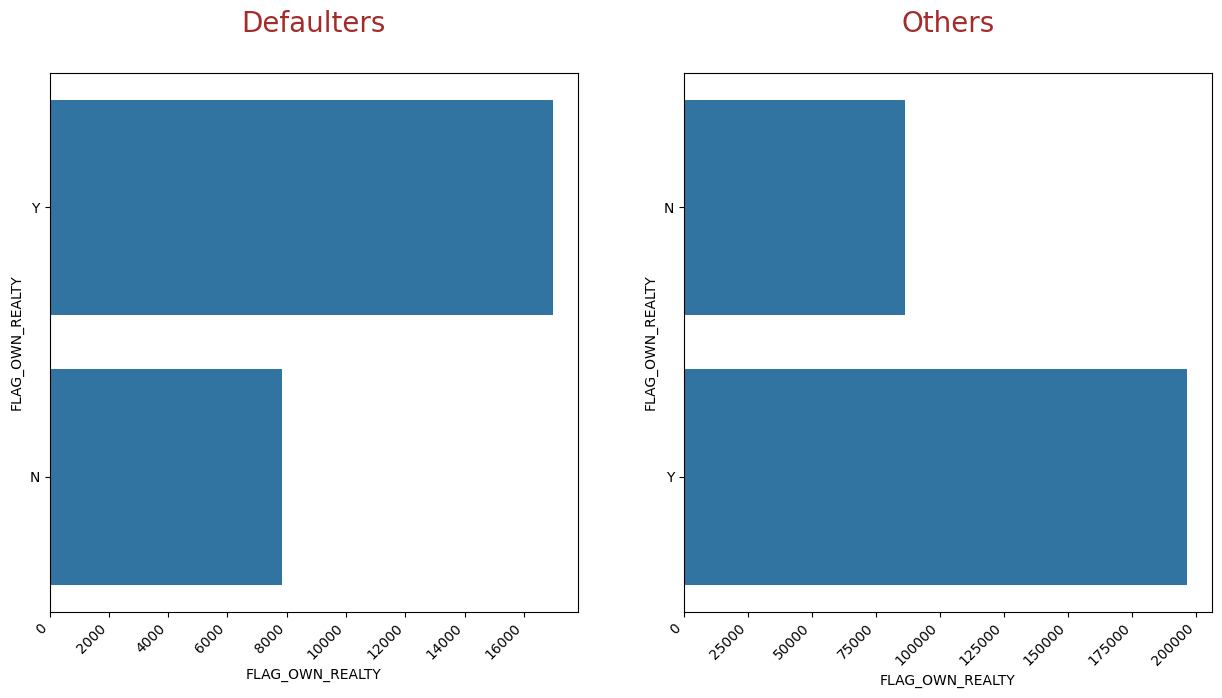

In [564]:
# Analyzing w.r.t Contract Type column

category1 = application_df1['FLAG_OWN_REALTY']
category2 = application_df0['FLAG_OWN_REALTY']
xlabel = 'FLAG_OWN_REALTY'

univariate_categorical_plot(category1, category2, xlabel)

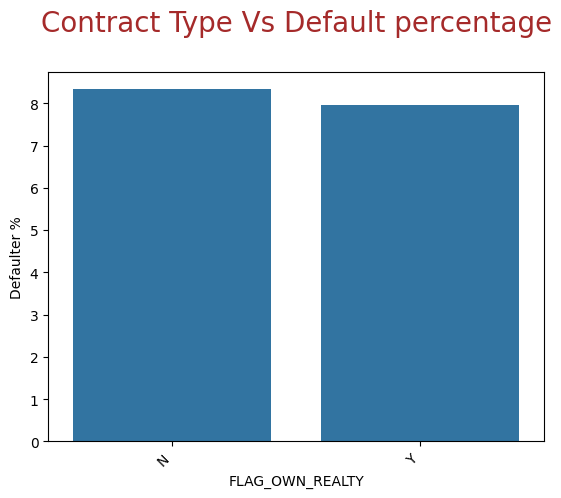

In [565]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'FLAG_OWN_REALTY'
title = 'Contract Type Vs Default percentage\n'
xlabel = 'FLAG_OWN_REALTY'

perc_defaulter(col1, col2, title, xlabel)


-Both owners of realty and not owners are high in number in defaulters




####FLAG_OWN_CAR

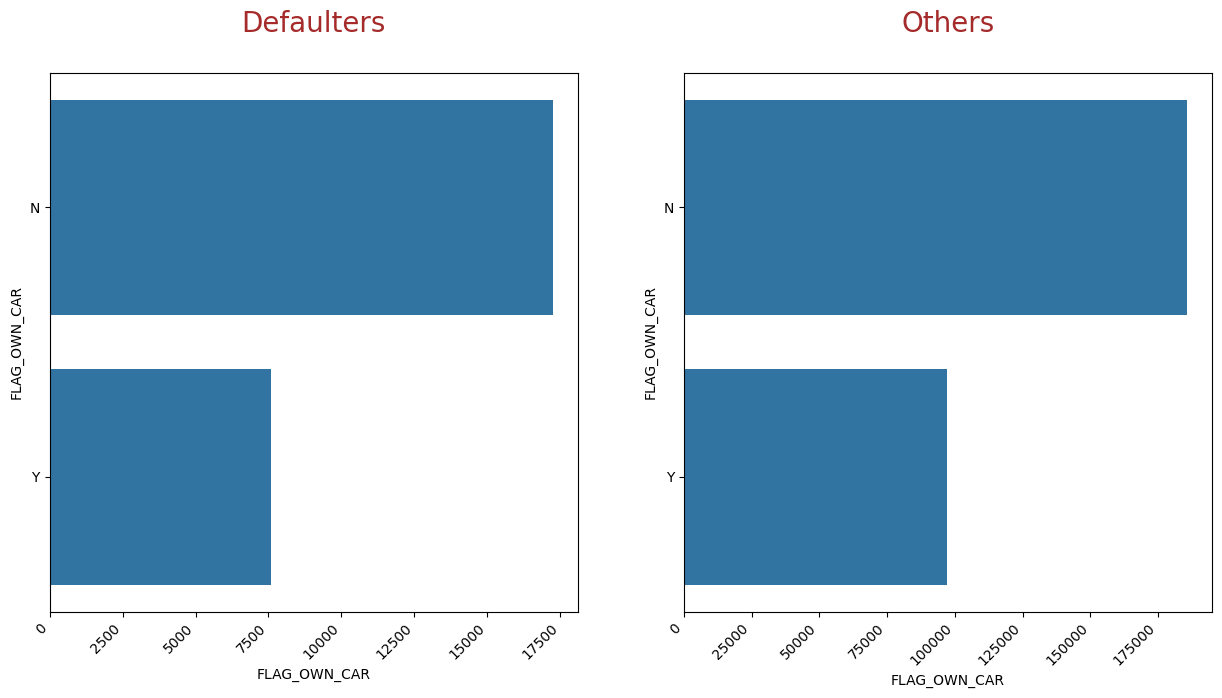

In [566]:
# Analyzing w.r.t Contract Type column

category1 = application_df1['FLAG_OWN_CAR']
category2 = application_df0['FLAG_OWN_CAR']
xlabel = 'FLAG_OWN_CAR'

univariate_categorical_plot(category1, category2, xlabel)

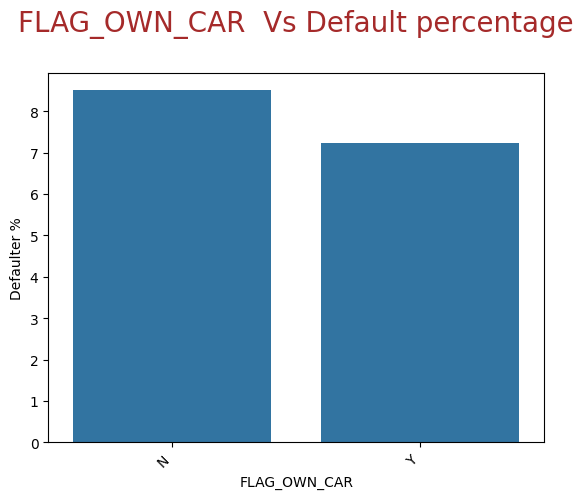

In [567]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'FLAG_OWN_CAR'
title = 'FLAG_OWN_CAR  Vs Default percentage\n'
xlabel = 'FLAG_OWN_CAR'

perc_defaulter(col1, col2, title, xlabel)

-Both owners of car and not owners are high in number in defaulters.

##### NAME_CONTRACT_TYPE

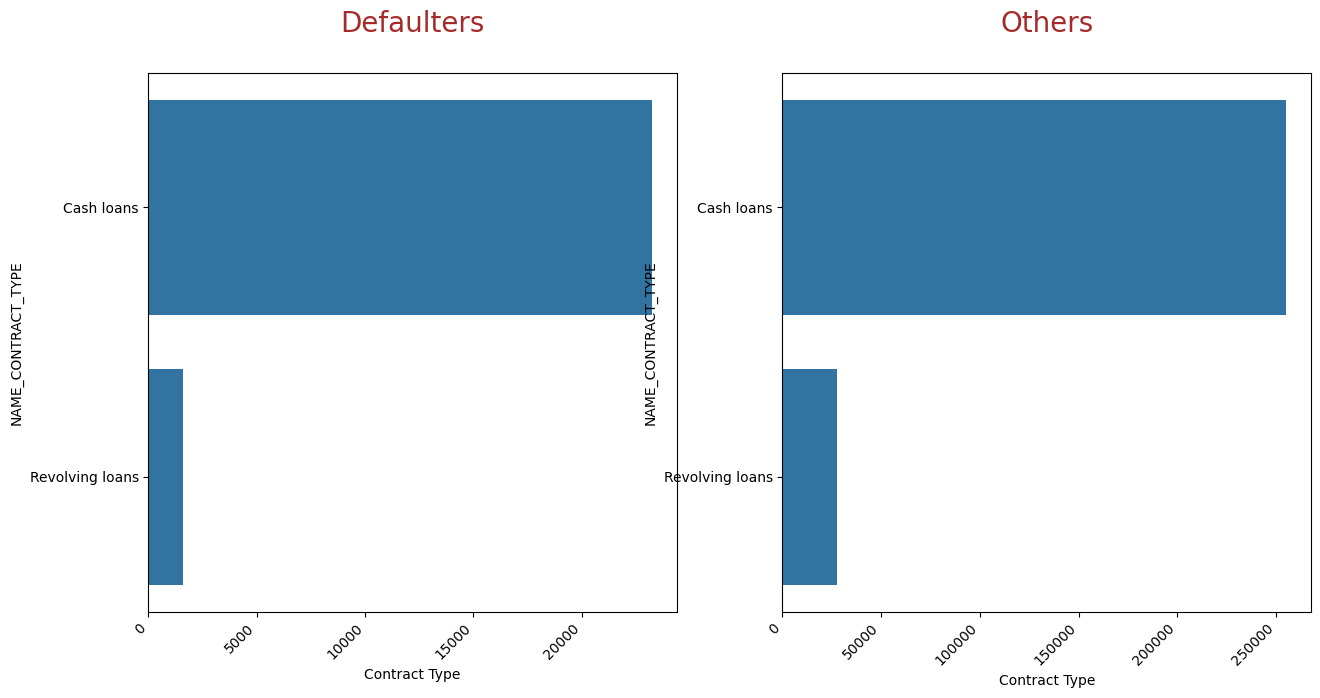

In [568]:
# Analyzing w.r.t Contract Type column

category1 = application_df1['NAME_CONTRACT_TYPE']
category2 = application_df0['NAME_CONTRACT_TYPE']
xlabel = 'Contract Type'

univariate_categorical_plot(category1, category2, xlabel)



```
`# This is formatted as code`
```

- Cash loan type contracts are high in number in both cases.

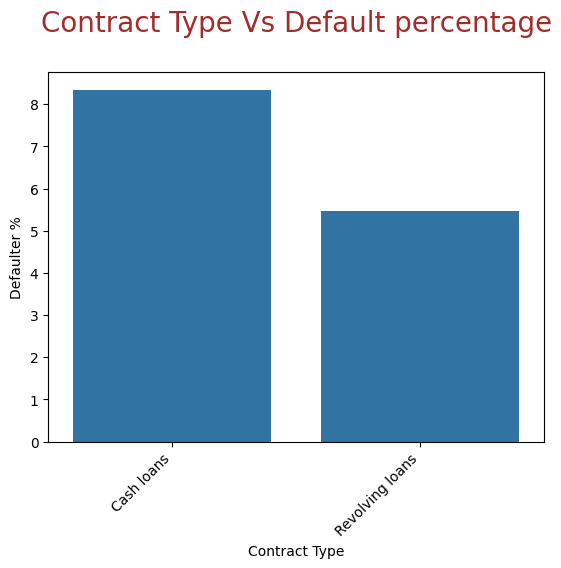

In [569]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_CONTRACT_TYPE'
title = 'Contract Type Vs Default percentage\n'
xlabel = 'Contract Type'

perc_defaulter(col1, col2, title, xlabel)

- Cash loan contract type are more likely to fail repayment

##### CODE_GENDER

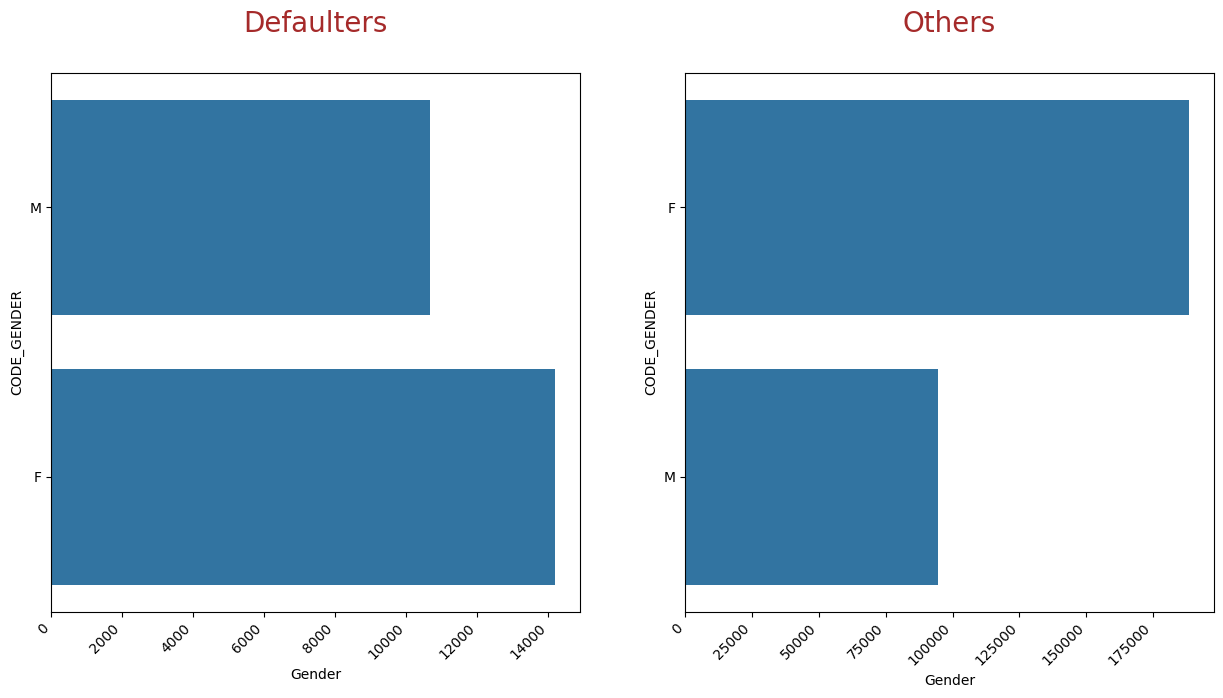

In [570]:
# Analyzing w.r.t Gender column

category1 = application_df1['CODE_GENDER']
category2 = application_df0['CODE_GENDER']
xlabel = 'Gender'

univariate_categorical_plot(category1, category2, xlabel)

- In either case, we have more female clients as compared to males. But we actually need to see the percentage of defaulters in these 2 gender categories to actually say which gender is more likely to become a defaulter.

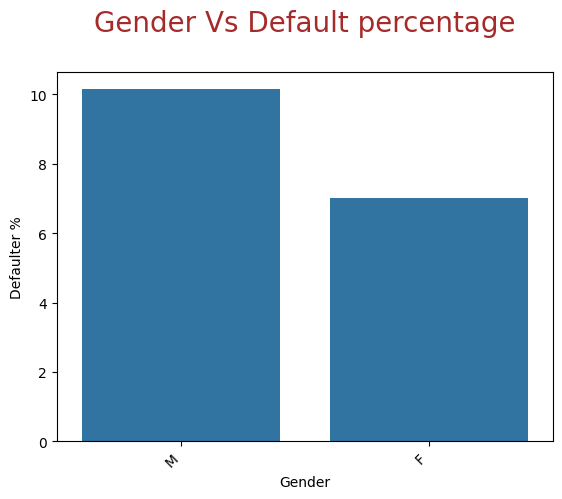

In [571]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'CODE_GENDER'
title = 'Gender Vs Default percentage\n'
xlabel = 'Gender'

perc_defaulter(col1, col2, title, xlabel)


- As seen from the above diagram, males have comparatively higher percentage of being defaulters than females.

##### OCCUPATION_TYPE

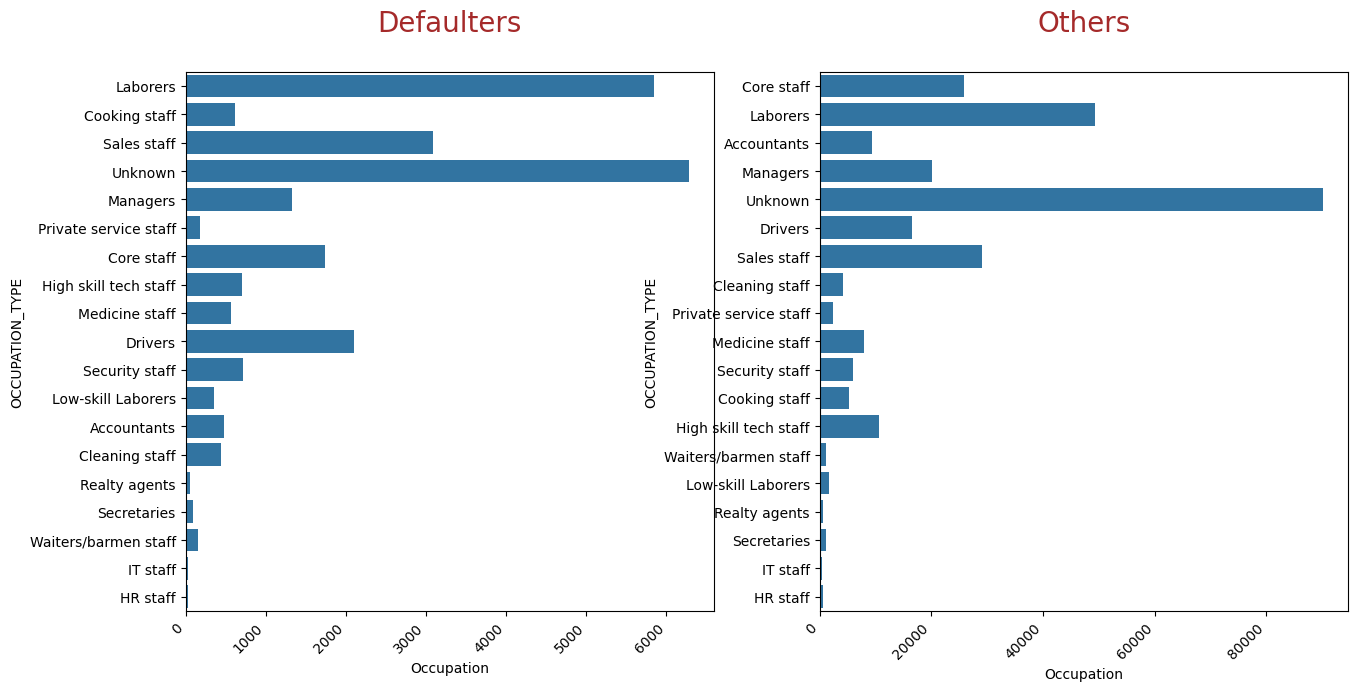

In [572]:
# Analyzing w.r.t Occupation column

category1 = application_df1['OCCUPATION_TYPE']
category2 = application_df0['OCCUPATION_TYPE']
xlabel = 'Occupation'

univariate_categorical_plot(category1, category2, xlabel)


- Here we can see that in both defaluters and others category, the laborers are the maximum in number. Let's check the percentage of defaulters in each occupation category.

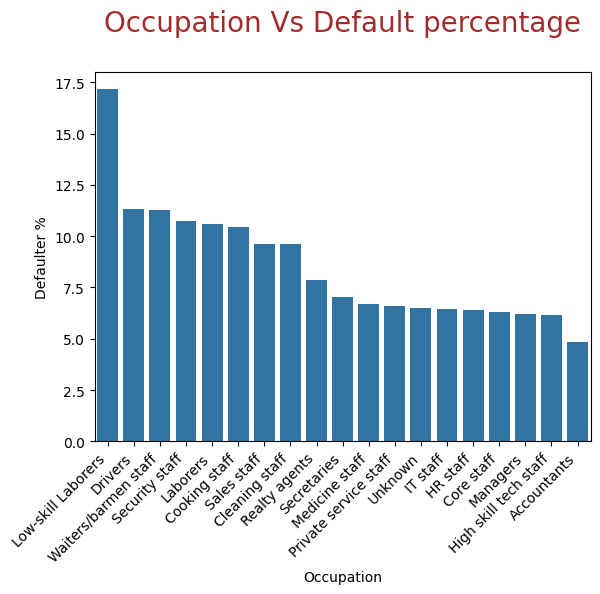

In [573]:

# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'OCCUPATION_TYPE'
title = 'Occupation Vs Default percentage\n'
xlabel = 'Occupation'

perc_defaulter(col1, col2, title, xlabel)

- As we see, low-skill laborers are most likely to default.

##### ORGANIZATION_TYPE

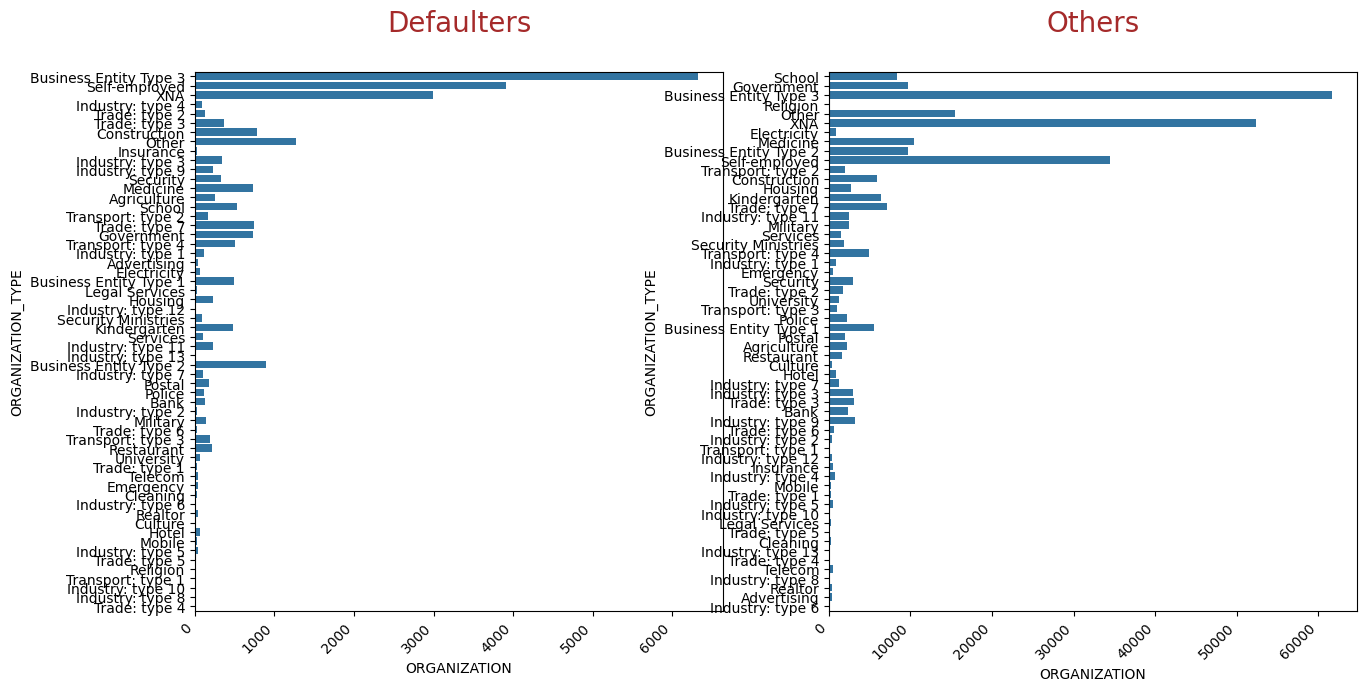

In [574]:
# Analyzing w.r.t Occupation column

category1 = application_df1['ORGANIZATION_TYPE']
category2 = application_df0['ORGANIZATION_TYPE']
xlabel = 'ORGANIZATION'

univariate_categorical_plot(category1, category2, xlabel)

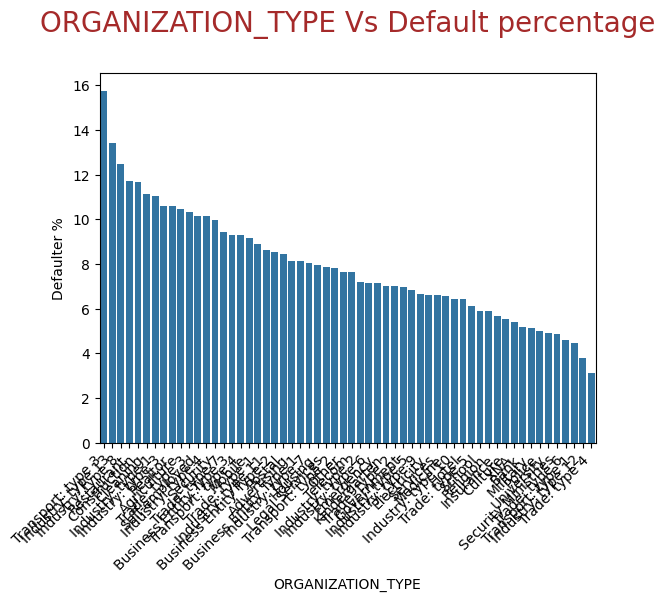

In [575]:

# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'ORGANIZATION_TYPE'
title = 'ORGANIZATION_TYPE Vs Default percentage\n'
xlabel = 'ORGANIZATION_TYPE'

perc_defaulter(col1, col2, title, xlabel)

The distribution among oragnization is very variant

##### NAME_INCOME_TYPE

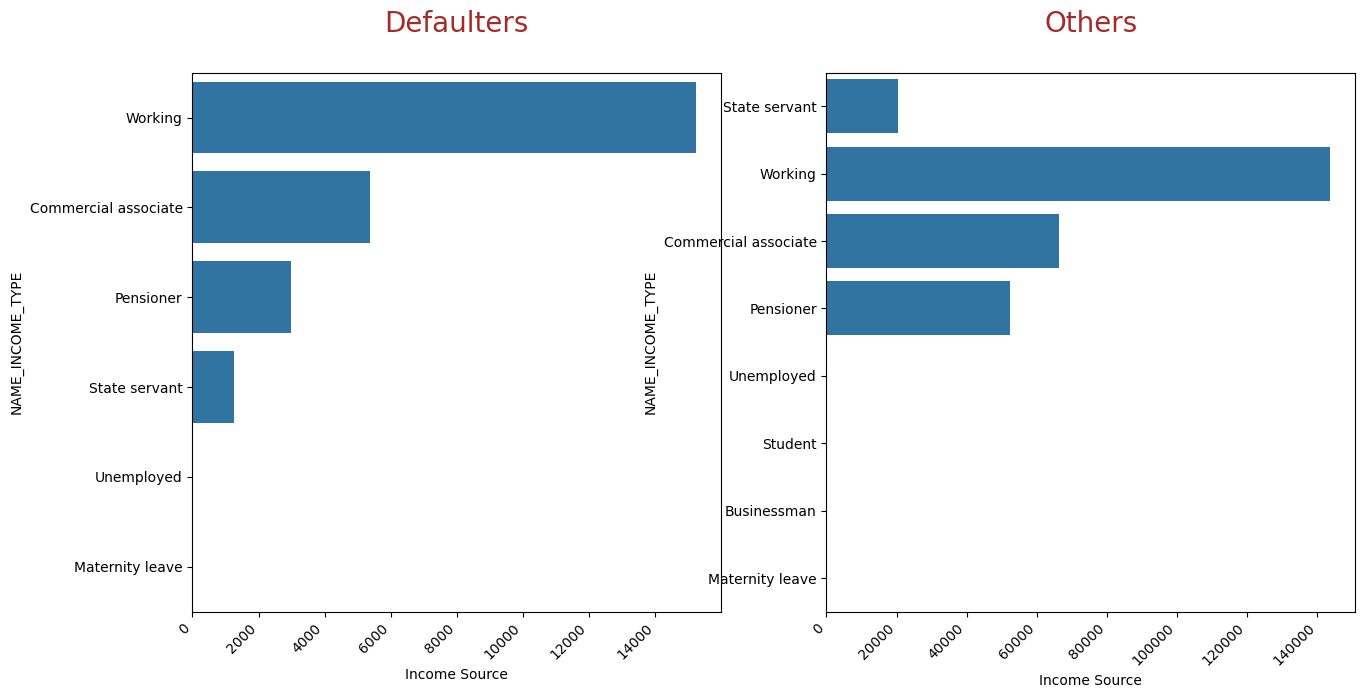

In [576]:
# Analyzing w.r.t Income Type column

category1 = application_df1['NAME_INCOME_TYPE']
category2 = application_df0['NAME_INCOME_TYPE']
xlabel = 'Income Source'

univariate_categorical_plot(category1, category2, xlabel)


- Here the numbers are high for Working people in both cases. Let's see the % age of defaulters for these categories.

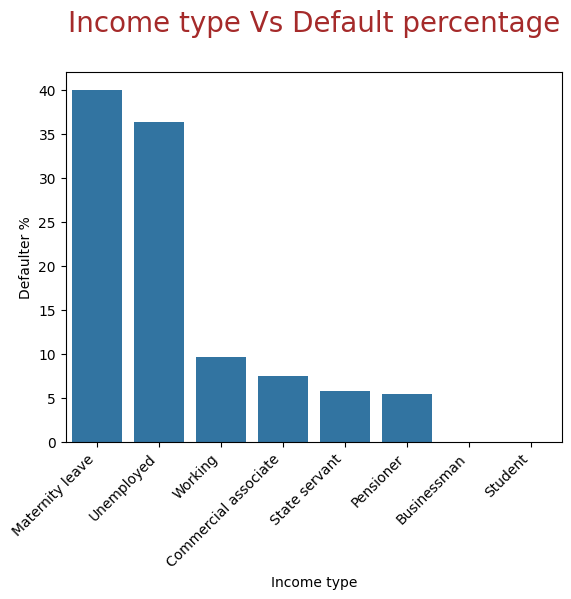

In [577]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_INCOME_TYPE'
title = 'Income type Vs Default percentage\n'
xlabel = 'Income type'

perc_defaulter(col1, col2, title, xlabel)


- The people on Maternity leave and unemployed categories are more likely to fail to repay.
- Businessman and Students have the lowest chances of defaulting.

##### NAME_EDUCATION_TYPE

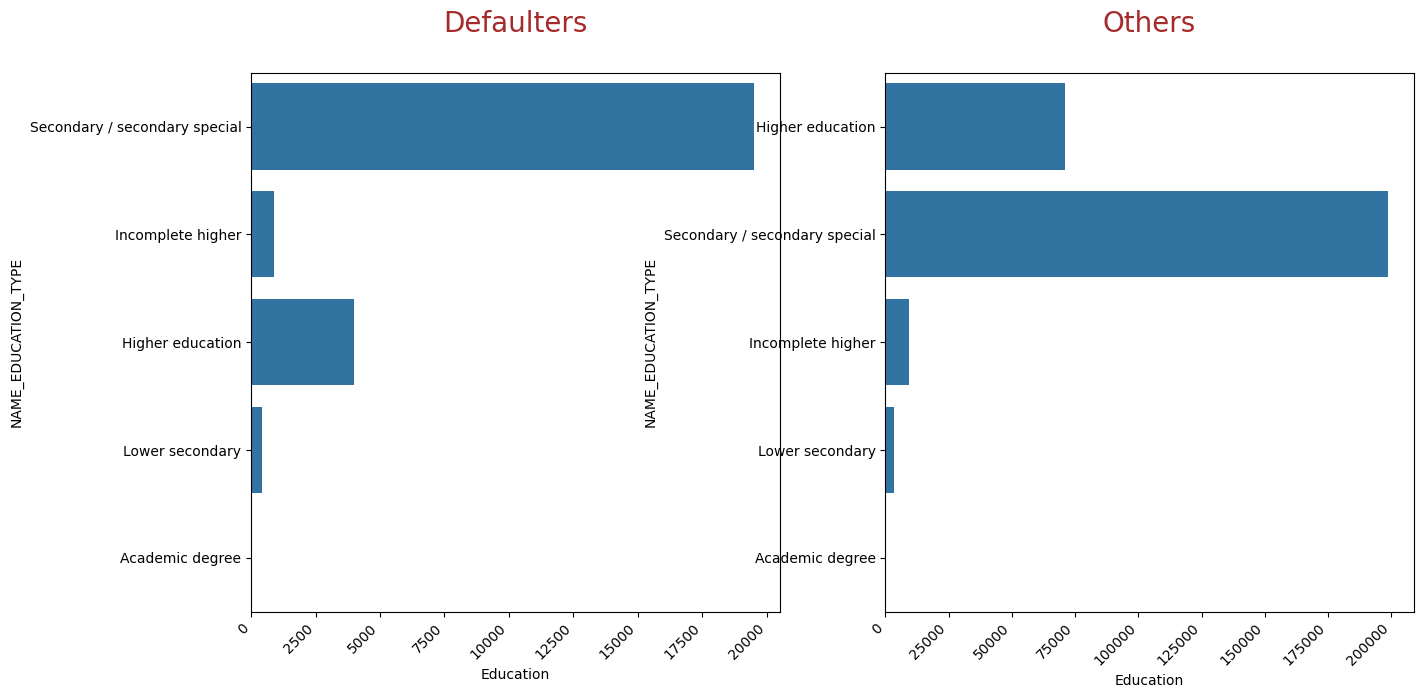

In [578]:
# Analyzing w.r.t Education Type column

category1 = application_df1['NAME_EDUCATION_TYPE']
category2 = application_df0['NAME_EDUCATION_TYPE']
xlabel = 'Education'

univariate_categorical_plot(category1, category2, xlabel)


- People with secondary education level have maximum count in either cases. Let's plot the % age graph.

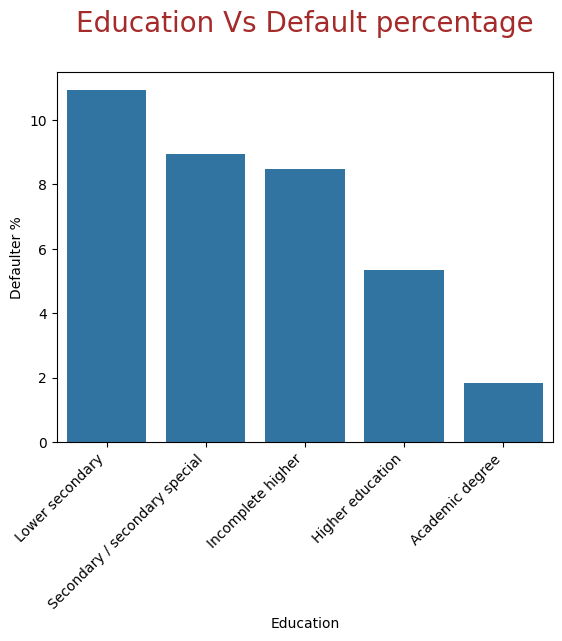

In [579]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_EDUCATION_TYPE'
title = 'Education Vs Default percentage\n'
xlabel = 'Education'

perc_defaulter(col1, col2, title, xlabel)


- People with lower secondary education level are more likely to fail repayment.
- People with academic degree or higher education, however, are mostly able to repay on time.

##### NAME_FAMILY_STATUS

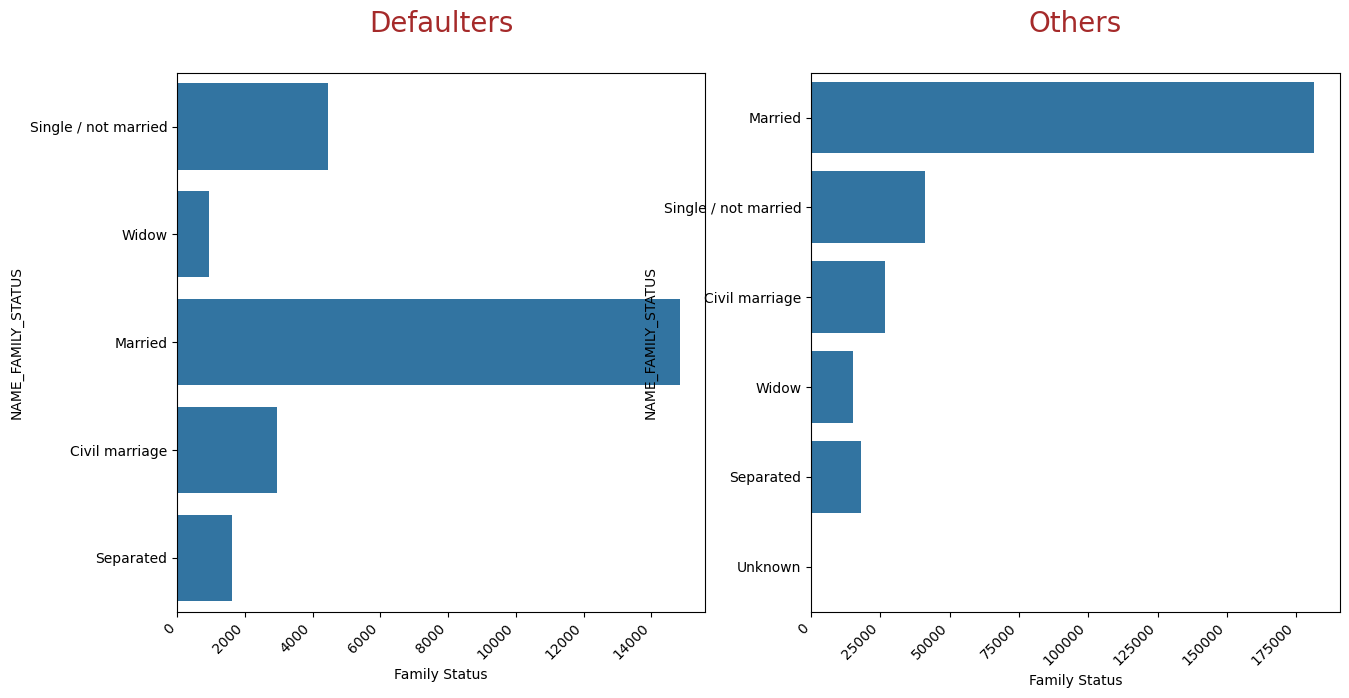

In [580]:
# Analyzing w.r.t Family Status Type column

category1 = application_df1['NAME_FAMILY_STATUS']
category2 = application_df0['NAME_FAMILY_STATUS']
xlabel = 'Family Status'

univariate_categorical_plot(category1, category2, xlabel)

- No. of married applicants are more in both cases.

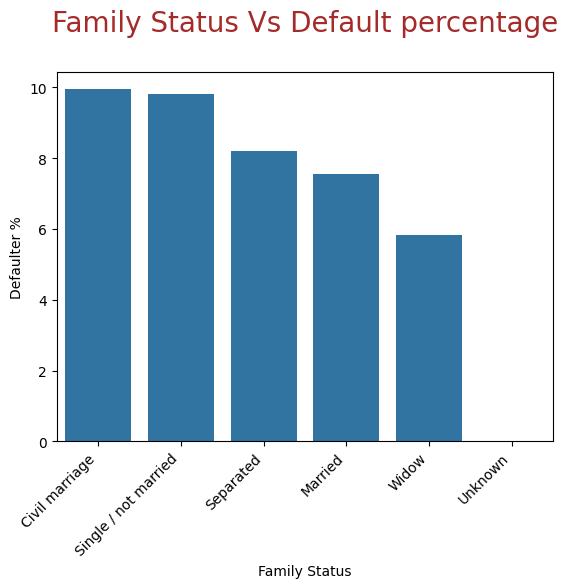

In [581]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_FAMILY_STATUS'
title = 'Family Status Vs Default percentage\n'
xlabel = 'Family Status'

perc_defaulter(col1, col2, title, xlabel)


- People in a civil marriage or those who are singles, are more likely to default.

##### *NAME_TYPE_SUITE*

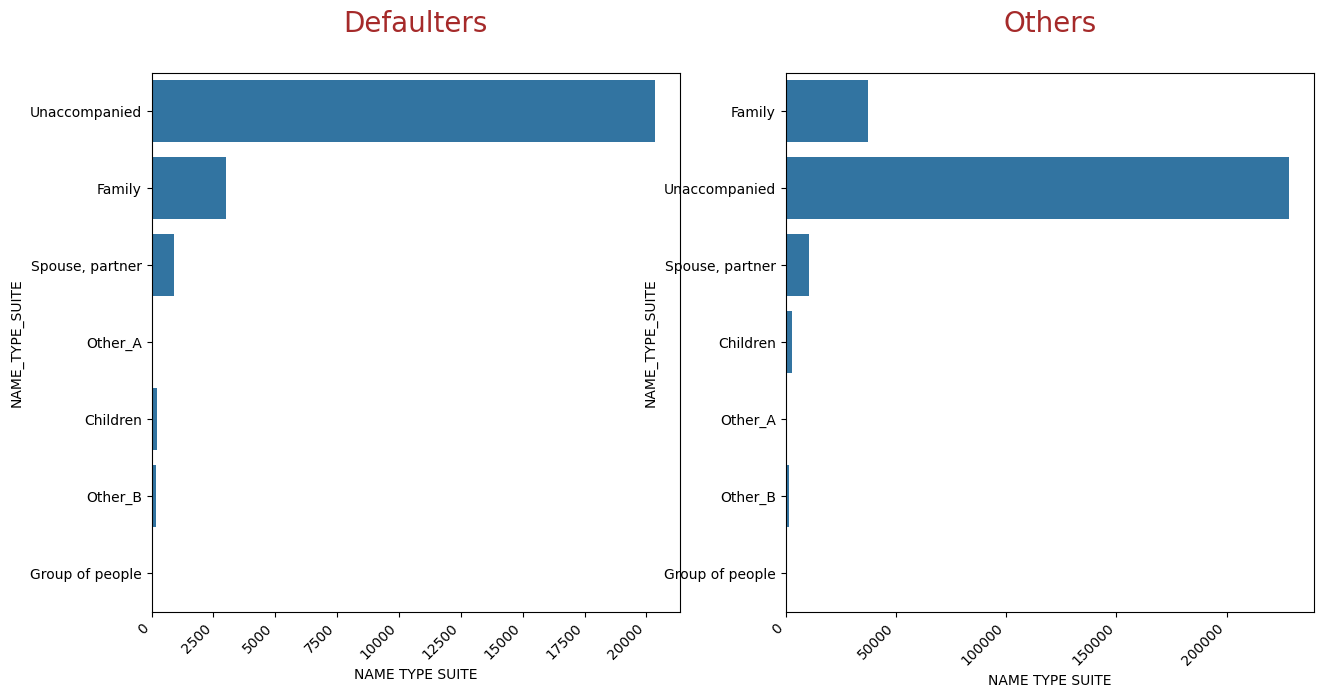

In [582]:
# Analyzing w.r.t Family Status Type column

category1 = application_df1['NAME_TYPE_SUITE']
category2 = application_df0['NAME_TYPE_SUITE']
xlabel = 'NAME TYPE SUITE'

univariate_categorical_plot(category1, category2, xlabel)

- No. of Unaccompanied applicants are more in both cases.
- Less no. of applicants are joint, family, children, Other_A, Other_B and Group of People.

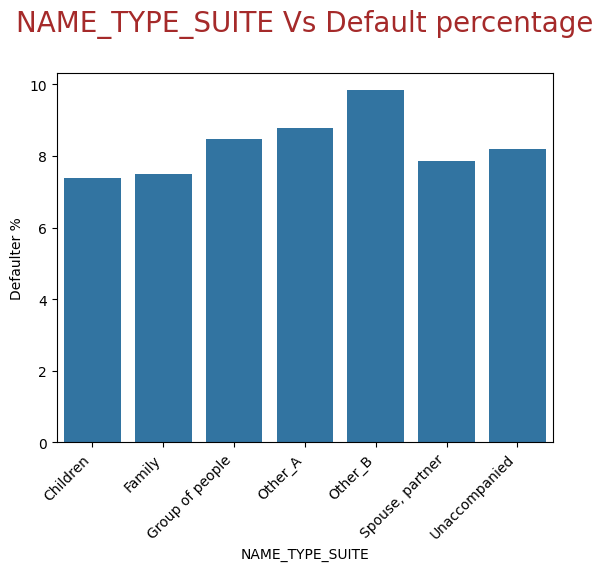

In [583]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_TYPE_SUITE'
title = 'NAME_TYPE_SUITE Vs Default percentage\n'
xlabel = 'NAME_TYPE_SUITE'

perc_defaulter(col1, col2, title, xlabel)

- No. of Other_B applicants the most defaulter

##### NAME_HOUSING_TYPE

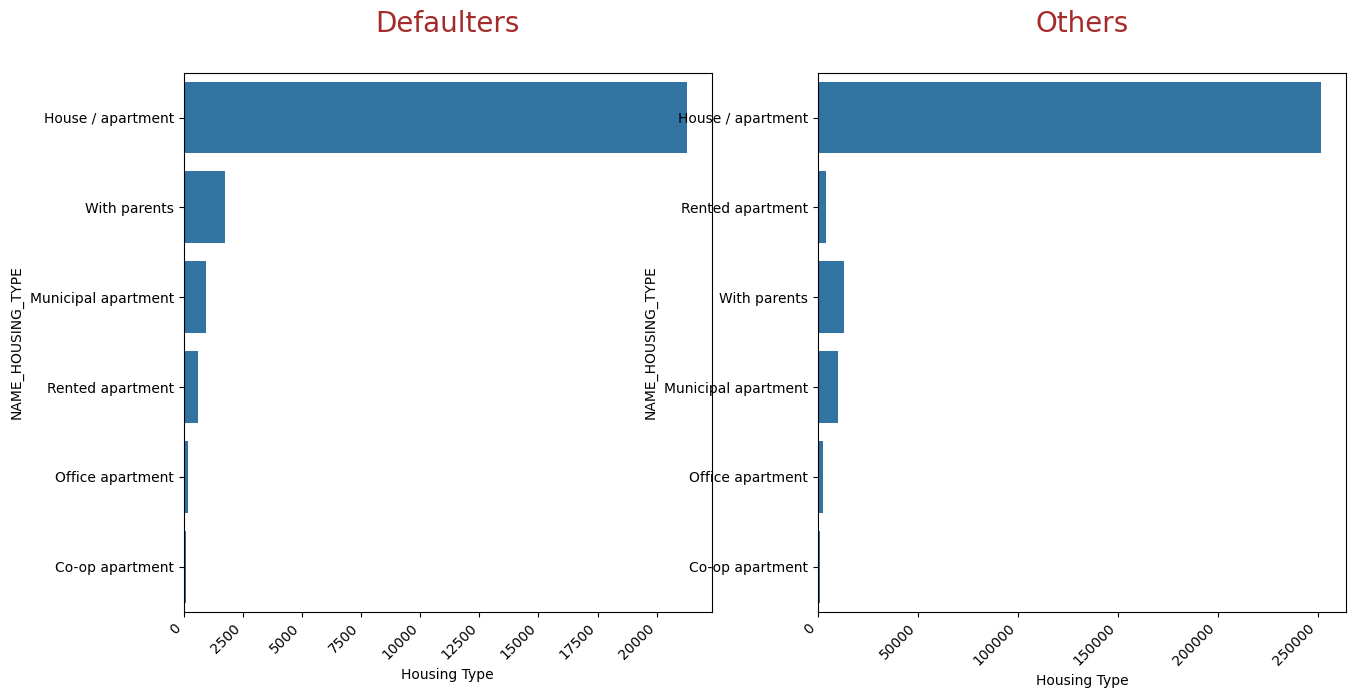

In [584]:
# Analyzing w.r.t Housing Type Type column


category1 = application_df1['NAME_HOUSING_TYPE']
category2 = application_df0['NAME_HOUSING_TYPE']
xlabel = 'Housing Type'

univariate_categorical_plot(category1, category2, xlabel)

- A major count of applicants stay in house/apartment. Very less people stay in office or co-op apartments.

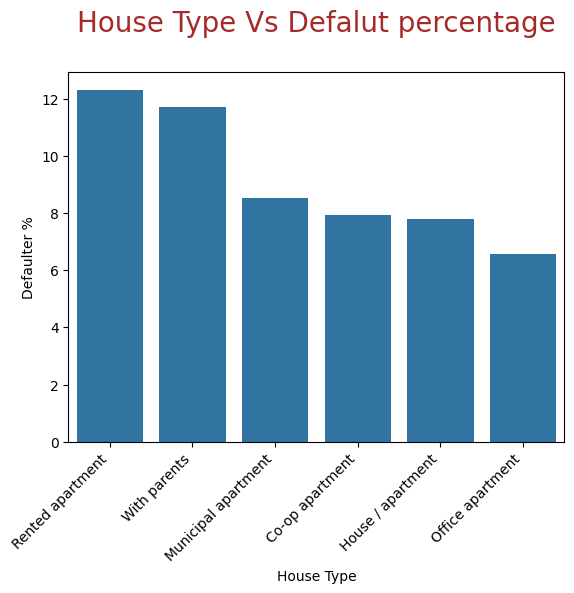

In [585]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'NAME_HOUSING_TYPE'
title = 'House Type Vs Defalut percentage\n'
xlabel = 'House Type'

perc_defaulter(col1, col2, title, xlabel)

- Most of the applicants who are likely to default are either staying in a rented apartment or with parents compared to other housing types.

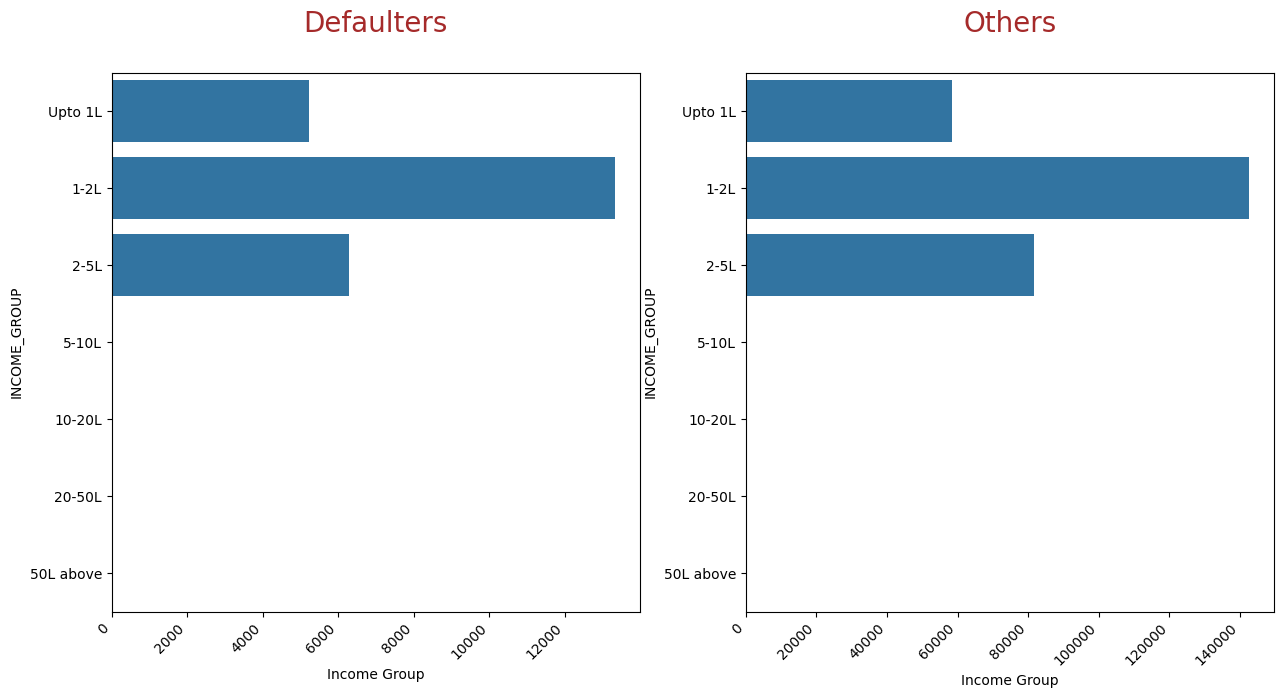

In [586]:
# Analyzing w.r.t Income Group column

category1 = application_df1['INCOME_GROUP']
category2 = application_df0['INCOME_GROUP']
xlabel = 'Income Group'

univariate_categorical_plot(category1, category2, xlabel)


:- Most of the loan applicants with an income range 100K-200K are most likely to default.

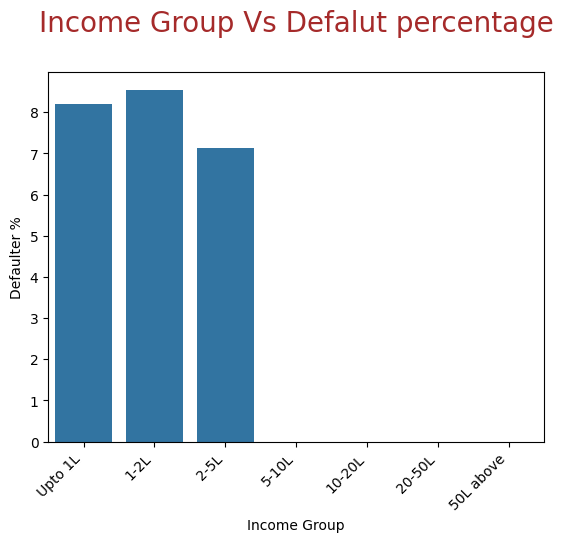

In [587]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'INCOME_GROUP'
title = 'Income Group Vs Defalut percentage\n'
xlabel = 'Income Group'

perc_defaulter(col1, col2, title, xlabel)

- Lower the income group higher than chance of defaulting.
- Maximum defaulting income group is 100K-200K

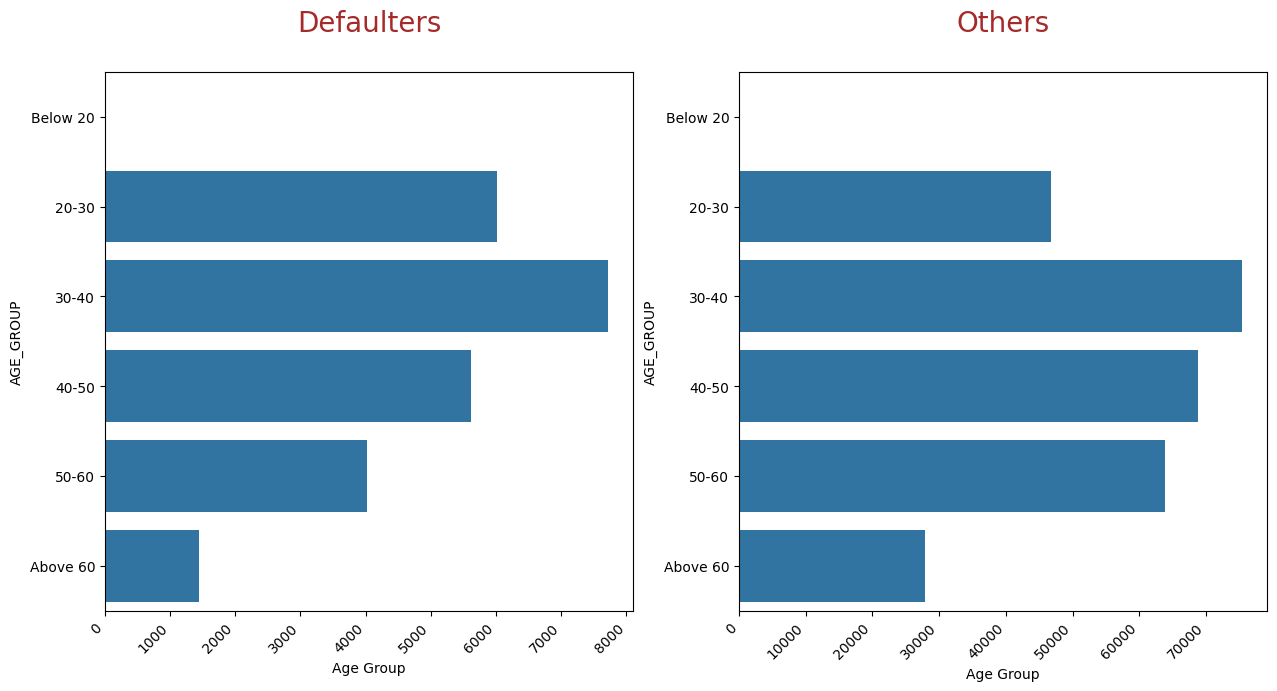

In [588]:
# Analyzing w.r.t Income Group column

category1 = application_df1['AGE_GROUP']
category2 = application_df0['AGE_GROUP']
xlabel = 'Age Group'

univariate_categorical_plot(category1, category2, xlabel)

- From these plots it seems people in the age range 30-40 are more likely to default.

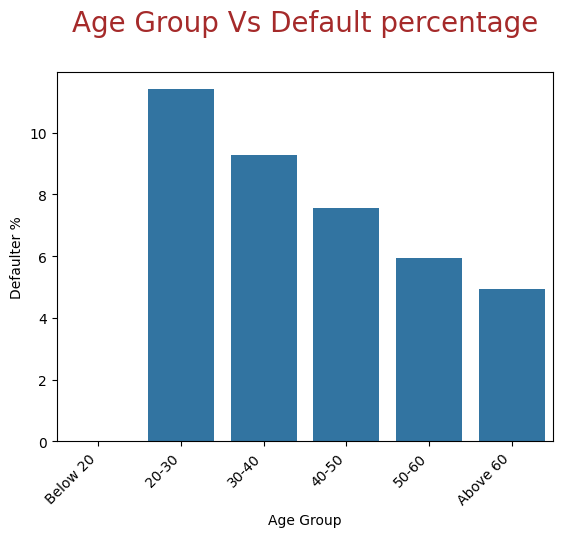

In [589]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'AGE_GROUP'
title = 'Age Group Vs Default percentage\n'
xlabel = 'Age Group'

perc_defaulter(col1, col2, title, xlabel)

- However, this plot says, the percentage of loan default is highest in the age group 20-30.
- The loan default percentage decreases with increase in age.

####Credit Group

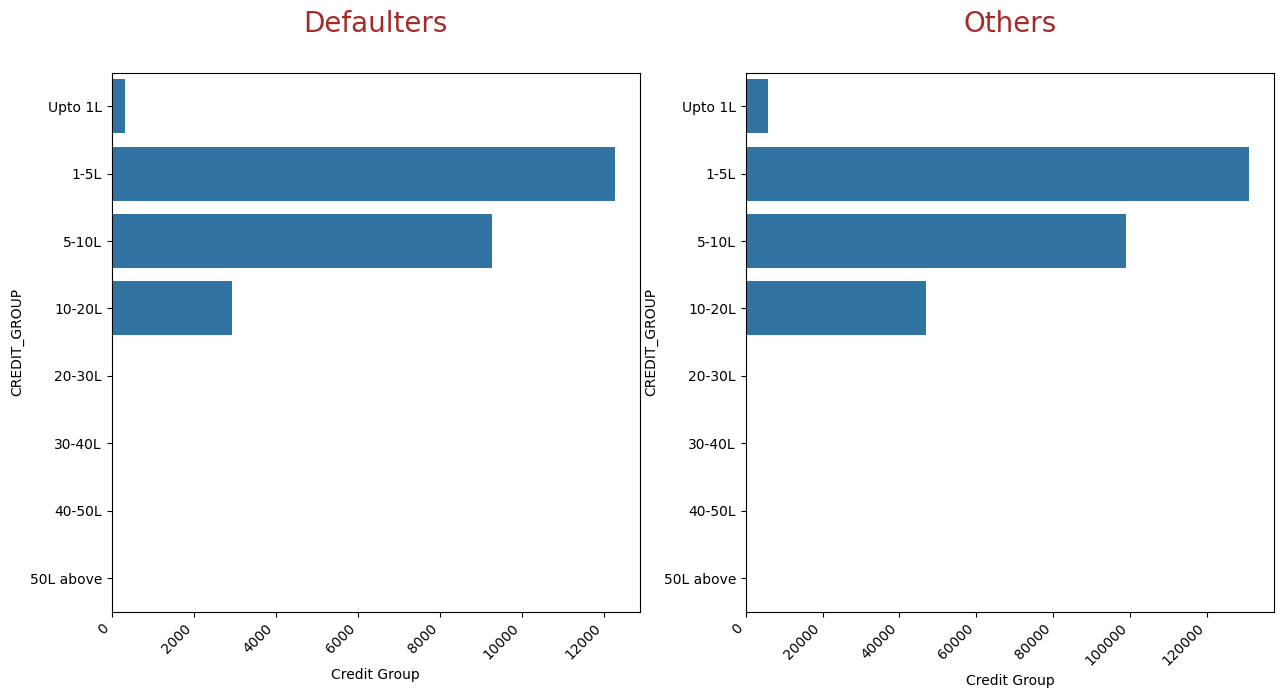

In [590]:
# Analyzing w.r.t Income Group column

category1 = application_df1['CREDIT_GROUP']
category2 = application_df0['CREDIT_GROUP']
xlabel = 'Credit Group'

univariate_categorical_plot(category1, category2, xlabel)

1-5L is highest among both defaulter and non-defaulters

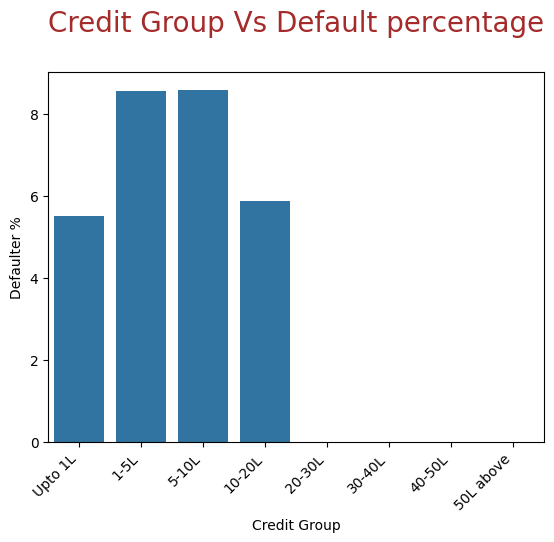

In [591]:
# Plot the percentage of defaulters in each category

col1 = 'TARGET'
col2 = 'CREDIT_GROUP'
title = 'Credit Group Vs Default percentage\n'
xlabel = 'Credit Group'

perc_defaulter(col1, col2, title, xlabel)

1-5L and 5-10L are the most defaulters

##### Numeric variable Analysis

Here we are going to consider the below numeric columns and draw are conclusion on them.

- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- CNT_CHILDREN
- DAYS_BIRTH

In [592]:
# Defining a function to plot univariate numerical columns

def univariate_numerical_plots(col1, col2, title, xlabel):
    sns.distplot(col1 , hist=False, label='Defaulters')
    sns.distplot(col2 , hist=False, label='Others')
    plt.title(title, fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

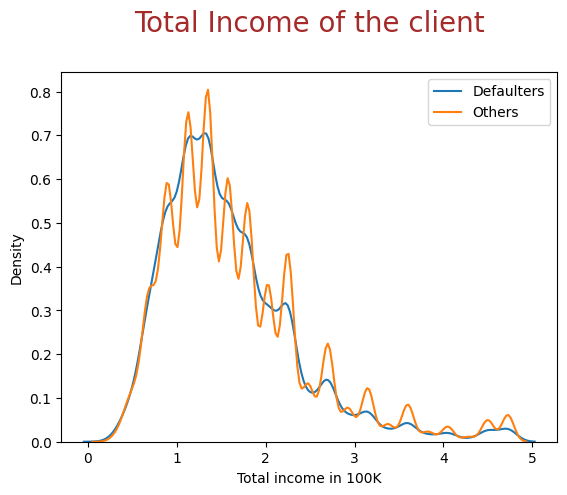

In [593]:
# Plotting AMT_INCOME_TOTAL

col1 = application_df1['AMT_INCOME_TOTAL']/100000
col2 = application_df0['AMT_INCOME_TOTAL']/100000
title = 'Total Income of the client\n'
xlabel = 'Total income in 100K'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the applicants are in low income range.

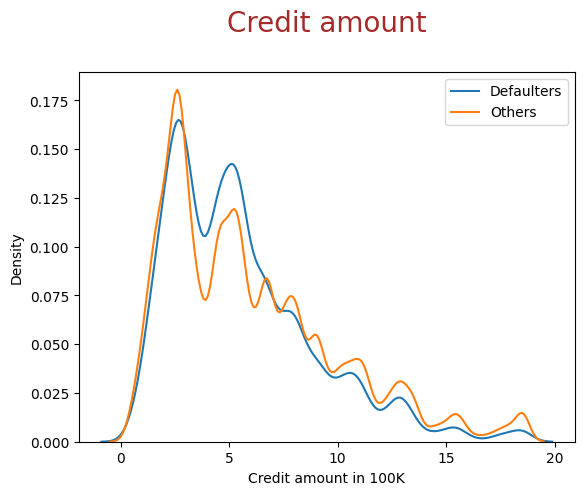

In [594]:
# Plotting AMT_CREDIT

col1 = application_df1['AMT_CREDIT']/100000
col2 = application_df0['AMT_CREDIT']/100000
title = 'Credit amount\n'
xlabel = 'Credit amount in 100K'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the loans are given with credit amount less than 10,000K.

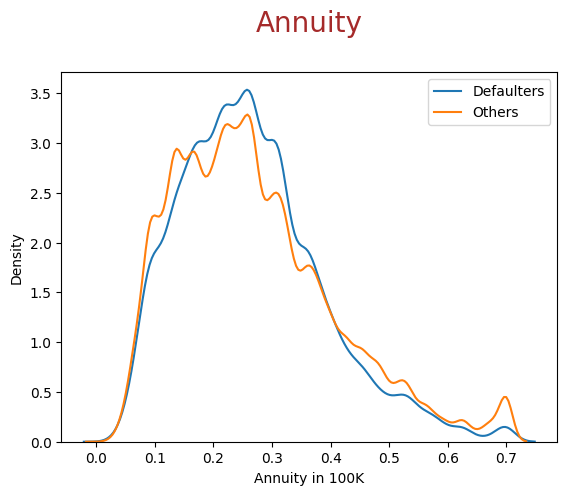

In [595]:
# Plotting AMT_ANNUITY

col1 = application_df1['AMT_ANNUITY']/100000
col2 = application_df0['AMT_ANNUITY']/100000
title = 'Annuity\n'
xlabel = 'Annuity in 100K'

univariate_numerical_plots(col1, col2, title, xlabel)


- Most of the loan annuity is less than 75, 000.

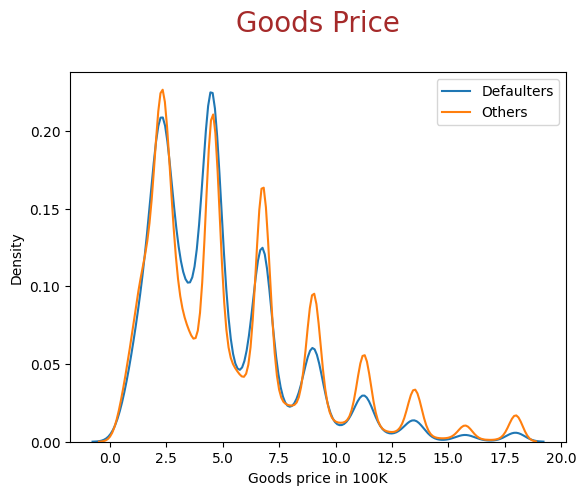

In [596]:
# Plotting AMT_GOODS_PRICE

col1 = application_df1['AMT_GOODS_PRICE']/100000
col2 = application_df0['AMT_GOODS_PRICE']/100000
title = 'Goods Price\n'
xlabel = 'Goods price in 100K'

univariate_numerical_plots(col1, col2, title, xlabel)


- Goods amount price is mostly less than 15,000K.

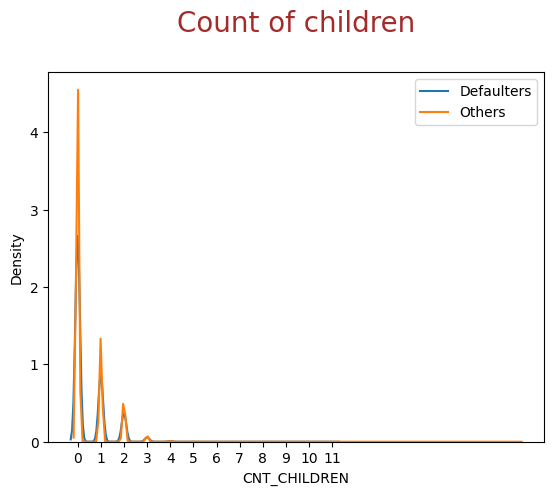

In [597]:
# Plotting CNT_CHILDREN

sns.distplot(application_df1['CNT_CHILDREN'],hist=False, label='Defaulters')
sns.distplot(application_df0['CNT_CHILDREN'],hist=False, label='Others')
xlabel = 'Children'
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(ticks)
plt.legend()
plt.title('Count of children\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- Majority of the applicants are having no children. Mostly they have 3 or less children.

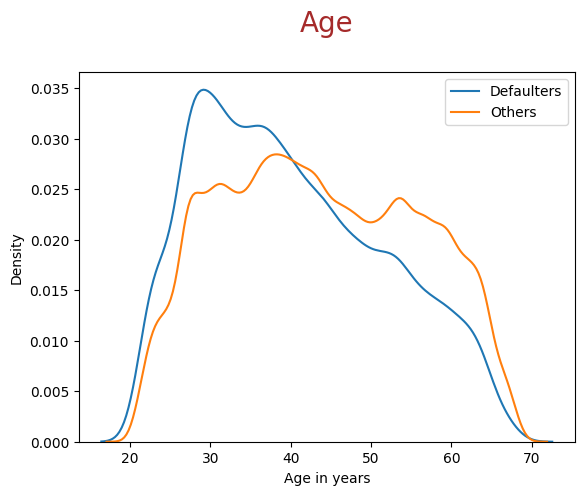

In [598]:
# Plotting DAYS_BIRTH

col1 = application_df1['DAYS_BIRTH']//365
col2 = application_df0['DAYS_BIRTH']//365
title = 'Age\n'
xlabel = 'Age in years'

univariate_numerical_plots(col1, col2, title, xlabel)


- Defaulters are more in 25-40 age group. Above 40, the number of defaulters tends to decrease.

#### 2.4.4	Correlation

Feature Reduction

In [599]:
corr_df1 = application_df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df1

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.350124     0.427960         0.352770   
AMT_CREDIT                0.350124    1.000000     0.758001         0.982440   
AMT_ANNUITY               0.427960    0.758001     1.000000         0.757730   
AMT_GOODS_PRICE           0.352770    0.982440     0.757730         1.000000   
DAYS_BIRTH                0.000915    0.136621     0.013494         0.136704   
DAYS_EMPLOYED            -0.118326    0.002919    -0.083696         0.007327   
CNT_CHILDREN             -0.000575   -0.001430     0.031440        -0.008059   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL    0.000915      -0.118326     -0.000575  
AMT_CREDIT          0.136621       0.002919     -0.001430  
AMT_ANNUITY         0.013494      -0.083696      0.031440  
AMT_GOODS_PRICE     0.136704       0.007327     -0.008059  
DAYS_BIRTH          1.000000       0.582185     -0.259109  
DAYS_EMPLOYED       0.582185       1.000000     -0.192864  
CNT_CHILDREN       -0.259109      -0.192864      1.000000

In [600]:
corr_df0 = application_df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN']].corr()
corr_df0

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.410460     0.488409         0.417296   
AMT_CREDIT                0.410460    1.000000     0.789835         0.986732   
AMT_ANNUITY               0.488409    0.789835     1.000000         0.792956   
AMT_GOODS_PRICE           0.417296    0.986732     0.792956         1.000000   
DAYS_BIRTH               -0.079204    0.048621    -0.014079         0.045768   
DAYS_EMPLOYED            -0.175147   -0.070575    -0.109546        -0.068953   
CNT_CHILDREN              0.032348    0.003073     0.021495        -0.000612   

                  DAYS_BIRTH  DAYS_EMPLOYED  CNT_CHILDREN  
AMT_INCOME_TOTAL   -0.079204      -0.175147      0.032348  
AMT_CREDIT          0.048621      -0.070575      0.003073  
AMT_ANNUITY        -0.014079      -0.109546      0.021495  
AMT_GOODS_PRICE     0.045768      -0.068953     -0.000612  
DAYS_BIRTH          1.000000       0.626114     -0.336966  
DAYS_EMPLOYED       0.626114       1.000000     -0.245174  
CNT_CHILDREN       -0.336966      -0.245174      1.000000

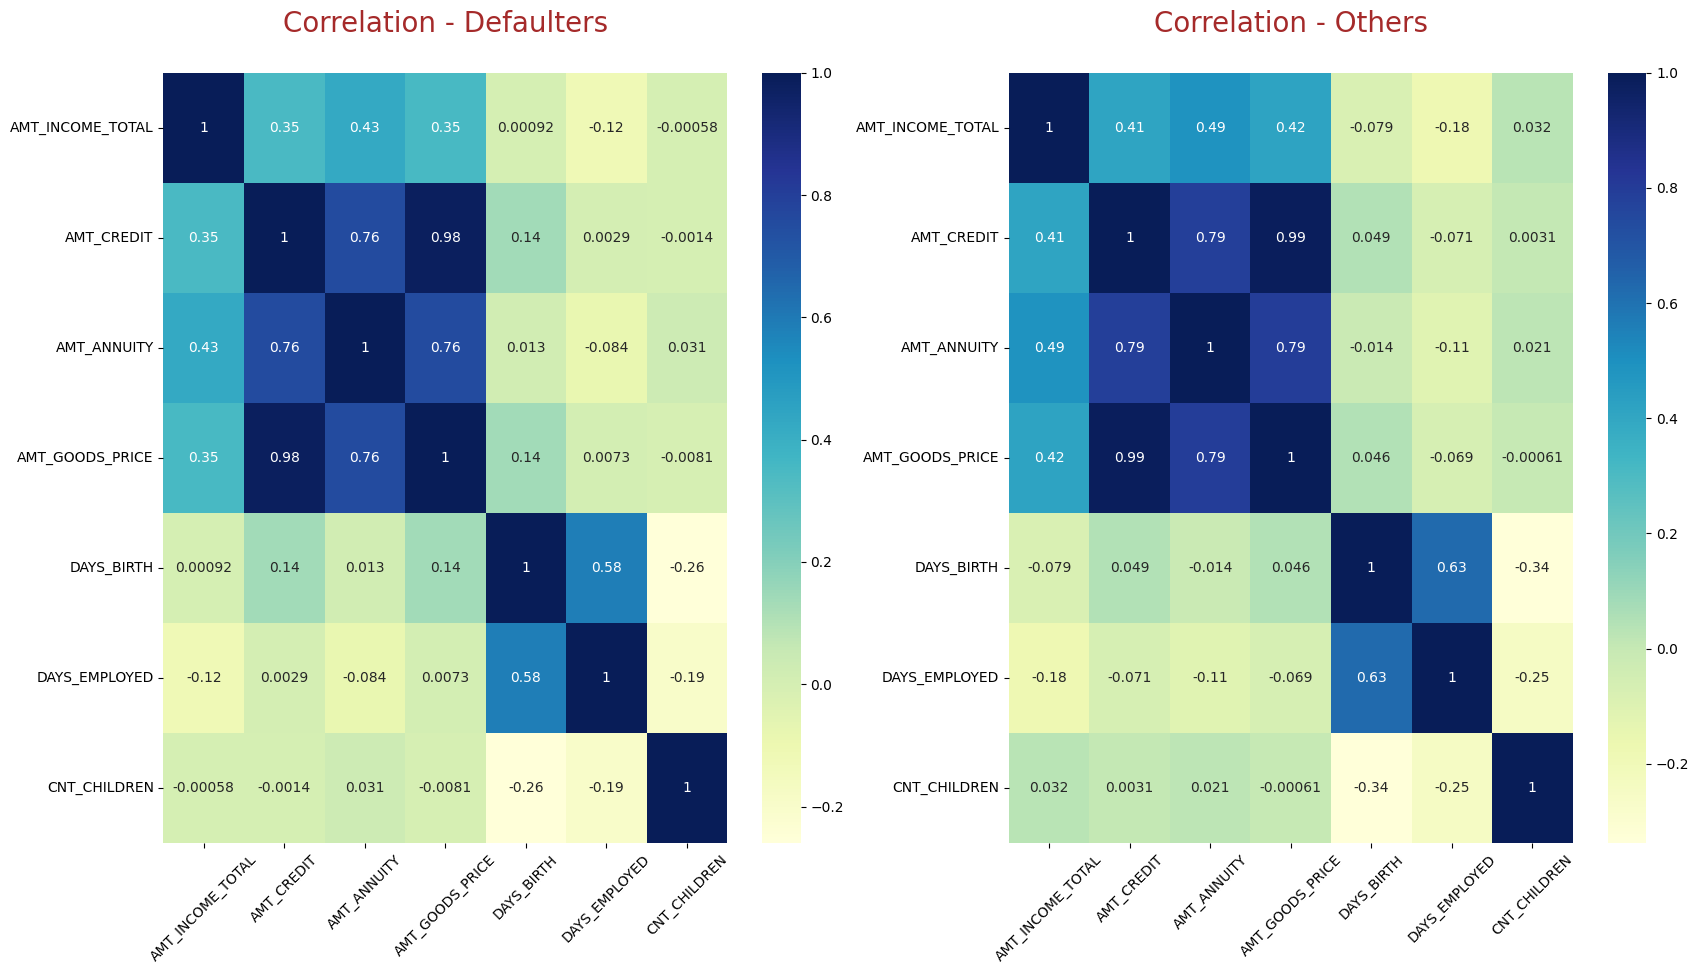

In [601]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
sns.heatmap(corr_df1, cmap="YlGnBu", annot = True)
plt.title('Correlation - Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.heatmap(corr_df0, cmap="YlGnBu", annot = True)
plt.title('Correlation - Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=45)

plt.show()

- AMT_CREDIT is strongly correlated to AMT_ANNUITY and AMT_GOODS_PRICE in both cases

#### 2.4.5	Bivariate Analysis

We will perform 3 types of bivariate analysis to understand the data better and draw some important insights.

- Categorical - Categorical Analysis
- Categorical - Continuous Analysis
- Continuous - Continuous Analysis

##### Categorical - Categorical Analysis

Columns considered -

- NAME_CONTRACT_TYPE - CODE_GENDER
- NAME_INCOME_TYPE - NAME_CONTRACT_TYPE
- INCOME_GROUP - CODE_GENDER
- CODE_GENDER - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - FLAG_OWN_REALTY
- NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

In [602]:
# Defining function for categorical - categorical variable plotting

def cat_cat_plot(var1, var2, label, legend):

    plt.figure(figsize=[20,5])

    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.countplot(application_df1[var1], hue=application_df1[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 45)
    plt.legend(title=legend, loc='upper right')

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.countplot(application_df0[var1], hue=application_df0[var2])
    plt.xlabel(label)
    plt.xticks(rotation = 45)
    plt.legend(title=legend, loc='upper right')

    plt.show()

In [603]:
 !pip install pandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def cat_cat_plot(var1, var2, label, legend):

# Assuming 'application_df1' and 'application_df0' are Pandas DataFrames in wide format
# We need to melt them into long format for the 'hue' parameter to work correctly.

# Melting application_df1
    application_df1_melted = pd.melt(application_df1, id_vars=[var1], value_vars=[var2], var_name='hue_variable', value_name='hue_value')

# Melting application_df0
    application_df0_melted = pd.melt(application_df0, id_vars=[var1], value_vars=[var2], var_name='hue_variable', value_name='hue_value')

    plt.figure(figsize=[20,5])

    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    # Use the melted DataFrame and specify the 'hue' column
    sns.countplot(x=var1, hue='hue_value', data=application_df1_melted)
    plt.xlabel(label)
    plt.xticks(rotation = 45)
    plt.legend(title=legend, loc='upper right')

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    # Use the melted DataFrame and specify the 'hue' column
    sns.countplot(x=var1, hue='hue_value', data=application_df0_melted)
    plt.xlabel(label)
    plt.xticks(rotation = 45)
    plt.legend(title=legend, loc='upper right')

    plt.show()



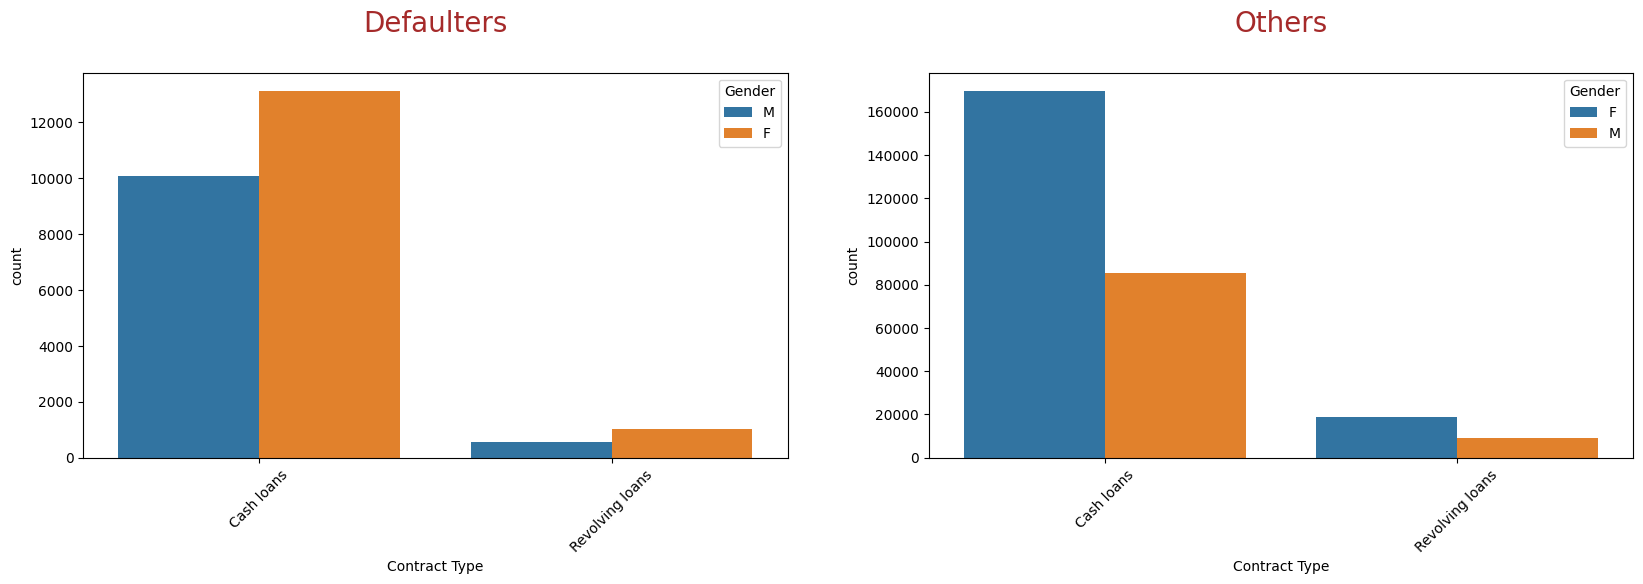

In [604]:
# NAME_CONTRACT_TYPE - CODE_GENDER

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'CODE_GENDER'
label = 'Contract Type'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)

- Most of the applications have applied for cash loans.
- Female applicants are more than males.


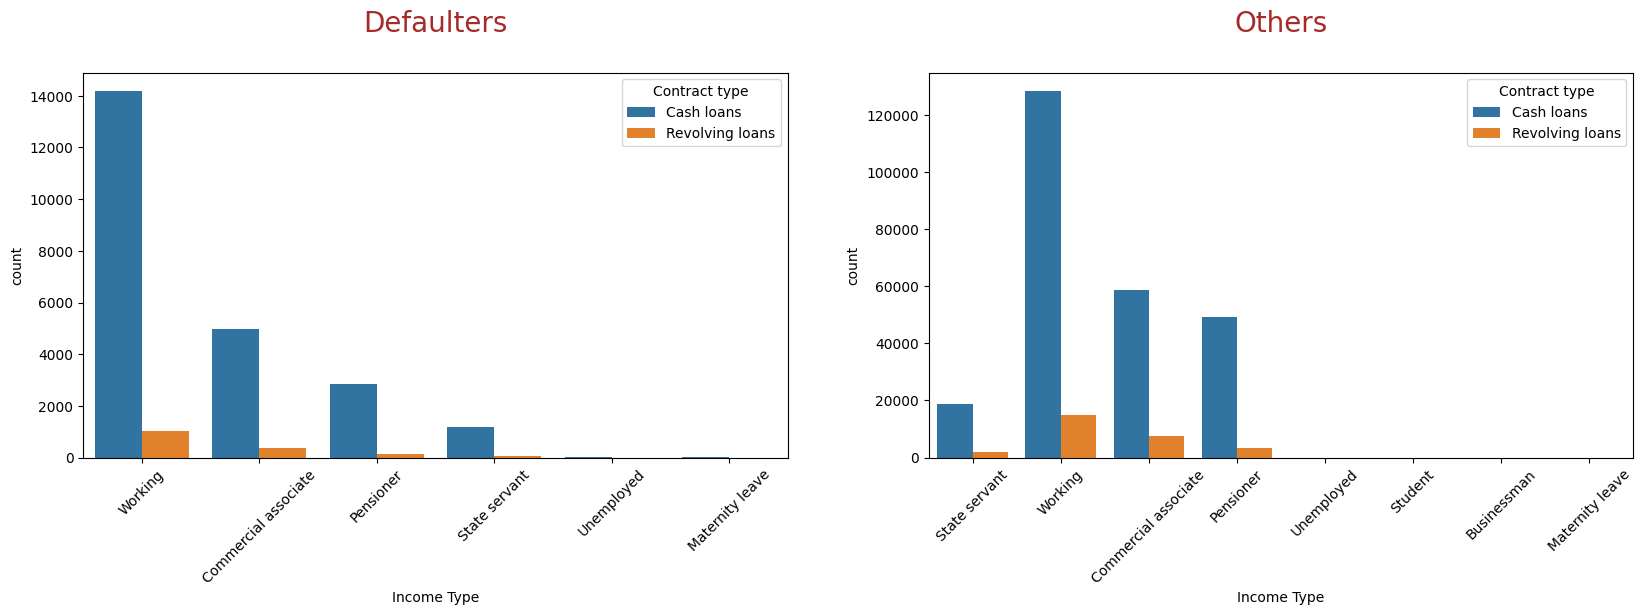

In [605]:
# NAME_INCOME_TYPE - NAME_CONTRACT_TYPE

var1 = 'NAME_INCOME_TYPE'
var2 = 'NAME_CONTRACT_TYPE'
label = 'Income Type'
legend = 'Contract type'

cat_cat_plot(var1, var2, label, legend)

- Across income types, cash loan seems to be the popular contract type.
- Most of the people who have taken loans are working class and they have taken cash loans mostly compared to revolving loans.
- People who have taken cash loans are likely to default as well

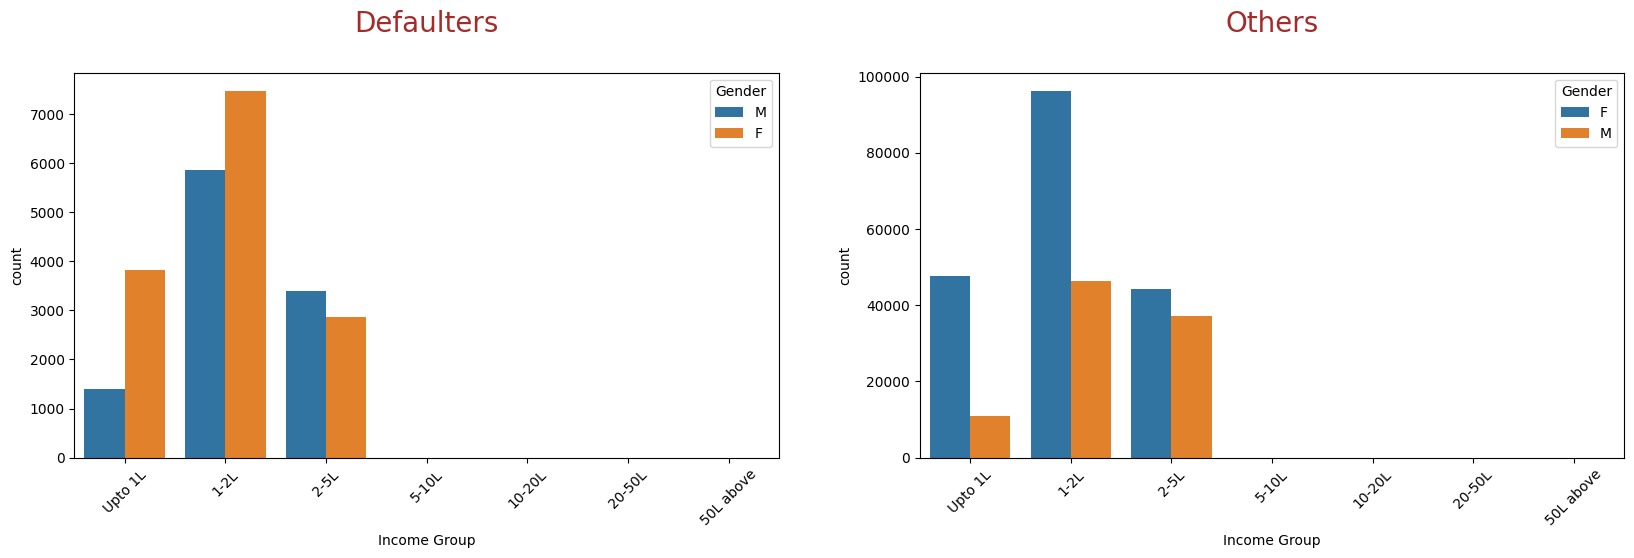

In [606]:
# INCOME_GROUP - CODE_GENDER

var1 = 'INCOME_GROUP'
var2 = 'CODE_GENDER'
label = 'Income Group'
legend = 'Gender'

cat_cat_plot(var1, var2, label, legend)

- Females have done timely repayment than that of males.

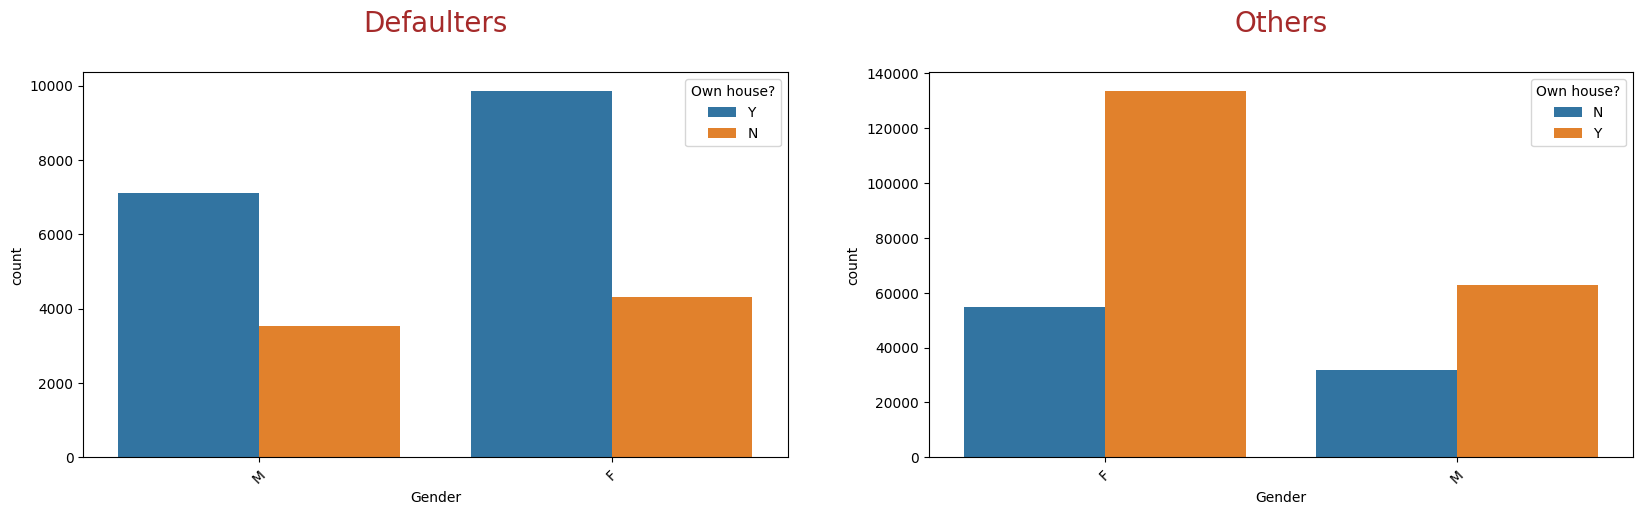

In [607]:
# CODE_GENDER - FLAG_OWN_REALTY

var1 = 'CODE_GENDER'
var2 = 'FLAG_OWN_REALTY'
label = 'Gender'
legend = 'Own house?'

cat_cat_plot(var1, var2, label, legend)

- Female borrowers are more likely to own flat/house.
- Since the female count is higher in both cases , we cannot be sure that they are likely to default.

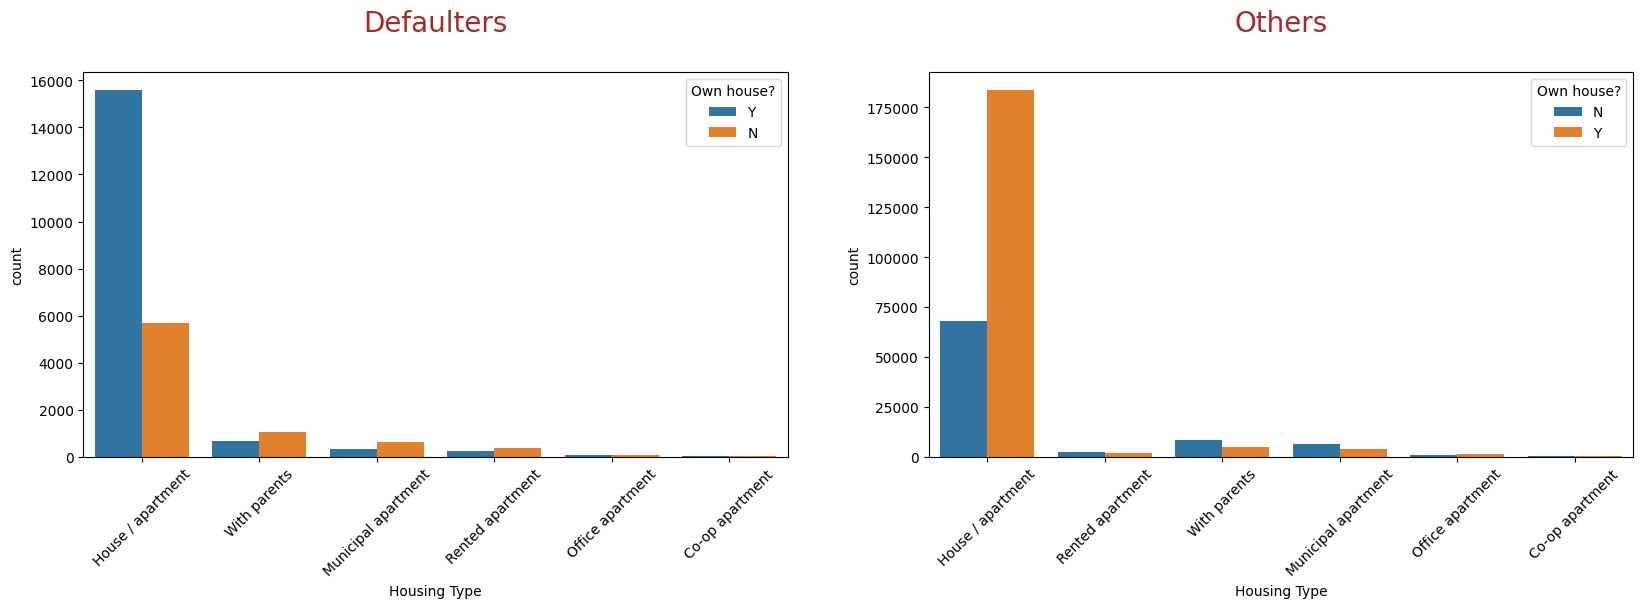

In [608]:
# NAME_HOUSING_TYPE - FLAG_OWN_REALTY

var1 = 'NAME_HOUSING_TYPE'
var2 = 'FLAG_OWN_REALTY'
label = 'Housing Type'
legend = 'Own house?'

cat_cat_plot(var1, var2, label, legend)

- People who own a house/flat and are staying in own property are likely to make repayments.


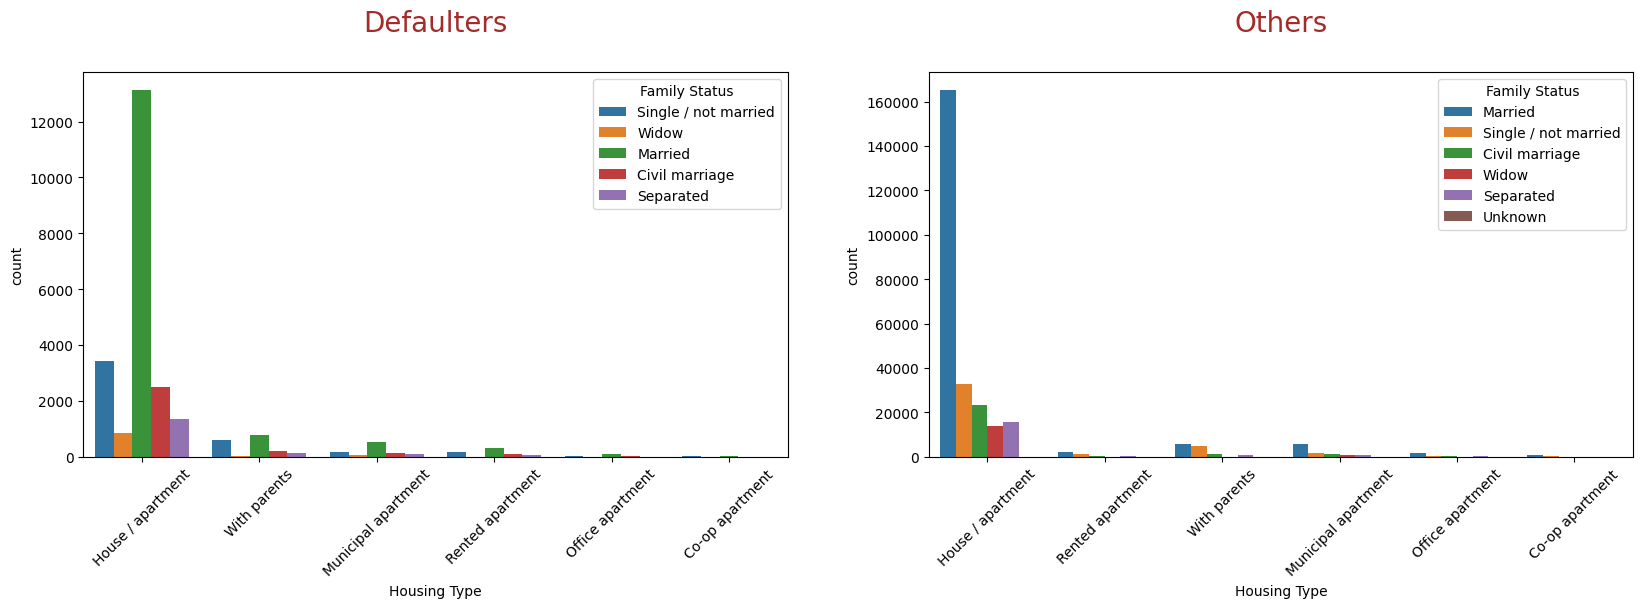

In [609]:
# NAME_HOUSING_TYPE - NAME_FAMILY_STATUS

var1 = 'NAME_HOUSING_TYPE'
var2 = 'NAME_FAMILY_STATUS'
label = 'Housing Type'
legend = 'Family Status'

cat_cat_plot(var1, var2, label, legend)

- Married loan applicants are mostly staying in house/apartment.
- Married people staying in house/apartments are the group with maximum number of loan applications.
- Single and civil marriage applicants are more likely to default.


##### Categorical - Continuous Analysis

Columns considered -

- NAME_CONTRACT_TYPE - AMT_CREDIT
- NAME_INCOME_TYPE - AMT_CREDIT
- NAME_EDUCATION_TYPE - AMT_ANNUITY
- NAME_HOUSING_TYPE - AMT_CREDIT
- OCCUPATION_TYPE - AMT_CREDIT

In [610]:
# Defining function for categorical - Continuous variable plotting

def cat_cont_plot(var1, var2, xlabel, ylabel):

    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.boxplot(x=var1,y=var2, data=application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.show()

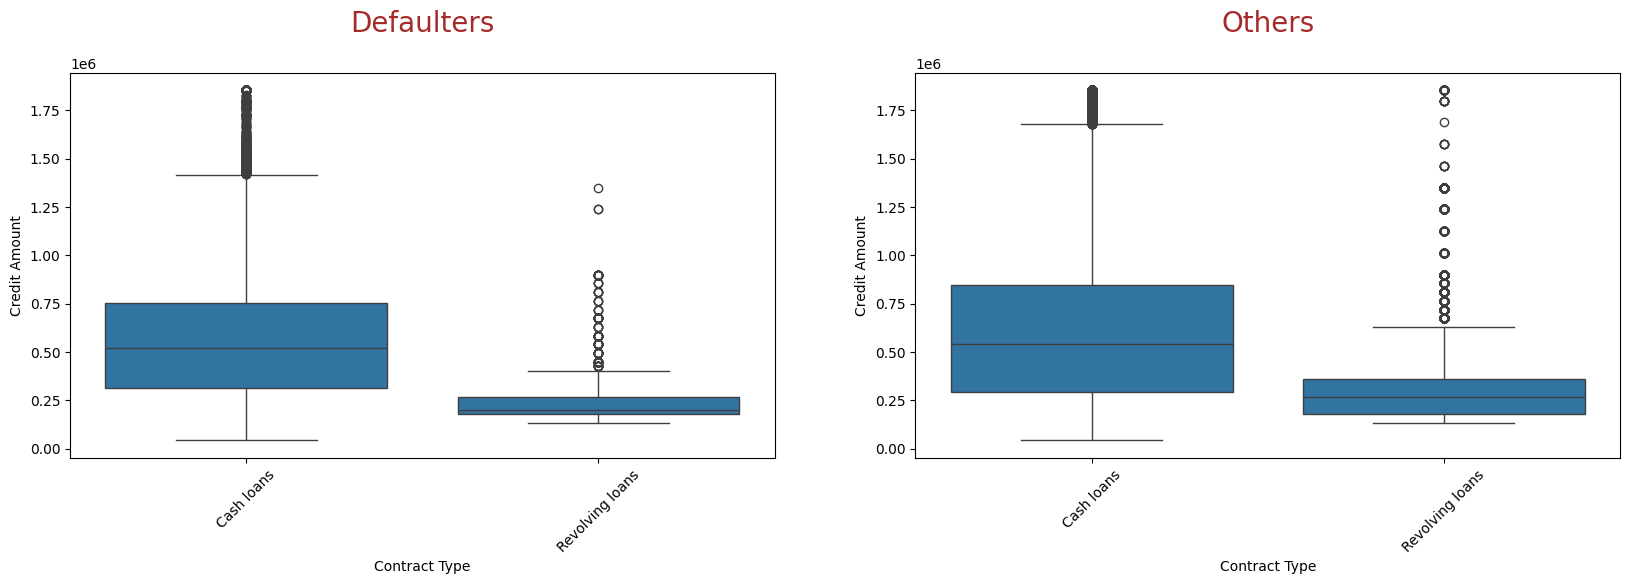

In [611]:
# NAME_CONTRACT_TYPE - AMT_CREDIT

var1 = 'NAME_CONTRACT_TYPE'
var2 = 'AMT_CREDIT'

xlabel = 'Contract Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan credit amount for cash loan is higher than that of revolving loans.
- Cash loan is favourite among all genders.

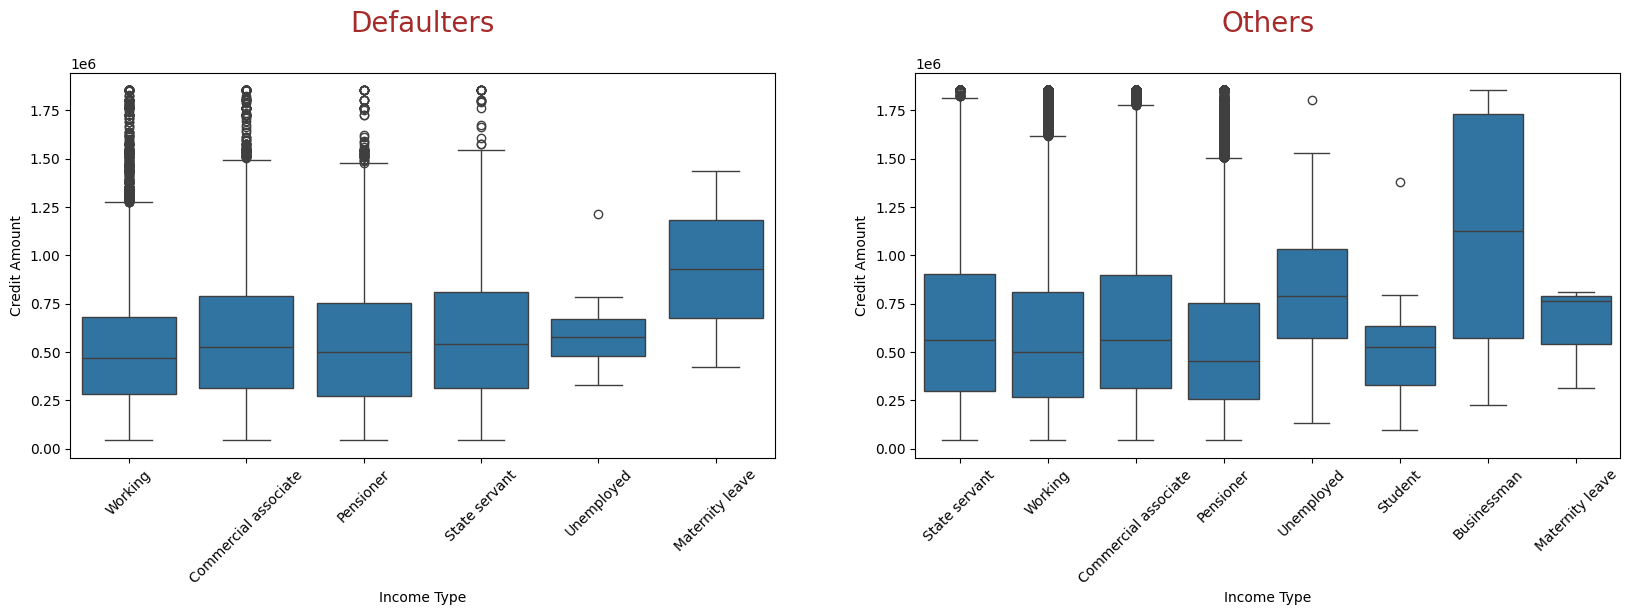

In [612]:
# NAME_INCOME_TYPE - AMT_CREDIT

var1 = 'NAME_INCOME_TYPE'
var2 = 'AMT_CREDIT'

xlabel = 'Income Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan amount taken by businessman is higher compared to the other income types.
- The median value of credit amount is some what similar for working, commercial associate, state servant and pensioner income type.
- People with maternity leave income type tend to default with higher credit amount.

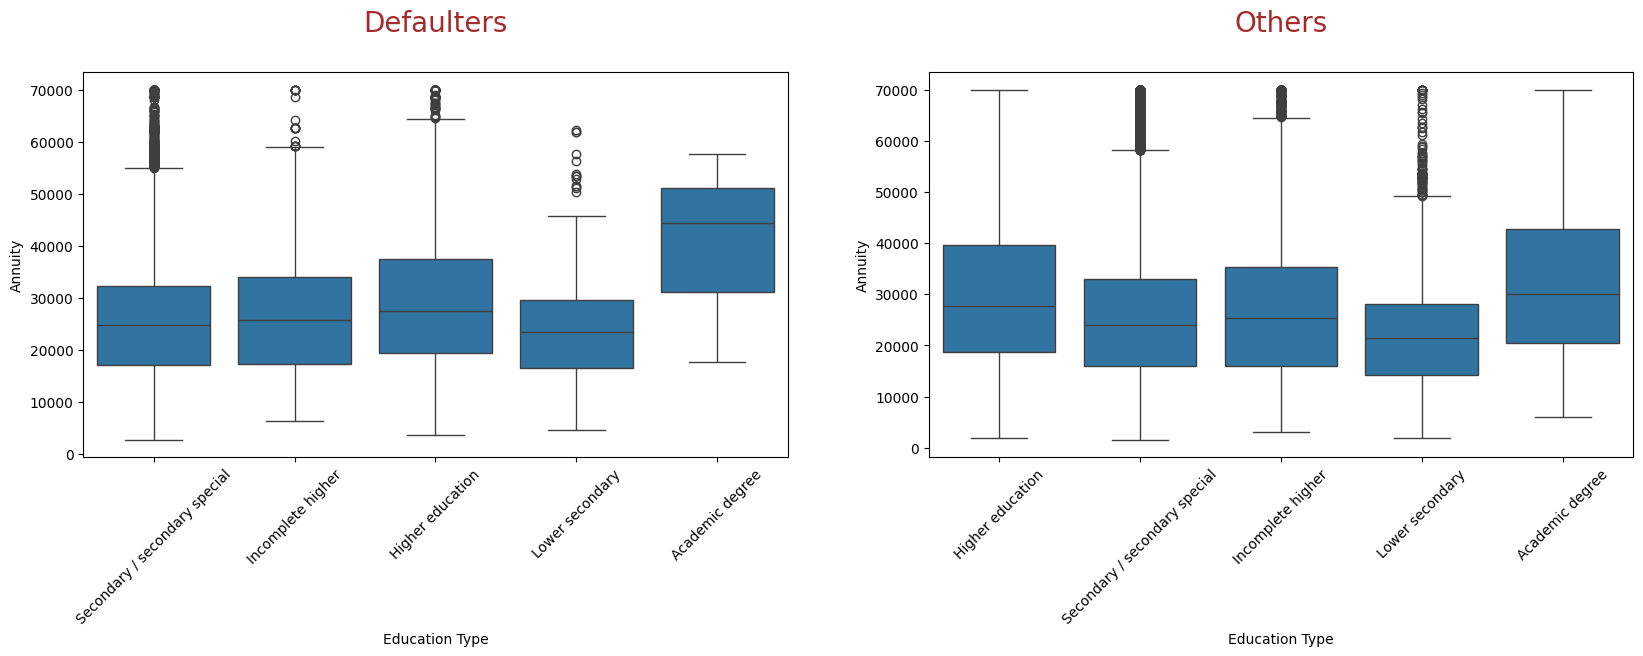

In [613]:
# NAME_EDUCATION_TYPE - AMT_ANNUITY

var1 = 'NAME_EDUCATION_TYPE'
var2 = 'AMT_ANNUITY'
xlabel = 'Education Type'
ylabel = 'Annuity'

cat_cont_plot(var1, var2, xlabel, ylabel)

- People having academic degree and higher education have more loan annuity amount compared to the other groups in both the default and non-default section.

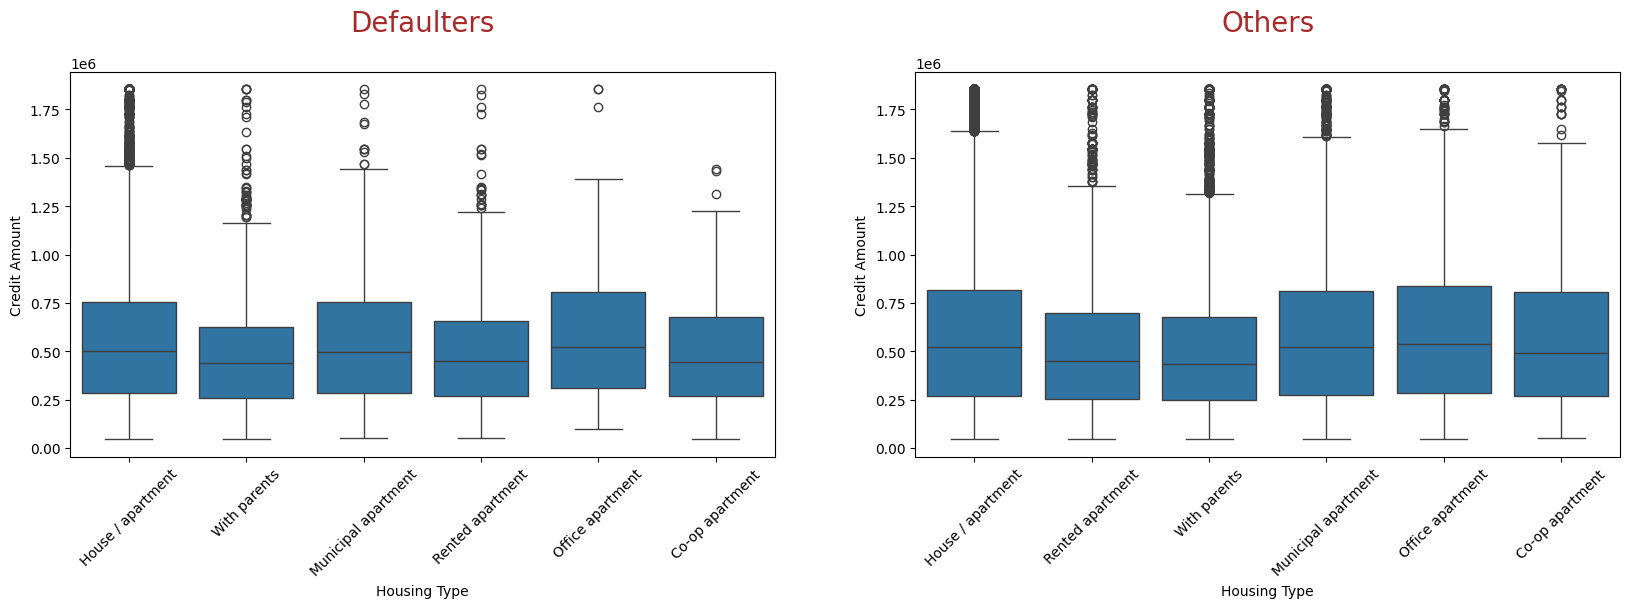

In [614]:
# NAME_HOUSING_TYPE - AMT_CREDIT

var1 = 'NAME_HOUSING_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Housing Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Loan credit amount is comparatively higher for people living in houses/appartments, municipal and office apartments.

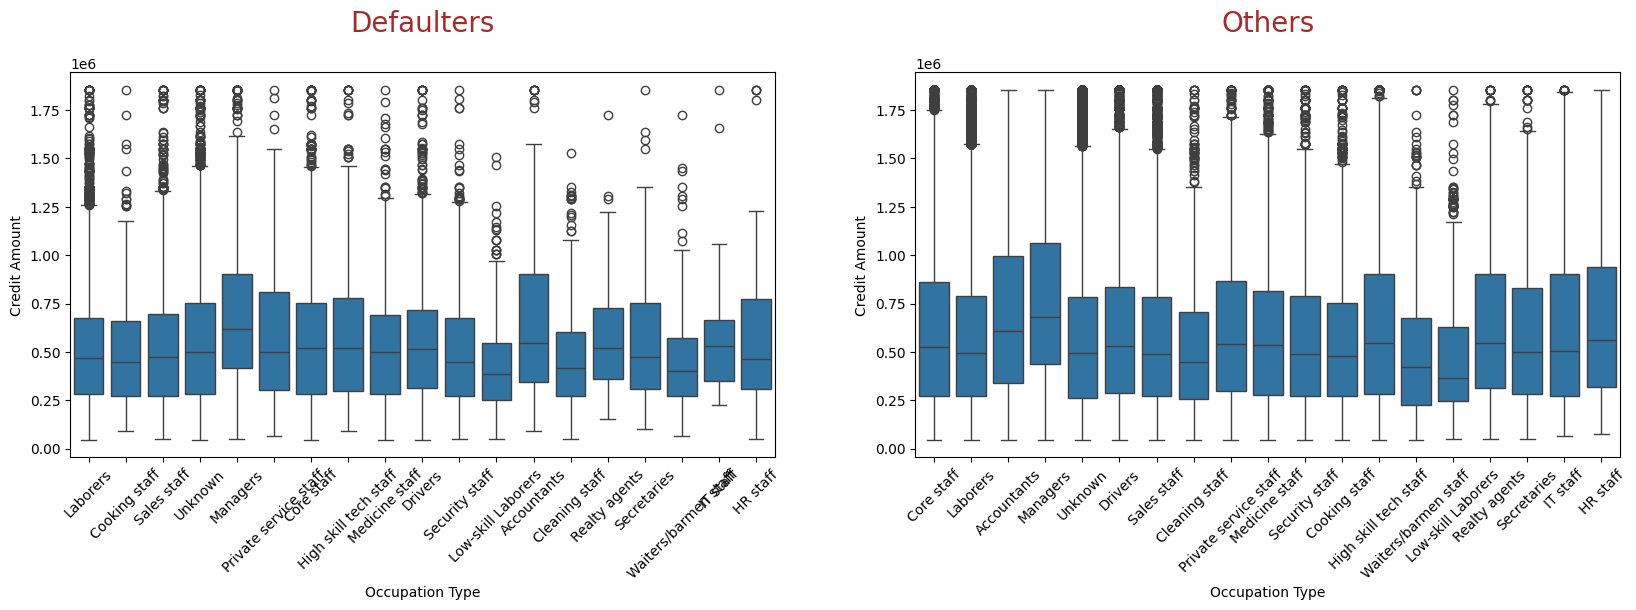

In [615]:
# OCCUPATION_TYPE - AMT_CREDIT

var1 = 'OCCUPATION_TYPE'
var2 = 'AMT_CREDIT'
xlabel = 'Occupation Type'
ylabel = 'Credit Amount'

cat_cont_plot(var1, var2, xlabel, ylabel)

- Managers and Accountants have comparatively higher credit amount.

##### Continuous - Continuous Analysis

Here we have considered the below continuous value columns for plotting the graphs -

- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- AMT_INCOME_TOTAL

In [616]:
# Defining function for Continuous - continuous plot

def cont_cont_plot(col1, col2, xlabel, ylabel):

    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    plt.title('Defaulters\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = application_df1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    plt.title('Others\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
    sns.scatterplot(x = col1, y = col2, data = application_df0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

    plt.show()

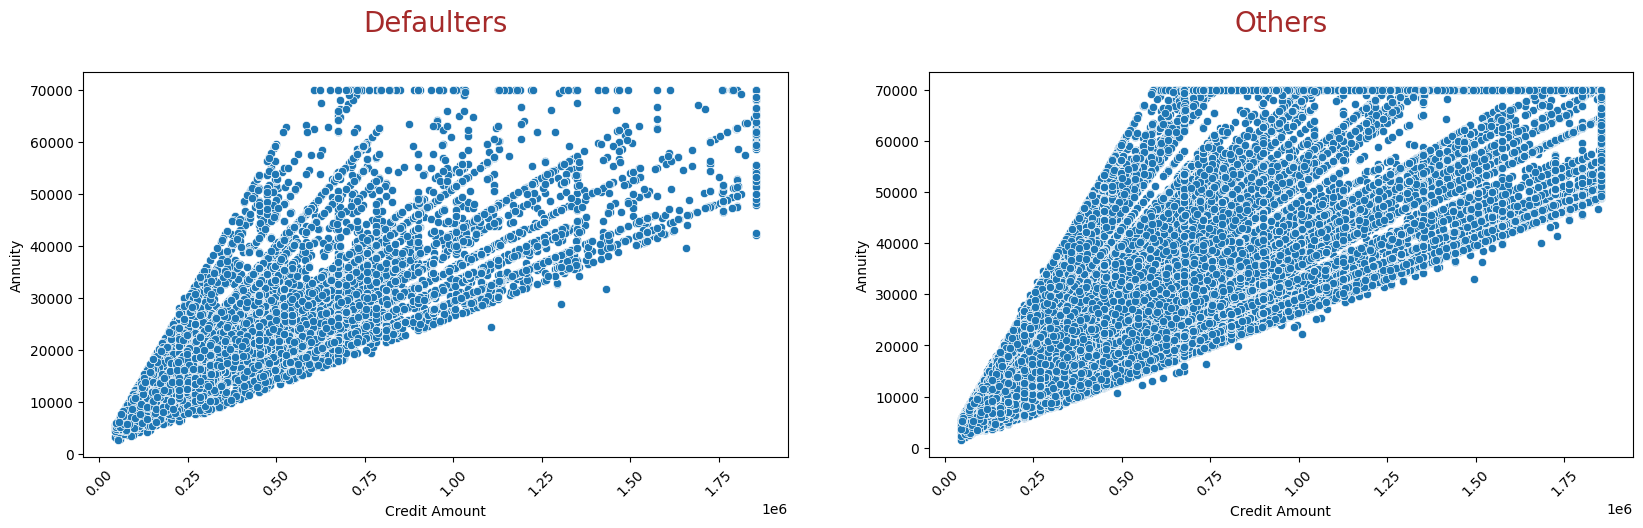

In [617]:
# AMT_CREDIT-AMT_ANNUITY

col1 = 'AMT_CREDIT'
col2 = 'AMT_ANNUITY'
xlabel = 'Credit Amount'
ylabel = 'Annuity'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT are AMT_ANNUITY seems to be correlated.

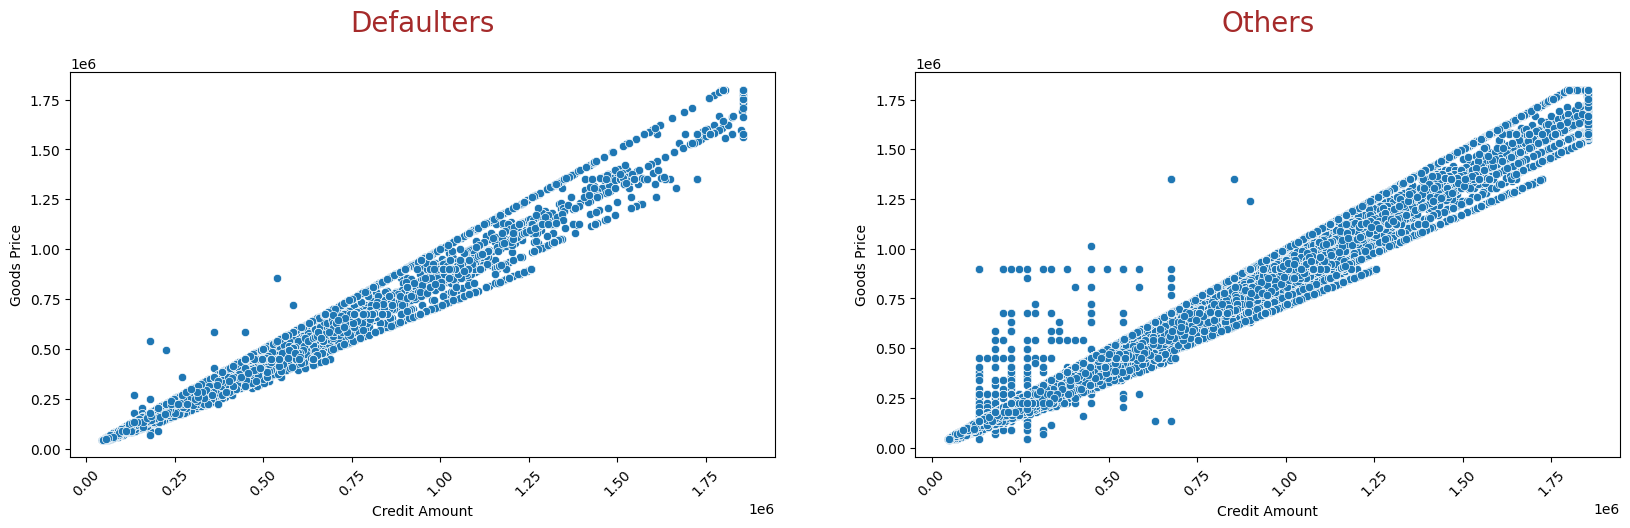

In [618]:
# AMT_CREDIT-AMT_GOODS_PRICE

col1 = 'AMT_CREDIT'
col2 = 'AMT_GOODS_PRICE'
xlabel = 'Credit Amount'
ylabel = 'Goods Price'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT are AMT_GOODS_PRICE seems to be correlated.

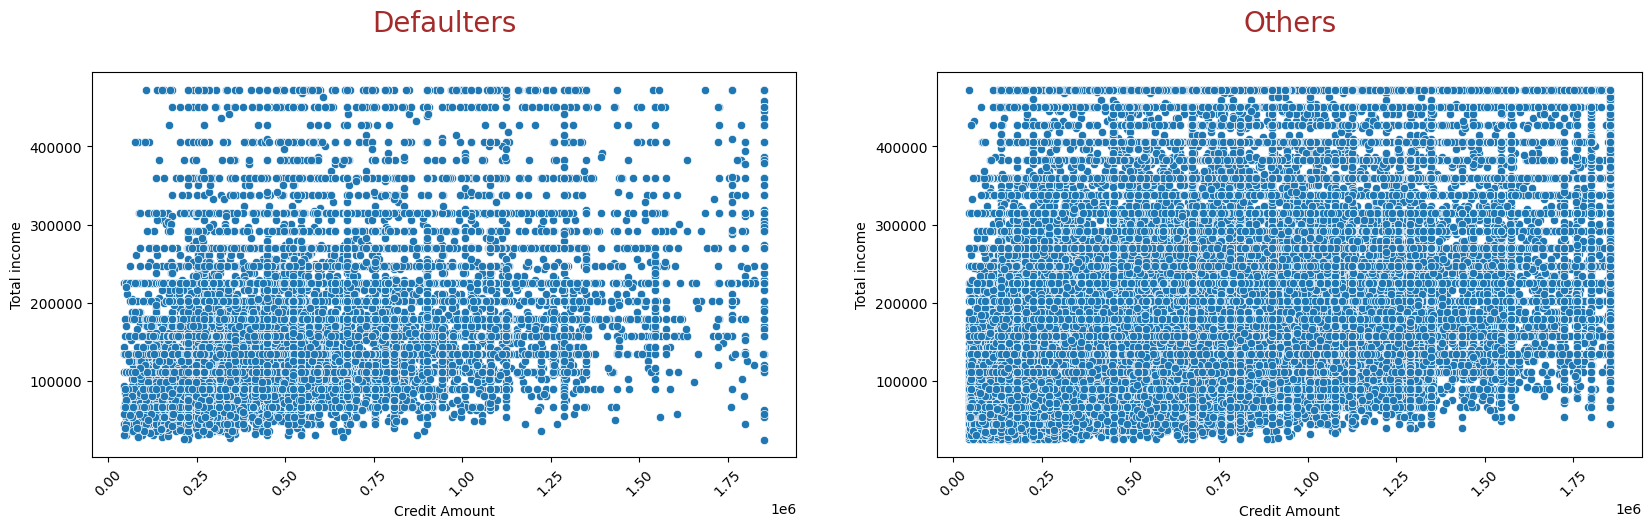

In [619]:
# AMT_CREDIT-AMT_INCOME_TOTAL

col1 = 'AMT_CREDIT'
col2 = 'AMT_INCOME_TOTAL'
xlabel = 'Credit Amount'
ylabel = 'Total income'

cont_cont_plot(col1, col2, xlabel, ylabel)

- AMT_CREDIT and AMT_INCOME_TOTAL does not seem to be correlated.

## 3. PREVIOUS LOAN APPLICATION DATA

We also have the previous application histories of the applicants. Let's explore that and see if we could find any trend.

### 3.1 Read and Inspect the Previous Data

In [620]:
# Read the previous data file

previous_df = pd.read_csv('previous_application.csv')
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [621]:
# Check the number of rows and columns in the dataframe
previous_df.shape

(1670214, 37)

In [622]:
# Check the column-wise info of the dataframe
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [623]:
# Check the summary for the numeric columns
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### 3.2 Data Cleaning & Imputation - Suggestions

In [624]:
# Check for missing values in percentage

round(100 * previous_df.isnull().mean(),2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [625]:
# Extract the column names with more than 40% data missing and their respective missing value percentage

missing40 = list(filter(lambda x: x[1] > 40 , round(100 * previous_df.isnull().sum() / len(previous_df.index),2).items()))

# Extract the column names from the above list

cols_to_drop = [i[0] for i in missing40]
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [626]:
# Remove the columns with more than 50% missing values

previous_df.drop(cols_to_drop, axis = 1, inplace = True)

# Check the shape

previous_df.shape

(1670214, 26)

In [627]:
# Check the missing values for remaining
round(100 * previous_df.isnull().mean(),2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
NAME_PAYMENT_TYPE               0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION                   0.00
dtype: float64

In [628]:
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### 3.3 Data Standardization

DAYS_DECISION,SELLERPLACE_AREA  - These columns seem to have some negative values. We must convert that to absolute value.

In [629]:
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.284699e+06             1.670214e+06   
mean   1.961140e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     3.153966e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     5.084100e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     2.340000e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.605408e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.456729e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.200000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [630]:
# Create a column list for DAYS columns

col_list = ['DAYS_DECISION','SELLERPLACE_AREA']

# Replace the values with their respective absolute values
for col in col_list:
    previous_df[col] = abs(previous_df[col])

# Verify the changes
previous_df[['DAYS_DECISION','SELLERPLACE_AREA']].describe()

DAYS_DECISION  SELLERPLACE_AREA
count   1.670214e+06      1.670214e+06
mean    8.806797e+02      3.148644e+02
std     7.790997e+02      7.127403e+03
min     1.000000e+00      0.000000e+00
25%     2.800000e+02      1.000000e+00
50%     5.810000e+02      3.000000e+00
75%     1.300000e+03      8.200000e+01
max     2.922000e+03      4.000000e+06

### 3.4 Outlier Analysis

- For the columns AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT , let's plot outliers for better understanding.

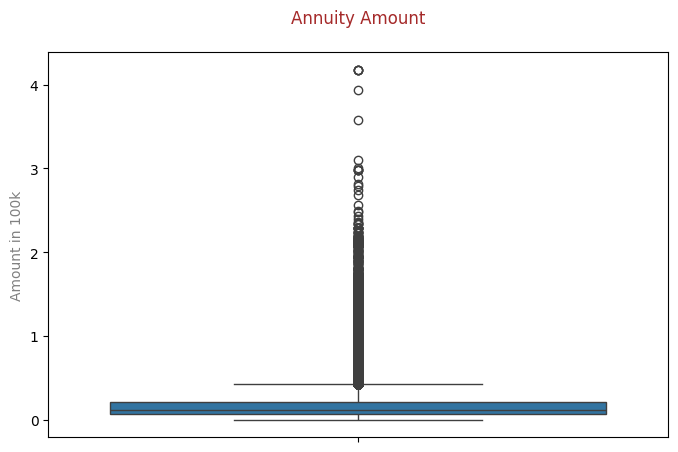

In [631]:
# Box plot AMT_ANNUITY

var = previous_df['AMT_ANNUITY']/100000
title = 'Annuity Amount\n'
label = 'Amount in 100k'

outlier_plot(var,title,label)

- Annuity seems to have some higher data points.

In [632]:
# Check Summary

previous_df['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [633]:
# Check the quantiles

previous_df['AMT_ANNUITY'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

- The outliers can be capped at 0.99

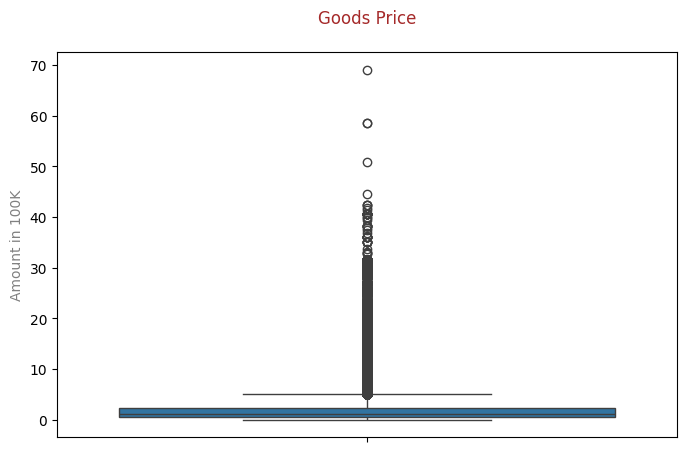

In [634]:
# Box plot AMT_GOODS_PRICE

var = previous_df['AMT_GOODS_PRICE']/100000
title = 'Goods Price\n'
label = 'Amount in 100K'

outlier_plot(var,title,label)

In [635]:
# Check summary

previous_df['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [636]:
# Check the quantiles

previous_df['AMT_GOODS_PRICE'].quantile([0.5,0.7,0.90,0.95,0.99])

0.50     112320.0
0.70     211500.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
Name: AMT_GOODS_PRICE, dtype: float64

- There are certain highly priced goods after 0.95 quantile. Here we can set a cap value to ignore very high goods price.

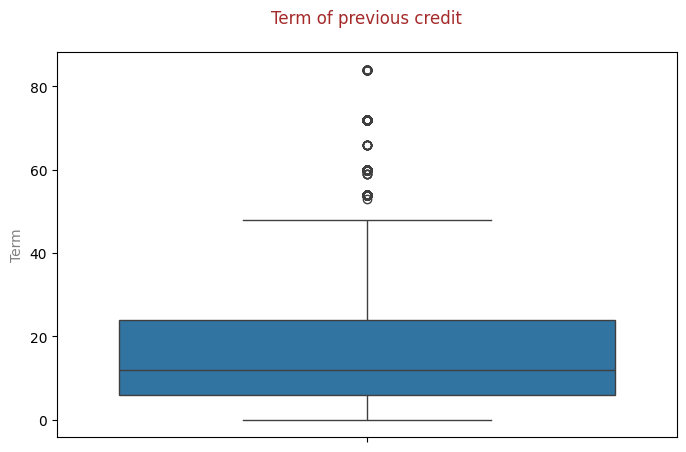

In [637]:
# Box plot CNT_PAYMENT

var = previous_df['CNT_PAYMENT']
title = 'Term of previous credit\n'
label = 'Term'

outlier_plot(var,title,label)

In [638]:
# Check summary

previous_df['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

- Missing values can be replaced with median and then we can change the data type to int.

### 3.5 Feature Selection Chi2-Categorical Variables

In [639]:

Categorical_cols = [col for col in previous_df.columns if not
                    (pd.api.types.is_numeric_dtype(previous_df[col]))]


previous_df_testchi=previous_df[Categorical_cols]
#previous_df_testchi['NAME_CONTRACT_STATUS'] = previous_df_testchi['NAME_CONTRACT_STATUS'].astype(bool)

previous_df_testchi.info()
Categorical_cols = [col for col in previous_df_testchi.columns if not
 (pd.api.types.is_numeric_dtype(previous_df_testchi[col]))]

from scipy.stats import chi2_contingency
import pandas as pd
chi2_results = []

# Calculate chi-square for each pair of categorical features
previous_df_testchi.replace('Unknown', pd.NA, inplace=True)


def get_chi2_results(df, categorical_features):
  """
  Calculates chi-squared statistics and p-values for categorical features in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      categorical_features (list): A list of column names representing categorical features.

  Returns:
      pandas.DataFrame: A DataFrame containing chi2 values and p-values for each feature pair.
"""
  chi2_results = []
  for feature in categorical_features:
    if feature != 'NAME_CONTRACT_STATUS':
      contingency_table = pd.crosstab(df[feature], df['NAME_CONTRACT_STATUS'])
      chi2_stat, pval,_, _ = chi2_contingency(contingency_table)
      chi2_results.append({
            "feature1": feature,
            "feature2": 'NAME_CONTRACT_STATUS',
            "chi2": chi2_stat,
            "pval": pval
        })
  return pd.DataFrame(chi2_results)


chi2_df = get_chi2_results(previous_df_testchi.copy(), Categorical_cols)
chi2_df_sorted = chi2_df.sort_values('pval')

print(chi2_df_sorted)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   NAME_CONTRACT_TYPE           1670214 non-null  object
 1   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object
 2   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object
 3   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object
 4   NAME_CONTRACT_STATUS         1670214 non-null  object
 5   NAME_PAYMENT_TYPE            1670214 non-null  object
 6   CODE_REJECT_REASON           1670214 non-null  object
 7   NAME_CLIENT_TYPE             1670214 non-null  object
 8   NAME_GOODS_CATEGORY          1670214 non-null  object
 9   NAME_PORTFOLIO               1670214 non-null  object
 10  NAME_PRODUCT_TYPE            1670214 non-null  object
 11  CHANNEL_TYPE                 1670214 non-null  object
 12  NAME_SELLER_INDUSTRY         1670214 non-null  object
 1

All the categorial variables are significant, as p val is less than 0.05

## 4 MERGING DATA SETS

Merge the application data frame and previous application data frame

### 4.1 Merging the data sets

In [640]:
# Merge both application_df and previous_df

finaldf = pd.merge(application_df, previous_df, on='SK_ID_CURR', how = 'inner')

# verify

finaldf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002    True           Cash loans           M            N   
1      100003   False           Cash loans           F            N   
2      100003   False           Cash loans           F            N   
3      100003   False           Cash loans           F            N   
4      100004   False      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637               3648   
1                    0.003541       16765           1188               1186   
2                    0.003541       16765           1188               1186   
3                    0.003541       16765           1188               1186   
4                    0.010032       19046            225               4260   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0      Core staff                2   
3                 1           1           0      Core staff                2   
4                 1           1           0        Laborers                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                         11                           0   
3                         11                           0   
4                          9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0     

In [641]:
# Check the column info

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 91 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  bool    
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413646 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [642]:
# Rename the duplicated columns

finaldf = finaldf.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV',
                         'NAME_TYPE_SUITE_x':'NAME_TYPE_SUITE_CURR',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [643]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 91 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  bool    
 2   NAME_CONTRACT_TYPE_CURR      1413701 non-null  object  
 3   CODE_GENDER                  1413646 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_CURR              1413701 non-null  float64 
 9   AMT_ANNUITY_CURR             1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR         1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1410175 non-null  category
 12  NAME_INCOME_TYPE            

In [653]:
# Remove unwanted columns

finaldf.drop(['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
              'LIVE_CITY_NOT_WORK_CITY',
              'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
             'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
              'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
               'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
              'FLAG_PHONE','FLAG_EMAIL', 'EXT_SOURCE_2',
              'EXT_SOURCE_3',  'FLAG_LAST_APPL_PER_CONTRACT',
              'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y'],axis=1,inplace=True)

In [654]:
#Verify

finaldf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 49 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   SK_ID_CURR                1413701 non-null  int64   
 1   TARGET                    1413701 non-null  bool    
 2   NAME_CONTRACT_TYPE_CURR   1413701 non-null  object  
 3   CODE_GENDER               1413646 non-null  object  
 4   FLAG_OWN_CAR              1413701 non-null  object  
 5   FLAG_OWN_REALTY           1413701 non-null  category
 6   CNT_CHILDREN              1413701 non-null  int64   
 7   AMT_INCOME_TOTAL          1413701 non-null  float64 
 8   AMT_CREDIT_CURR           1413701 non-null  float64 
 9   AMT_ANNUITY_CURR          1413608 non-null  float64 
 10  AMT_GOODS_PRICE_CURR      1412493 non-null  float64 
 11  NAME_TYPE_SUITE           1410175 non-null  category
 12  NAME_INCOME_TYPE          1413701 non-null  object  
 13  NAME_EDUCATI

### 4.2 Imbalance Percentage

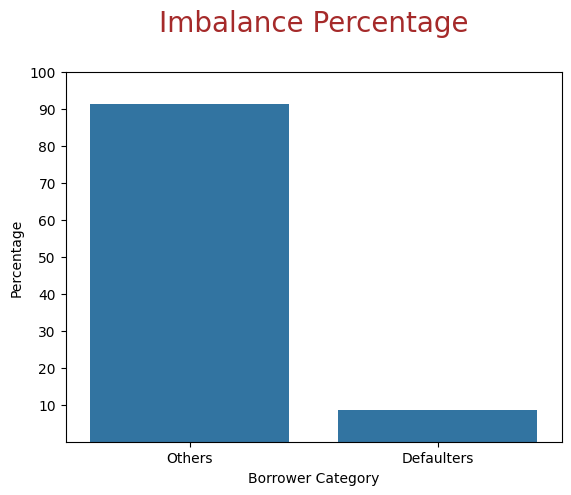

In [655]:
# Plotting imbalance percentage

#Extracting the imbalance percentage
Repayment_Status = finaldf['TARGET'].value_counts(normalize=True)*100

# Defining the y ticks
axes= plt.axes()
axes.set_ylim([0,100])
axes.set_yticks([10,20,30,40,50,60,70,80,90,100])

# Plotting barplot
# The original code passed x and y as positional arguments.
# sns.barplot() expects a single DataFrame with 'x' and 'y' columns specified.
sns.barplot(x=x, y=Repayment_Status)

# Adding plot title, and x & y labels
plt.title('Imbalance Percentage\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Borrower Category")
plt.ylabel("Percentage")

# Displaying the plot
plt.show()

The combined data also seems imbalanced.

### 4.3 Univariate Analysis

Categorical Analysis

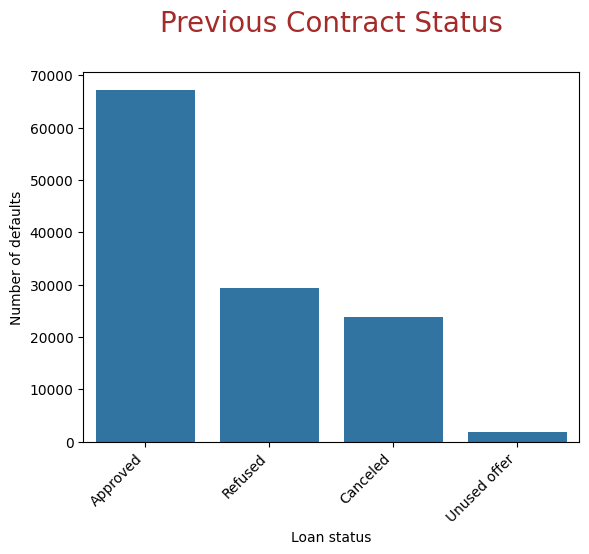

In [657]:
#NAME_CONTRACT_STATUS

tempdf = finaldf[['TARGET','NAME_CONTRACT_STATUS']].groupby(['NAME_CONTRACT_STATUS'], as_index=False).sum()
tempdf.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_STATUS', y = 'TARGET', data = tempdf)
plt.title('Previous Contract Status\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'} )
plt.xlabel('Loan status')
plt.ylabel('Number of defaults')
plt.xticks(rotation=45, ha='right')

plt.show()

- High number of defaulters have their loans approved in the past.
- Number of defaulters who have not used the offer is the minimum.

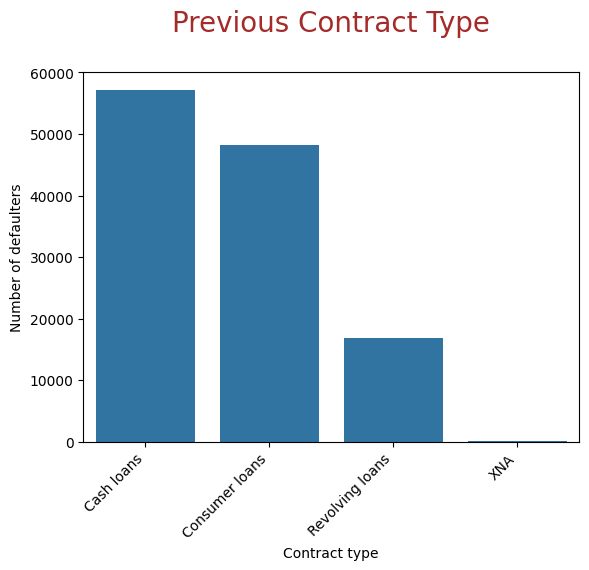

In [658]:
# NAME_CONTRACT_TYPE_PREV

tempdf = finaldf[['TARGET','NAME_CONTRACT_TYPE_PREV']].groupby(['NAME_CONTRACT_TYPE_PREV'], as_index=False).sum()
tempdf.sort_values(by='TARGET', ascending=False, inplace=True)

sns.barplot(x='NAME_CONTRACT_TYPE_PREV', y = 'TARGET', data = tempdf)
plt.title('Previous Contract Type\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Contract type')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=45, ha='right')

plt.show()

- High number of defaults in case of cash loans followed by consumer loans in previous applications data.
- There are some missing contract types in the data.

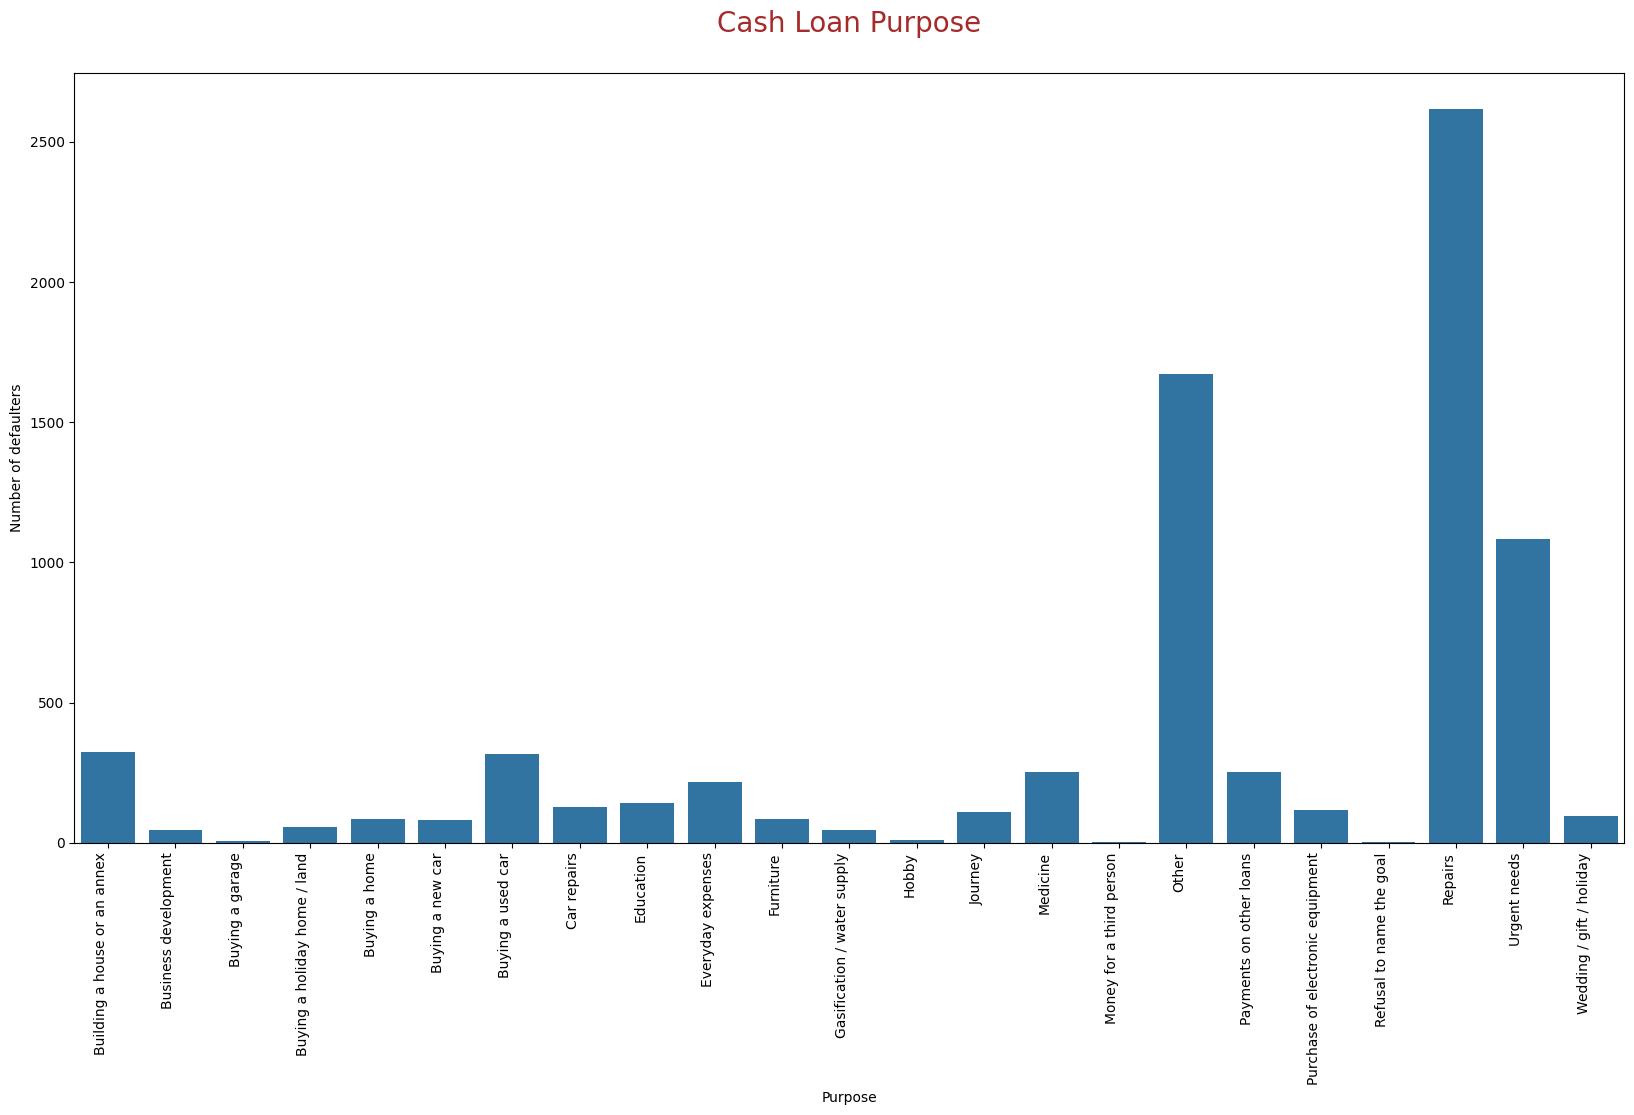

In [659]:
# NAME_CASH_LOAN_PURPOSE

tempdf = finaldf[finaldf['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
tempdf = tempdf[tempdf['NAME_CASH_LOAN_PURPOSE'] != 'XNA']
tempdf = tempdf[['TARGET','NAME_CASH_LOAN_PURPOSE']].groupby(['NAME_CASH_LOAN_PURPOSE'], as_index=False).sum()

plt.figure(figsize=[20,10])
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y = 'TARGET', data = tempdf)
plt.title('Cash Loan Purpose\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Purpose')
plt.ylabel('Number of defaulters')
plt.xticks(rotation=90, ha='right')

plt.show()

- Loan applications with purpose such as Repairs, Urgent needs and Others etc. are more likely to default.
- Purpose such as buying a garage, home and hobby etc, have no difficulty in repayment.

Numerical Analysis

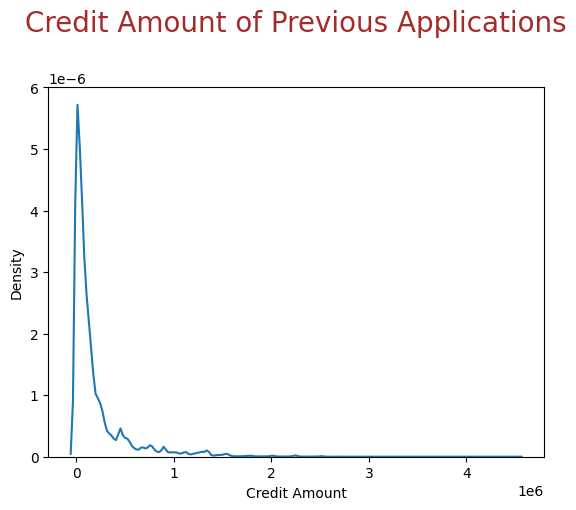

In [660]:
# Numerical data analysis

sns.distplot(finaldf['AMT_CREDIT_PREV'] , hist=False)
plt.title('Credit Amount of Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Credit Amount')
plt.show()

- In past, most of the loans had credit amount in the lower range i.e. below 100K.

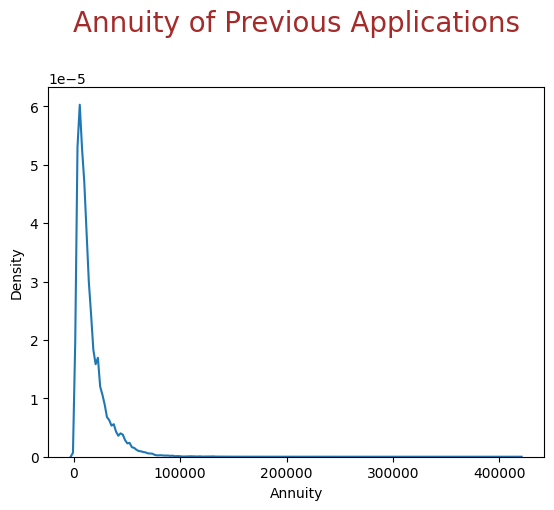

In [661]:
# Numerical data analysis

sns.distplot(finaldf['AMT_ANNUITY_PREV'] , hist=False)
plt.title('Annuity of Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('Annuity')
plt.show()

- Previous applications annuity was also mostly below 100K.

### 4.3 Correlation

In [662]:
# Check the correlation

corrdf = finaldf[['AMT_ANNUITY_PREV','AMT_APPLICATION','AMT_CREDIT_PREV','AMT_GOODS_PRICE_PREV']].corr()
corrdf

AMT_ANNUITY_PREV  AMT_APPLICATION  AMT_CREDIT_PREV  \
AMT_ANNUITY_PREV              1.000000         0.809972         0.817977   
AMT_APPLICATION               0.809972         1.000000         0.975683   
AMT_CREDIT_PREV               0.817977         0.975683         1.000000   
AMT_GOODS_PRICE_PREV          0.822204         0.999871         0.993201   

                      AMT_GOODS_PRICE_PREV  
AMT_ANNUITY_PREV                  0.822204  
AMT_APPLICATION                   0.999871  
AMT_CREDIT_PREV                   0.993201  
AMT_GOODS_PRICE_PREV              1.000000

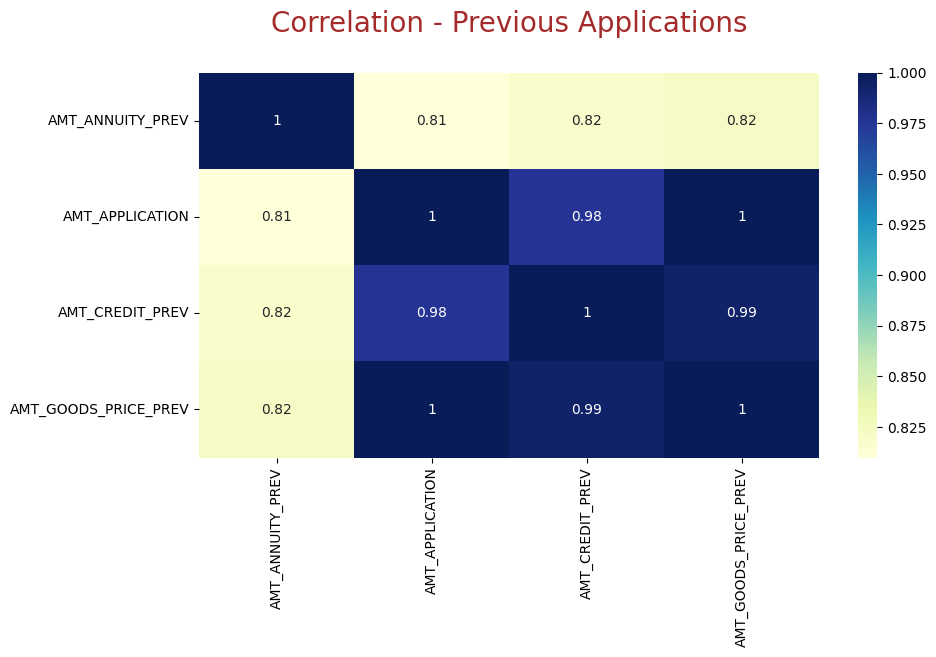

In [663]:
# Plot correlation heatmap for numerical variables

plt.figure(figsize=[10,5])

sns.heatmap(corrdf, cmap="YlGnBu", annot = True)
plt.title('Correlation - Previous Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

- From the above plot we can see that AMT_CREDIT_PREV is highly correlated to AMT_APPLICATION and AMT_GOODS_PRICE_PREV

### 4.2 Bivariate Analysis

##### Categorical - Categorical

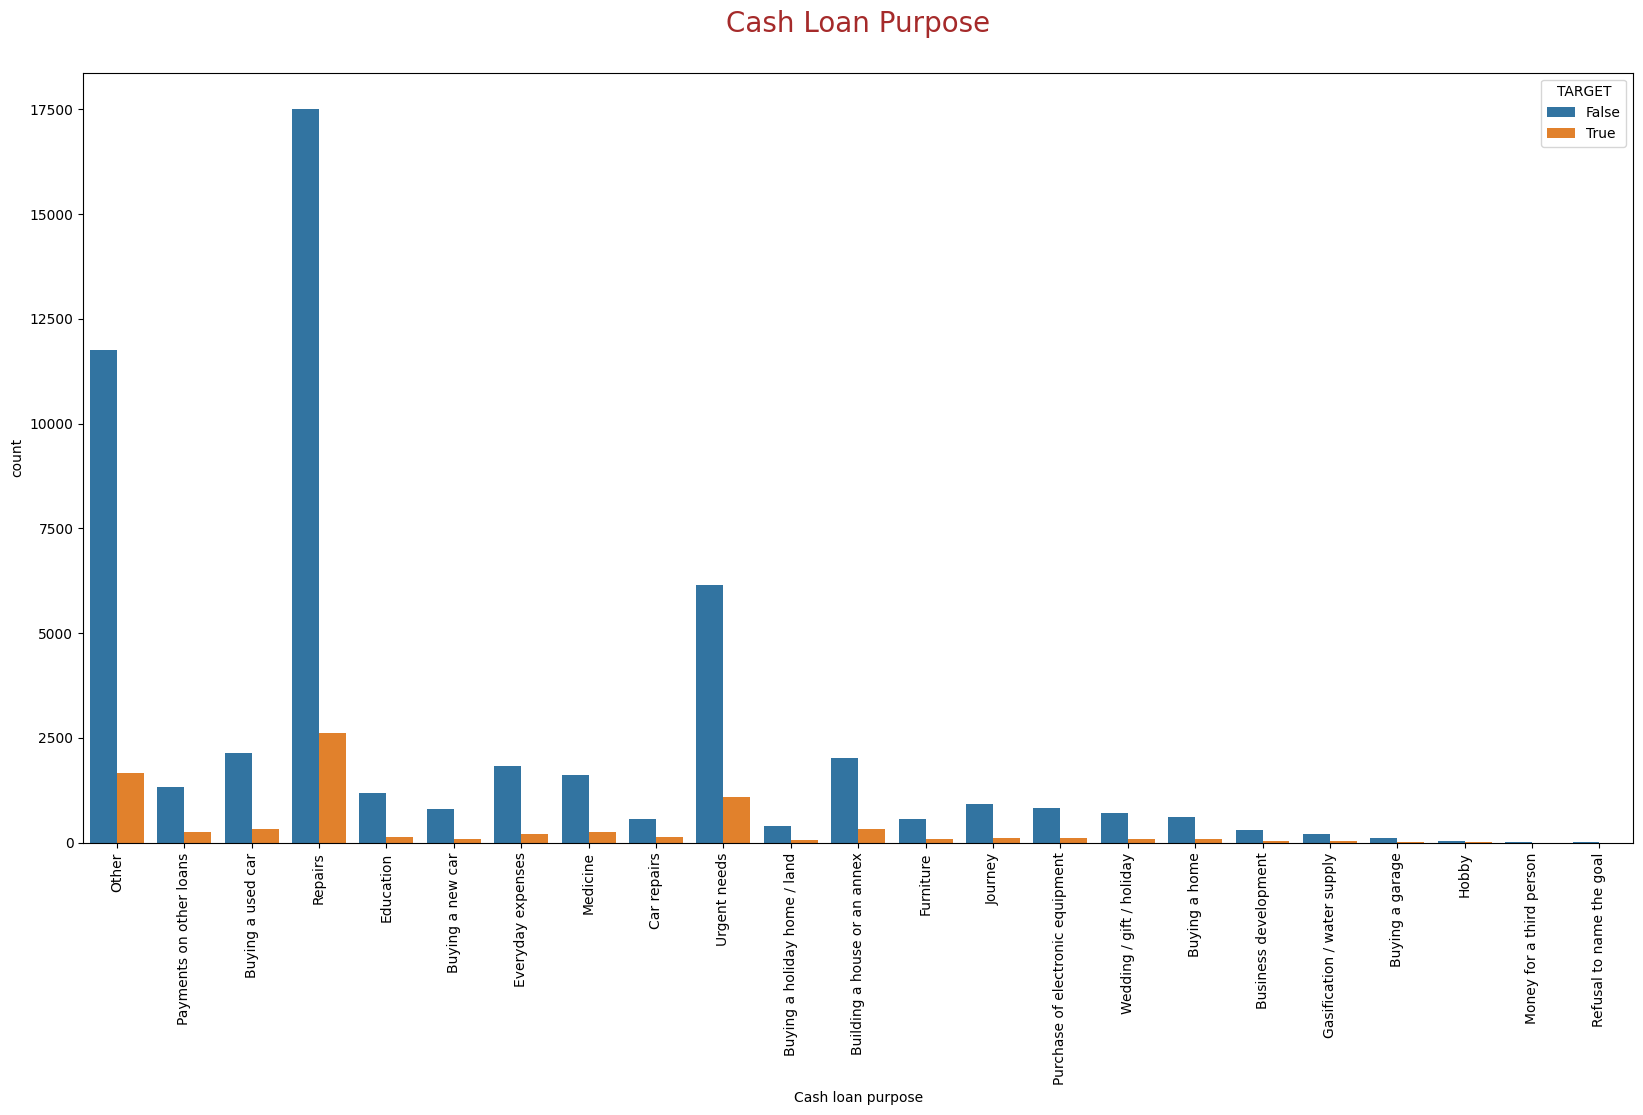

In [664]:
# NAME_CASH_LOAN_PURPOSE - OCCUPATION_TYPE

tempdf = finaldf[finaldf['NAME_CASH_LOAN_PURPOSE'] != 'XAP']
tempdf = tempdf[tempdf['NAME_CASH_LOAN_PURPOSE'] != 'XNA']

# Melt the DataFrame to convert it to long-form
tempdf_melted = pd.melt(tempdf, id_vars=['TARGET'], value_vars=['NAME_CASH_LOAN_PURPOSE'])

plt.figure(figsize=[20,10])
plt.title('Cash Loan Purpose\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
# Use the melted DataFrame and specify 'value' as the x-axis and 'variable' as the hue
sns.countplot(x='value', hue='TARGET', data=tempdf_melted)
plt.xlabel('Cash loan purpose')
plt.xticks(rotation = 90)
plt.show()

- Loans taken for Repairs purpose are higher compared to others.
- Loan default chances is also higher for loans taken for repair purpose.

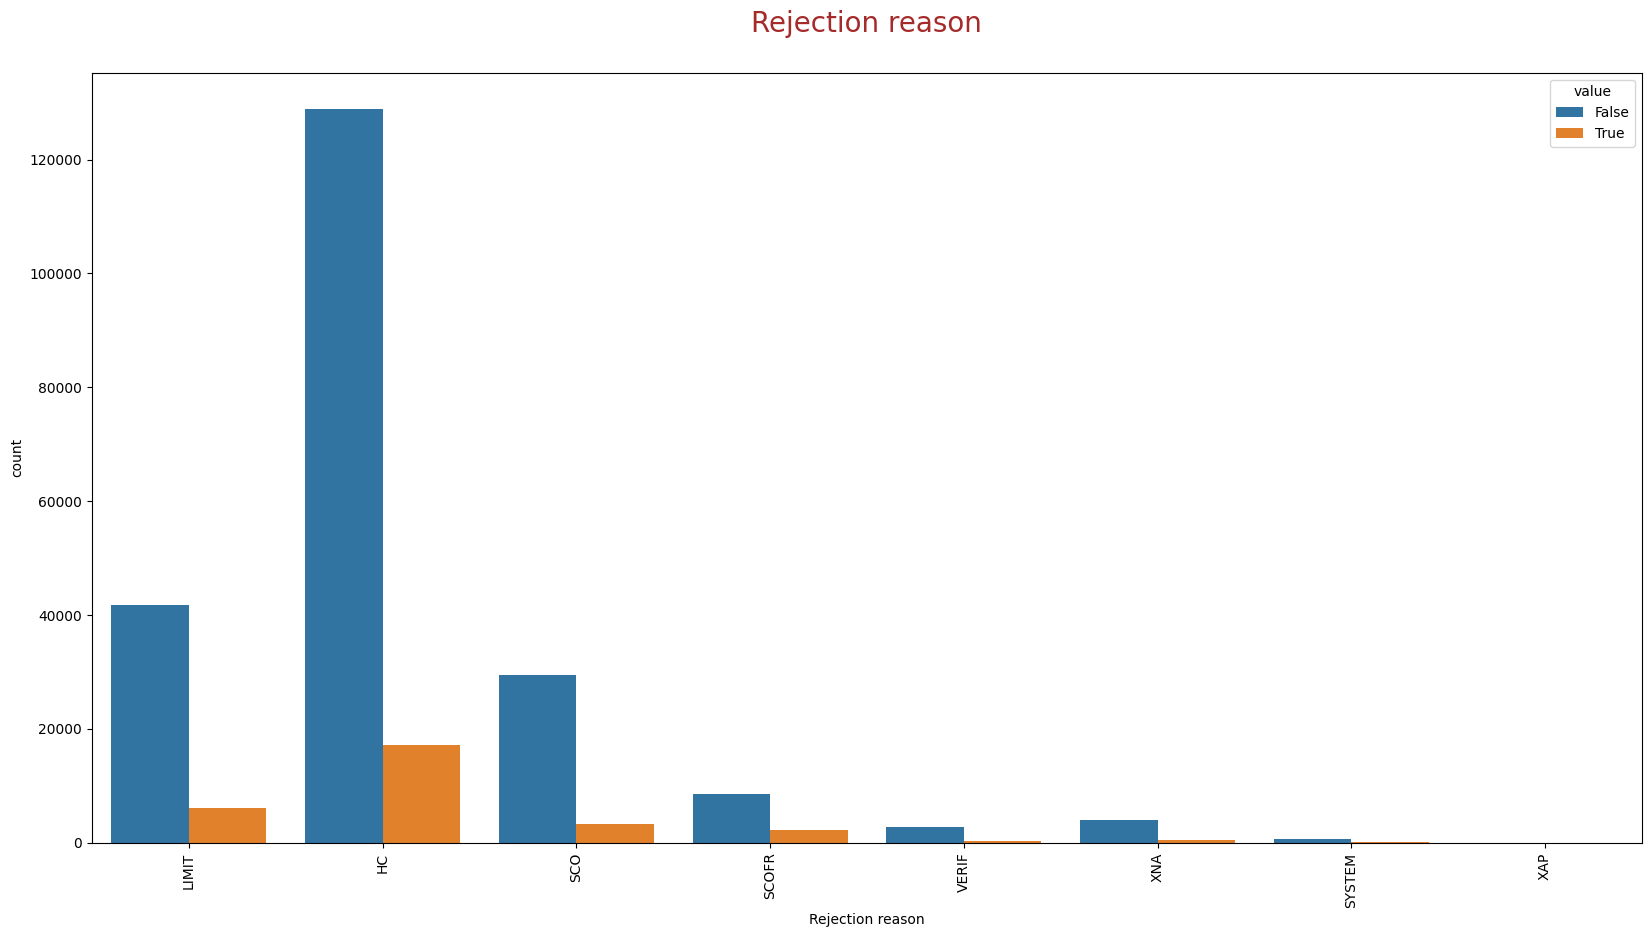

In [665]:

tempdf = finaldf[finaldf['NAME_CONTRACT_STATUS'] == 'Refused']

# Reshape data from wide-form to long-form
tempdf_melted = pd.melt(tempdf, id_vars=['CODE_REJECT_REASON'], value_vars=['TARGET'])

plt.figure(figsize=[20,10])
plt.title('Rejection reason\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})

# Use the melted DataFrame for countplot
sns.countplot(data=tempdf_melted, x='CODE_REJECT_REASON', hue='value')

plt.xlabel('Rejection reason')
plt.xticks(rotation = 90)
plt.show()


- Most of the applications were rejected for rejection code - HC. It also has the higher number of defaulters.
- Rejection by system is very less.

##### Categorical - Continuous

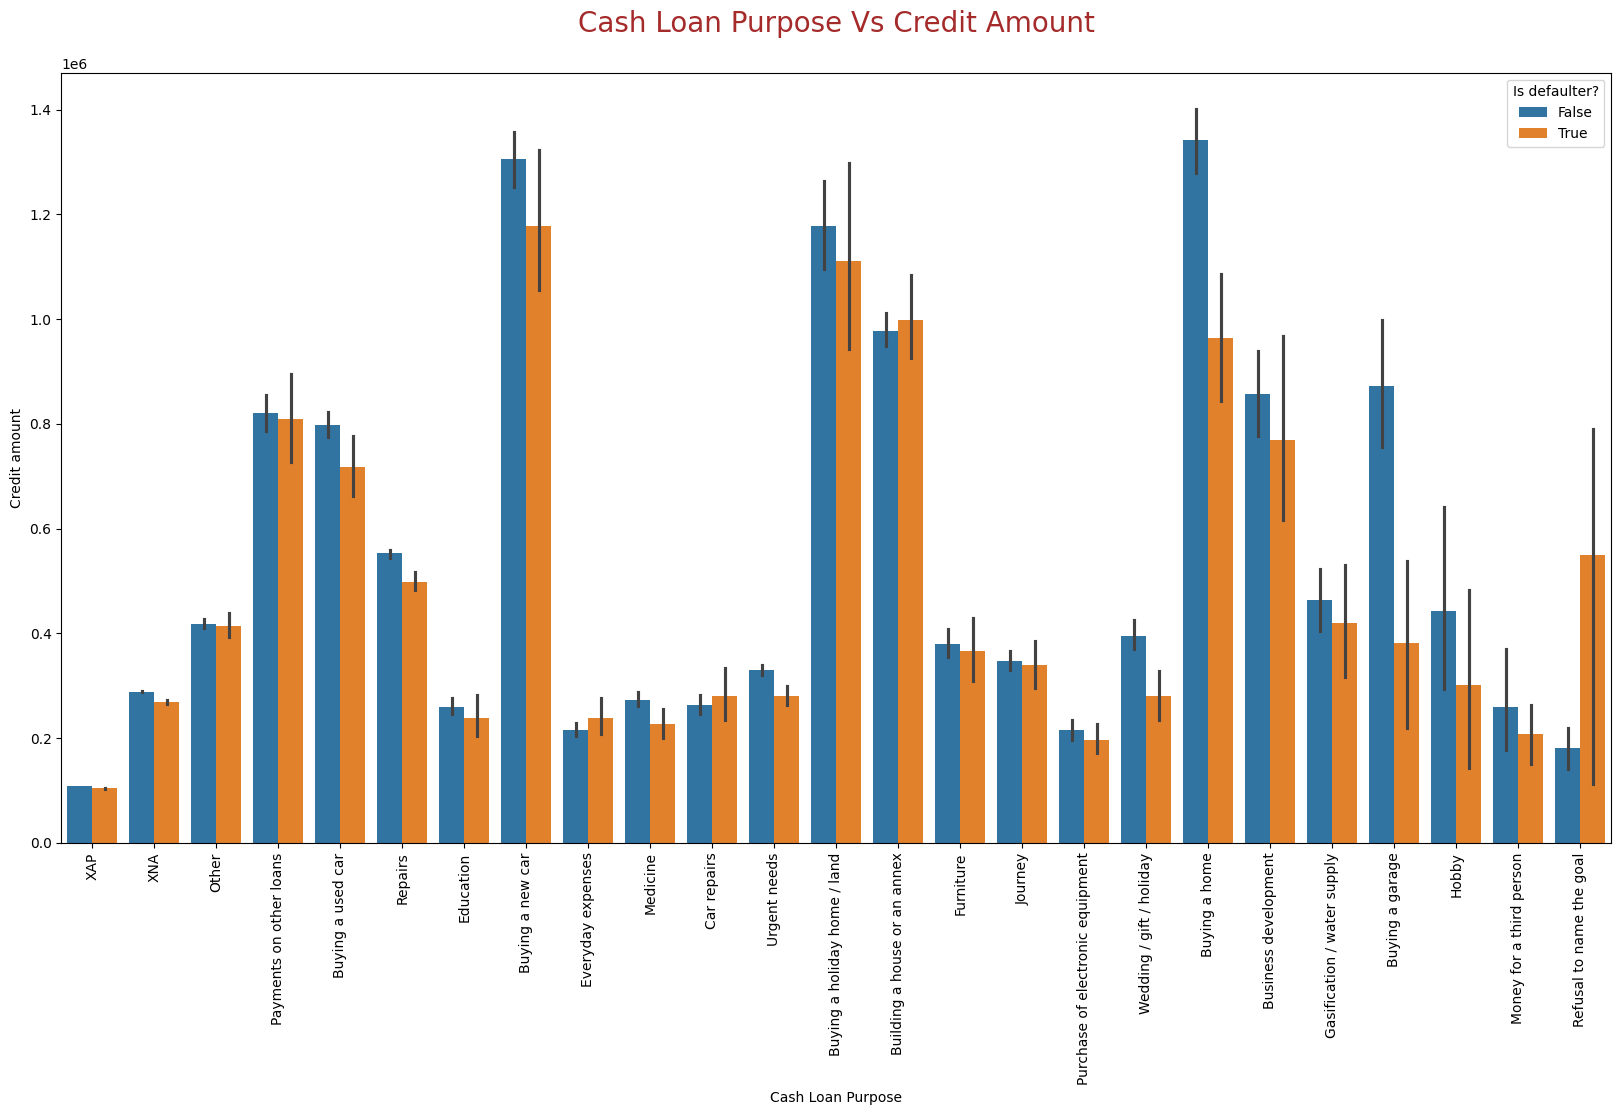

In [666]:
# NAME_CASH_LOAN_PURPOSE -  AMT_CREDIT_PREV


plt.figure(figsize=(20,10))
plt.title('Cash Loan Purpose Vs Credit Amount\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.barplot(x=finaldf['NAME_CASH_LOAN_PURPOSE'], y=finaldf['AMT_CREDIT_PREV'], hue=finaldf['TARGET'] )
plt.xlabel('Cash Loan Purpose')
plt.ylabel('Credit amount')
plt.xticks(rotation=90)
plt.legend(title='Is defaulter?', loc= 'upper right')
plt.show()

- People taking cash loans with high credit amount but have refused to name the purpose are more likely to default.
- Less chances of defaulting in case of home loans.

##### Continuous - Continuous

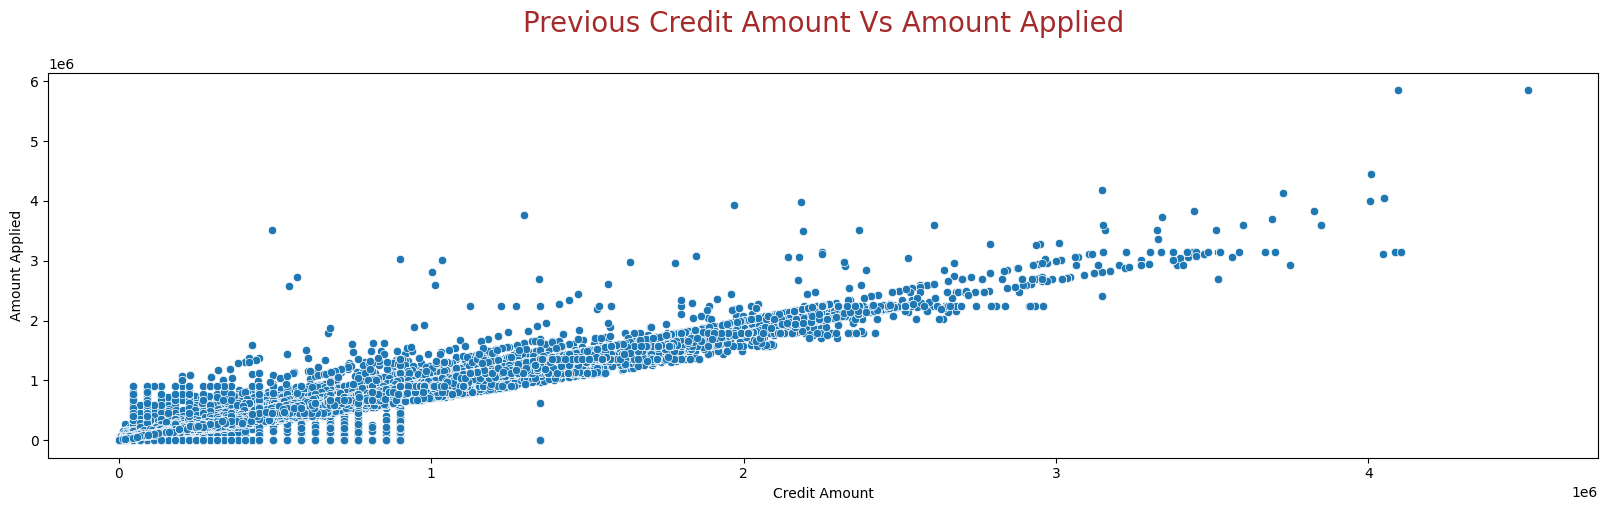

In [667]:
# AMT_CREDIT_PREV - AMT_APPLICATION

plt.figure(figsize=[20,5])
plt.title('Previous Credit Amount Vs Amount Applied\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(x = finaldf['AMT_CREDIT_PREV'], y = finaldf['AMT_APPLICATION'])
plt.xlabel('Credit Amount')
plt.ylabel('Amount Applied')
plt.show()

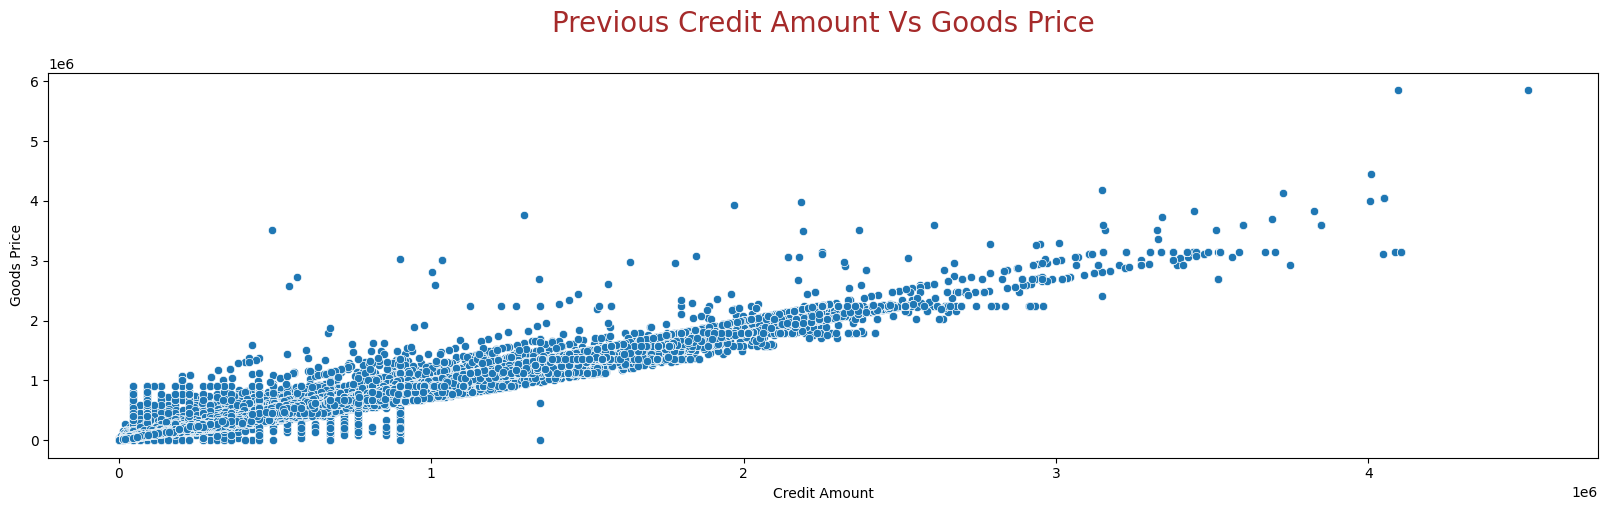

In [668]:
# AMT_CREDIT_PREV - AMT_GOODS_PRICE_PREV

plt.figure(figsize=[20,5])
plt.title('Previous Credit Amount Vs Goods Price\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Brown'})
sns.scatterplot(x = finaldf['AMT_CREDIT_PREV'], y = finaldf['AMT_GOODS_PRICE_PREV'])
plt.xlabel('Credit Amount')
plt.ylabel('Goods Price')
plt.show()

- As we can see from the above 2 plots that Credit Amount is highly correlated to Goods Price and the Amount applied by the client on previous loan applcations.
- With an increase in credit amount, applied amount and goods price, the tendency to default decreases.
- High chances of defaulting for lower credit amount, applied amount and goods price.


## 5. Conclusion

## From the above analysis, we have gathered the below insights -

This EDA provides insights into borrower characteristics associated with loan defaults. Here are the key findings:


**High-Risk Borrowers:**
*   Age: Young (25-35)
*   Income: Low (< $500k)
*   Occupation: Low-skilled labor (drivers, waiters)
*   Education: Lower/Secondary
*   Gender: Male
*   Income Type: Maternity leave, unemployed
*   Family Status: Civil marriage, single
*   Housing: Rented apartment, living with parents
*   Loan Type: Cash loan
*   Loan Purpose: Repairs, urgent needs
*   Previous Loan Status: Approved loan history

**Low-Risk Borrowers:**

*   Age: Older (above 50)
*   Income: High (>$500k)
*   Occupation: Professionals (managers, tech)
*   Education: Higher education, degree
*   Gender: Female
*   Income Type: Employed, business owner, student
*   Family Status: Married
*   Housing: Owns home/apartment
*   Loan Type: Revolving loan
*   Loan Purpose: Home improvement
*   Previous Loan Status: Unused loan offer

**Insights for Loan Approval:**

* Implement stricter criteria for young males with low education and income, especially those renting or living with parents. Prioritize loan denial for cash loans seeking funds for repairs or urgent needs.
*  Consider reduced loan amounts for females on maternity leave.
*  Exercise caution with applicants who have a history of unused loan offers despite high income. Offer loans with higher interest rates in such cases.
*  Target loan offers towards working professionals, students, and business owners with higher education.
*  Approve loans intended for home improvement purposes.

**Note:**
 This analysis provides a starting point and further investigation might be necessary before implementing credit scoring models.